# Import

In [5]:
import pandas as pd
import os.path
from core.util.math import compute_ft

import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import copy as cp
from enum import Enum
from scipy.linalg import sqrtm

from user_scripts.Timo.own.console_toolkit import Tk_file, Tk_string
from logic.pulsed.predefined_generate_methods.multi_nv_methods import DQTAltModes, TomoRotations, TomoInit

import logging
logging.basicConfig(filename='logfile.log', filemode='w', level=logging.DEBUG)
logger = logging.getLogger(__name__)

os.getcwd()


'C:\\Users\\Setup3-PC\\Desktop\\qudi'

In [35]:
from matplotlib.colors import LinearSegmentedColormap


# Paper
default_params = {'legend.fontsize': 6,
          'figure.figsize': (3.5, 3.5*2./3.),   # standard 1 colum Nature fig
         'axes.labelsize': 8,
         'axes.titlesize':'xx-large',
         'xtick.labelsize':8,
         'ytick.labelsize':8,
         'lines.markeredgewidth':0,
         #'lines.linewidth': 2,
         'errorbar.capsize': 5,
         'xtick.minor.visible': True}

# Slides
"""
default_params = {'legend.fontsize': 6,
          'figure.figsize': (4, 4*2./3.),   # standard 1 colum Nature fig
         'axes.labelsize': 10,
         'axes.titlesize':'xx-large',
         'xtick.labelsize':10,
         'ytick.labelsize':10,
         'lines.markeredgewidth':0,
         #'lines.linewidth': 2,
         'errorbar.capsize': 5}
"""
plt.rcParams.update(default_params)

class CommonPlt(object):
    def __init__(self):
        self.perform_save = True
        
        self.save_extension = 'png'
        self._savepath =  r"C:\Users\Setup3-PC\Desktop\_poster_figs\\"
        self._cmap_n_bins= [5,100]
    
    def savefig(self, name, frame_left_inch=2*0.35, frame_bottom_inch=2.5*0.22, 
                frame_top_inch=None, frame_right_inch=None):
        
        fig = plt.gcf()
        fig_size = fig.get_size_inches()
        
        # make the frame size fixed in inches
        # specify relative to figsize in function
        
        left_rel = frame_left_inch/fig_size[0]
        if frame_right_inch is None:
            right_rel = 1.2*(1 - left_rel)
        else:
            right_rel = 1 - (frame_right_inch/fig_size[0])

        bottom_rel = frame_bottom_inch/fig_size[1]
        if frame_top_inch is None:
            top_rel = 1.1*(1 - bottom_rel)
        else:
            top_rel = 1 - (frame_top_inch/fig_size[1])

        plt.subplots_adjust(left=left_rel, right=right_rel,
                            top=top_rel, bottom=bottom_rel)

        # overwrite tight_layout parameters and save with a fixed frame
        plt.savefig(plt_settings.get_savepath(name),
                    dpi=300)

    def get_markersize(self, size='medium', is_scatter=False, rel_to_fig=True):
        # https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
        size_dict = {'small':2, 'medium': 5, 'big': 7}
        
        scale_fac = 1
        if rel_to_fig:
            fig = plt.gcf()
            fig_size = fig.get_size_inches()
            fig_size_default = plt.rcParams['figure.figsize']
            
            idx = np.argmax(np.abs(fig_size/fig_size_default - 1))
            scale_fac = (fig_size/fig_size_default)[idx]
        
        if is_scatter:
            return (scale_fac*size_dict[size])**2
        
        return scale_fac*size_dict[size]
        
    def get_savepath(self, fname):
        
        fname = fname.replace(".png","").replace(".svg","svg")
        
        if not self.perform_save:
            return ""
        return self._savepath + fname + "." + self.save_extension
    
    def get_cmap(self, continuous=True):
        cmaps = self._create_cmap()
        cmap = None
        
        for key, val in cmaps.items():
            if continuous:
                if not 'cont' in key:
                    continue
            else:
                 if 'cont' in key:
                    continue
            cmap = val
        
        return cmap
    
    def color(self, colorstr=None):
        color_map = {'blue':0, 'bluelight':1, 'red':4, 'green':2, 'orange':3}
        if colorstr is not None:
            if colorstr not in color_map.keys():
                raise ValueError
            else:
                return self.get_cmap(False)(color_map[colorstr])
            
    def marker_style(self, color, is_scatter=False, is_err=False):
        marker_style = dict(marker='o',
                            color=color,
              )
        
        err_style = dict(capthick=1, elinewidth=1, capsize=1.5)
        
        
        if is_scatter:
              marker_style = {**dict(s=plt_settings.get_markersize(is_scatter=True),
                                    facecolor=color,
                                    linewidths=1,
                                    edgecolor='grey'), **marker_style}
            
        elif not is_scatter and not is_err:
             marker_style = {**dict(markersize=plt_settings.get_markersize(is_scatter=False),
                                    markerfacecolor=color,
                                    markeredgewidth=1,
                                    markeredgecolor='grey',
                                    linestyle=''), **marker_style}
        
        elif is_err:
             marker_style.update(err_style)
        else:
            raise ValueError
        
        return marker_style
    
    def _create_cmap(self):
        colors_uulm = ['#26547c', '#7d9aaa', '#56aa1c', '#df6d07', '#a32638']#, '#a9a28d'] 
        n_bins = self._cmap_n_bins  # Discretizes the interpolation into bins

        cmap_name = ['uulm_5', 'uulm_cont']
        idx = 0
        
        cmaps = {}
        for n_bin in n_bins:
            # Create the colormap
            cmap = LinearSegmentedColormap.from_list(cmap_name[idx], colors_uulm, N=n_bin)
            cmaps[cmap_name[idx]] = cmap
            idx += 1
            
        return cmaps        
    

    
plt_settings = CommonPlt()
try:
    plt_settings.get_cmap(False)
    #plt_settings.get_cmap(False)

    #plt_settings._create_cmap()['uulm_cont']
    plt_settings.color('red')


    a = plt_settings.get_markersize(size='medium', is_scatter=False)
    a = plt_settings.marker_style('blue', is_err=True)
except:
    logger.exception("")
    
plt_settings.get_cmap(False)(100)


(0.6392156862745098, 0.14901960784313725, 0.2196078431372549, 1.0)

In [11]:
plt_settings.color('red')

(0.6392156862745098, 0.14901960784313725, 0.2196078431372549, 1.0)

In [14]:
try:
    plt_settings.get_markersize(size='medium', is_scatter=False)
except:
    logger.exception("")

In [17]:
# OLD: use qudi style

"""
from cycler import cycler
mpl_qudi_style = cp.deepcopy(savelogic.mpl_qd_style)
mpl_new_style = {
    'axes.prop_cycle': cycler(
        'color',
        ['#1f17f4',
        '#ffa40e',
        '#ff3487',
        '#008b00',
        '#17becf',
        '#850085'
        ]
        ) + cycler('marker', ['o', 's', '^', 'v', 'D', 'd']),
    'axes.edgecolor': '0.3',
    'xtick.color': '0.3',
    'ytick.color': '0.3',
    'axes.labelcolor': 'black',
    'font.size': '14',
    'lines.linewidth': '2',
    'figure.figsize': '12, 6',
    'lines.markeredgewidth': '0',
    'lines.markersize': '5',
    'axes.spines.right': True,
    'axes.spines.top': True,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'savefig.dpi': '180'
    }
"""

"\nfrom cycler import cycler\nmpl_qudi_style = cp.deepcopy(savelogic.mpl_qd_style)\nmpl_new_style = {\n    'axes.prop_cycle': cycler(\n        'color',\n        ['#1f17f4',\n        '#ffa40e',\n        '#ff3487',\n        '#008b00',\n        '#17becf',\n        '#850085'\n        ]\n        ) + cycler('marker', ['o', 's', '^', 'v', 'D', 'd']),\n    'axes.edgecolor': '0.3',\n    'xtick.color': '0.3',\n    'ytick.color': '0.3',\n    'axes.labelcolor': 'black',\n    'font.size': '14',\n    'lines.linewidth': '2',\n    'figure.figsize': '12, 6',\n    'lines.markeredgewidth': '0',\n    'lines.markersize': '5',\n    'axes.spines.right': True,\n    'axes.spines.top': True,\n    'xtick.minor.visible': True,\n    'ytick.minor.visible': True,\n    'savefig.dpi': '180'\n    }\n"

In [20]:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

cmap_name = ['uulm_5', 'uulm_cont']
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)

idx = 0
for n_bin, ax in zip(n_bins, axs.flat):
    # Create the colormap
    cmap = plt_settings.get_cmap(idx%2)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, origin='lower', cmap=cmap)
    ax.set_title("N bins: %s" % plt_settings._cmap_n_bins[idx])
    fig.colorbar(im, ax=ax)
    idx += 1

plt.tight_layout()
plt.show()

# Library

In [3]:
import lmfit
from scipy.interpolate import UnivariateSpline



def plot_multiple_1d(p_raw, n_datas=1, plot_err=False, plot_mode='delta',
                     scale_fac_x=1, scale_fac_y=1, color=None):
    #"""
    plot_data = []
    #plt.figure(figsize=(6,4))
    
    offset = 0
    
    try:
        for i, mes in enumerate(p_raw):

            x_i = scale_fac_x*np.asarray(mes['data']['tau'])
            y_i = offset*i +  scale_fac_y*np.asarray(get_z(mes, mode=plot_mode)[0])
            dy_i = offset*i +  scale_fac_y*np.asarray(get_z(mes, mode=plot_mode)[1])
            
            #logger.info(f"{y_i}")
            
            poi_id = mes['file']#.split('nv_')[2].split("\\")[0]
            poi_id = int(not(i))

            # colormap
            #color=None
            #color = plt.cm.plasma(i/len(p_raw))
            if color is None:
                color_i = plt_settings.get_cmap(False)(int((i)/(len(p_raw)*n_datas)))
            else:
                color_i = color
            marker_style = plt_settings.marker_style(color_i, is_scatter=True)
            marker_err_style = plt_settings.marker_style(color_i, is_scatter=False, is_err=True)   

            label = None
            plot_options = mes.get('plot_options')
            if plot_options:
                label = plot_options.get('label')
            if label is None:
                label= f"{mes['exp_params']['savetag']}"
            #label = f"control= |{poi_id}>"
            #label = f"read_phase= {mes['exp_params']['read_phase']:.1f}"

            plt.scatter(x_i, y_i, label=label, alpha=0.8, zorder=10, **marker_style)
            if plot_err:
                plt.errorbar(x_i, y_i, yerr=dy_i, 
                          alpha=0.7, label='_no_legend', 
                          **marker_err_style,
                          markersize=0, linestyle='', zorder=1)

            """
            if dy_i is not None:
                plt.errorbar(x_i, y_i, yerr=dy_i, label='_nolegend_', color=color, marker="", alpha= 0.15)
            else:
                pass
                #plt.plot(x_i, y_i, label='_nolegend_', color=color, marker="", alpha= 0.15)
            """
            if smooth_data:
                zipped = sorted(zip(x_i, y_i), key=lambda x: x[0])  # raw data x sometimes reversed
                x_in, y_in = [s[0] for s in zipped],[s[1] for s in zipped]
                spline = UnivariateSpline(x_in, y_in)
                x_smooth_i = np.linspace(np.min(x_i), np.max(x_i), 500)
                y_smooth_i = spline(x_smooth_i)
                plt.plot(x_smooth_i, y_smooth_i, label='_nolegend_', color=color_i, marker="", alpha= 0.9)

            if 'fit_values' in mes.keys():
                x_fit = scale_fac_x*mes['fit_values']['x']
                y_fit = offset*i+ scale_fac_y*mes['fit_values']['y']
                plt.plot(x_fit, y_fit, label='_nolegend_', color=color_i, marker="",
                         alpha= 0.9, linewidth=2)

            #plt.xlim([0, 17])
            #plt.ylim([-0.2,0.1])

            plot_data.append([x_i,y_i])

        
        #plt.xlabel("clifford length ()")
        plt.xlabel(r"$t_{evol}$ " + f"({x_unit})")
        plt.ylabel(r'$\sigma_y$')
     
    except:
        logger.exception(f"In mes {p_raw[i]['file']}")
    
    return plot_data


def norm_on_delta(p_data, idx_zref=None, mask_idxs=[]):
    if idx_zref != None:

        p_data = pd.DataFrame(p_data)
        delta = p_data['z1']-p_data['z2']
        ddelta = np.sqrt(p_data['dz1']**2+p_data['dz2']**2)
        z_ref = delta.iloc[idx_zref] 

        y_scale = 1/z_ref

        if len(mask_idxs) != 0:
            mask_idxs = [i if i>=0 else len(p_data)+i for i in mask_idxs]  # handle negative idx
            try:
                p_data = p_data.drop(mask_idxs)
                delta = delta.drop(mask_idxs)
                ddelta = ddelta.drop(mask_idxs)
            except KeyError: # already dropped before, don't norm again
                p_data['delta'] = delta
                p_data['ddelta'] = ddelta
                return p_data
                
                
            
        p_data['delta'] = y_scale*delta
        p_data['ddelta'] = y_scale*ddelta
        
    return p_data

def setup_clear_plots(n_plots):
    n_cur = qdplotlogic.number_of_plots
    for i in range(n_cur):
        n_cur_i = qdplotlogic.number_of_plots
        if n_cur_i >= 1:
            # removing without arguments seems buggy
            qdplotlogic.remove_plot(n_cur_i-1)
    
    for i in range(n_plots):
        qdplotlogic.add_plot()
def extract_num_from_path(file):
    fname = os.path.basename(file)
    res = Tk_string.find_num_in_str(fname)
    
    return res

"""
# delete if Tk_file import works
def load_pulsed_result(fname):

    data = pd.read_csv(fname, sep="\t", comment='#', names=["tau", "z1", "z2", "std1", "std2"])
    if pd.isnull(data.iloc[0, -1]):
        data = pd.read_csv(fname, sep="\t", comment='#', names=["tau", "z1", "std1"])
    meta = Tk_file.load_pulsed_metadata(fname)

    mes = {'data': data,
           'file': fname}
    mes = {**mes, **meta}

    return mes
"""
def do_fit(p_mes, fit_y='delta', fit_method='sine', edit_params=None, settings=None):
    fitter = pulsedmeasurementlogic.fc   
    
    if edit_params:
        for ov_param in edit_params:
            
            if ov_param.name in fitter.fit_list[fit_method]['parameters'].keys():
                fitter.fit_list[fit_method]['use_settings'][ov_param.name] = True
                fitter.fit_list[fit_method]['parameters'][ov_param.name] = ov_param
                
                #logger.debug(f"Overwriting fit param {ov_param.name}: {ov_param}")

    fitter.clear_result()
    fitter.set_current_fit(fit_method)
    """
    x_fit, y_fit, result = fitter.do_fit(data[0], data[1])
    result = result.result_str_dict

    result['Position']['value']
    result['FWHM']['value']
    result['Contrast']['value']
    """

    if fit_y == 'delta':
        data = np.asarray(p_mes['data']['tau']), np.asarray(delta_or_z1(p_mes))
    elif fit_y == 'z1':
        data = np.asarray(p_mes['data']['tau']), np.asarray(p_mes['data']['z1'])
    elif fit_y == 'z2':
        data = np.asarray(p_mes['data']['tau']), np.asarray(p_mes['data']['z2'])
    else:
        raise ValueError
    
    #logger.info(f"data({fit_y})= {data}")
    
    x_fit, y_fit, result = fitter.do_fit(data[0], data[1])
    # params [lmfit::Parameters] and derived params [dict]
    # considered in _get_fit()
    
    # get values of fitted model
    model = fitter.fit_list[fit_method]['make_model']()[0]
    
    x_domain = np.asarray(p_mes['data']['tau'])
    x_domain = np.linspace(np.min(x_domain), np.max(x_domain), 1000)
    if settings:
        if 'fit_range' in settings.keys():
            x_domain = settings['fit_range']

    y = model.eval(x=x_domain, params=result.params)
    fit_vals = {'x': x_domain, 
                'y': y}
    
    full_result = {**result.params, **result.result_str_dict}
    p_mes['fit_res'] = full_result
    p_mes['fit_values'] = fit_vals
    
    reset_fitter(fit_method, edit_params)

def reset_fitter(fit_method=None, edit_params=None):
    fitter = pulsedmeasurementlogic.fc   
    
    if edit_params:
        for ov_param in edit_params: 
            if ov_param.name in fitter.fit_list[fit_method]['parameters'].keys():
                fitter.fit_list[fit_method]['use_settings'][ov_param.name] = False   
    
    
def get_z(p_mes, mode='z1'):
    # mode: z1, z2, delta, (+_norm)
    try:
        has_z2 = True
        has_delta = True
        try:
            p_mes['data']['z2']
        except KeyError:
            has_z2 = False
        try:
            delta = p_mes['data']['delta']
            ddelta = p_mes['data']['ddelta']
        except KeyError:
            has_delta = False
            
        tau = p_mes['data']['tau']
        z1 = p_mes['data']['z1']
        z1_norm = z1/np.average(z1)
        dz1 = p_mes['data'].get('std1')
        dz2 = p_mes['data'].get('std2')
        
        if mode == 'z1':
            return z1, dz1
        elif mode == 'z1_norm':
            return z1_norm, dz1/z1*z1_norm
        elif mode == 'z2' or mode == 'z2_norm' or mode=='delta' or mode=='delta_norm':
            if has_z2:
                z2 = p_mes['data']['z2']
                delta = (z1-z2) if not has_delta else delta
                ddelta = np.sqrt(dz1**2+dz2**2) if not has_delta else ddelta
                delta_norm = delta/np.average(z1)
            else:
                raise KeyError
                
            if mode == 'z2':
                return z2, dz2
            if mode == 'z2_norm':
                return z2/np.average(z2), dz2/z2*z2_norm
            if mode == 'delta':
                return delta, ddelta
            if mode == 'delta_norm':
                return delta_norm, np.sqrt(dz1**2+dz2**2)/delta * delta_norm
        else:
            raise ValueError(f"Unknown mode: {mode}")  

    except:
        logger.exception(f"Loading of {mode} from file {p_mes['file']} failed")
        raise  

def delta_or_z1(p_mes, norm=False):
    try:
        
        ret = None
        
        has_delta = True
        try:
            delta = p_mes['data']['delta']
            ret = delta
        except KeyError:
            has_delta = False
        
        has_z2 = True
        try:
            z2 = p_mes['data']['z2']
        except KeyError:
            has_z2 = False
        
        try:
            z1 = p_mes['data']['z1']
        except KeyError:
            pass

        if has_z2 and not has_delta:
            delta = (z1-z2)
            ret = delta

        if norm:
            return ret/np.average(ret)
        return ret
    except:
        logger.exception(f"Loading of file {p_mes['file']} failed: {p_mes['data']}")
        raise
        


def pulsed_series_2_array(p_raw, idx_var_y=None, ordered_y=True):
    y2d = []
    z1s, z2s = [], []
    x2d = []

    for p in p_raw:
        try:
            z1 = p['data']['z1']
            try:
                z2 = p['data']['z2']
            except:
                z2 = np.nan
            # set x axis of 2d plot
            tau = p['data']['tau']
            # set y axis of 2d plot
            idx_file = extract_num_from_path(p['file'])[-2]
            if idx_var_y != None:
                var_file = float(extract_num_from_path(p['file'])[idx_var_y])
            # set y axis as time of mes
            if idx_var_y == None:
                var_file = p['date'].timestamp() - p_raw[0]['date'].timestamp()
            #logger.info(f"1st: tau {tau}, x2d {x2d}")
            if len(x2d) > 0:
                err = f"Data in file {p['file']} doesn't share tau axis"
                try:
                    if not np.all(x2d == tau):
                        raise ValueError(err)
                except:
                    logger.exception(err)
                    raise


            x2d = tau
            #logger.info(f"tau {tau}, x2d {x2d}")
            y2d.append(var_file)
            z1s.append(z1)
            z2s.append(z2)

        except:
            logger.exception(f"Loading of file {p['file']} failed")
            raise



    z1s = np.asarray(z1s)
    z2s = np.asarray(z2s)

    x2d = np.asarray(x2d)
    y2d = np.asarray(y2d)
    
    if ordered_y:
        y2d,  z1s, z2s = np.sort(y2d), z1s[y2d.argsort()], z2s[y2d.argsort()]
    
    return x2d, y2d, z1s, z2s


def pulsed_series_2_1d_fit_array(pulsed_series, fit_meth, fit_on, fit_vals,
                                 idx_var_x=None, ordered_x=True):
    
    x,y, y2, y3 = [], [], [], []
    dy = []
    
    for p in pulsed_series:
        try:
            # set x axis of 1d plot
            # idx_file = extract_num_from_path(p['file'])[-2]
            if idx_var_x:
                var_file = float(extract_num_from_path(p['file'])[idx_var_x])
            # set y axis as time of mes
            else:
                var_file = p['date'].timestamp() - pulsed_series[0]['date'].timestamp()
            x.append(var_file)
            
            # looks for fit params to overwirte
            edit_params, settings = None, None
            if 'fit_edit_params' in p.keys():
                edit_params = p['fit_edit_params']
            if 'fit_settings' in p.keys():
                settings = p['fit_settings']
            
            # fit result on y axis
            do_fit(p, fit_y=fit_on, fit_method=fit_meth,
                   edit_params=edit_params, settings=settings)

            y.append(_get_fit(p, 0, error=False, cust_vals=fit_vals))
            dy.append(_get_fit(p, 0, error=True, cust_vals=fit_vals))
            y2.append(_get_fit(p, 1, error=False, cust_vals=fit_vals))
            y3.append(_get_fit(p, 2, error=False, cust_vals=fit_vals))


        except:
            logger.exception(f"Loading of file {p['file']} failed")
            raise

    x, y, y2, y3, dy = np.asarray(x), np.asarray(y), np.asarray(y2),  np.asarray(y3), np.asarray(dy)
    if ordered_x:
        x, y, y2, y3, dy = np.sort(x), y[x.argsort()], y2[x.argsort()], y3[x.argsort()], dy[x.argsort()]
    
    return x, y, y2, y3, dy

def _get_fit(p, y_idx=0, error=False, cust_vals=None):
    import lmfit
    fit_vals = ['Lifetime', 'Contrast', 'Frequency']
    if cust_vals:
        fit_vals = cust_vals
    try:
        param = p['fit_res'][fit_vals[y_idx]]
        if isinstance(param, lmfit.parameter.Parameter):
            fit_quant = 'stderr' if error else 'value'
            return getattr(param, fit_quant)
        elif isinstance(param, dict):
            fit_quant = 'error' if error else 'value'
            return param[fit_quant]
        else:
            raise ValueError(f"Didn't understand fit param type: {type(params)}")
    except:
        return -1

    
import pandas as pd
import difflib


def overwrite_poi_from_foldername(p_mes):
    # needed, if "Active POI:" property in .dat file is buggy
    path = os.path.normpath(p_mes['file'])
    poi = path.split(os.sep)[-2][:]
    try:
        poi = 'nv_' + poi.rsplit('nv_',1)[1]
    except IndexError:
        return
    #return poi
    #poi.rsplit(poi, '')
    
    if 'Pulsed' in poi:
        return
    else:
        p_mes['poi'] = poi
        return poi

def find_param_file(p_mes):
    return Tk_file.find_param_file(p_mes)

def extract_params_from_file(header_lines):

    header_flat = ' '.join([line for line in header_lines])
    text = header_flat

    # time of experiment
    m = re.search('on(.+?)\n', text)
    if m:
        found = m.group(1)
    date = pd.to_datetime(found, dayfirst=True)

    # poi
    m = re.search('POI:(.+?)\n', text)
    if m:
        found = m.group(1)
    poi = found.lstrip()

    meta = {'date': date,
            'poi': poi}
    return meta

    
def load_param_file(fname):
        
    return Tk_file.load_param_file(fname)

def load_pulsed_params(p_mes):
    fname = find_param_file(p_mes)
    return load_param_file(fname)
    
def decay_fit(p_in, name_timeconst='T2_he', fit_meth='exp_decay'):
    y_val_idx = None
    fit_on = 'delta'
    fit_vals = ['Lifetime', 'None', 'None']
    
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_in, 
                                                fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                                idx_var_x=y_val_idx, ordered_x=True)
    for p in p_in:
        p[f"fit_res_{name_timeconst}"] = p['fit_res']

def nv_class_for_exp(p_in, f_res_classes=[2.907e9, 2.963e9, 3.029e9, 3.087e9]):
    for p in p_in:
        try:
            f_mw = load_pulsed_params(p)['microwave_frequency']
            p['exp_on_fres'] = NVClass(find_closest(f_mw, f_res_classes=f_res_classes))
        except KeyError:
            pass
            

def find_best_lor_fit(p_in, fit_meths=['lor_dip', 'lor_dip_2x']):
    
    for i, fmeth in enumerate(fit_meths):
        y_val_idx = None
        fit_on = 'z1'
        fit_meth = fmeth
        fit_vals = ['Position 0', 'Position 1', 'Position 2']    
        if i == 0:
            fit_vals[0] = 'Position'
        
        x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_in, 
                                                        fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                                        idx_var_x=y_val_idx, ordered_x=True)
        for p in p_in:
            p[f"fit_res_{fmeth}"] = p['fit_res']

        """
        # fit_res is updated after

        y_val_idx = None
        fit_on = 'z1'
        fit_meth = fit_meths[1]
        fit_vals = ['Position 0', 'Position 1', 'None']    

        x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_in, 
                                                    fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                                    idx_var_x=y_val_idx, ordered_x=True)
        for p in p_in:
            p[f"fit_res_{fit_meths[1]}"] = p['fit_res']
        """

from enum import IntEnum        
class NVClass(IntEnum):
    NOT_CLASSIFIED = -1
    NO_ODMR = -2
    A = 0
    B = 1
    C = 2
    D = 3

    
def classify_nv_orientation(p_mes, fit_meths=['lor_dip', 'lor_dip_2x'],
                            f_res_classes=[2.907e9, 2.963e9, 3.029e9, 3.087e9], snr_thresh=10):
    """
    fit meths should be ordered in the number of nvs they correscpond.
    -> lor_dip, lor_dip_2x => n=[1,2]
    """
    p = p_mes
    nv_class = None
    
    chis = []
    for fit in fit_meths:
        if f"fit_res_{fit}" in p.keys():
            chis.append(p[f"fit_res_{fit}"]['chi_sqr']['value'])
    
    i_chi = np.argmin(np.asarray(chis)) 
    n_nv = i_chi + 1
    nv_classes = []
    
    for i_line in range(0, n_nv):
        if n_nv <= 1:
            f_res_i = p[f"fit_res_{fit_meths[0]}"]['Position']['value']
        else:    
            f_res_i = p[f"fit_res_{fit_meths[i_chi]}"][f'Position {i_line}']['value']

        nv_class_i = find_closest(f_res_i, f_res_classes=f_res_classes)
        nv_classes.append(NVClass(nv_class_i))
    
    for i_line in range(0, n_nv):
        if not classify_has_odmr(p, nv_classes, fit_meths=fit_meths, snr_thresh=snr_thresh)[i_line]:
            nv_classes[i_line] = NVClass.NO_ODMR

    """
    # smaller chisqr: better fit
    if chisqr_0 < chisqr_1:
        f_res = p[f"fit_res_{fit_meths[0]}"]['Position']['value']
        nv_class = [NVClass(find_closest(f_res, f_res_classes=f_res_classes))]
        if not classify_has_odmr(p, nv_class, fit_meths=fit_meths, snr_thresh=snr_thresh)[0]:
            nv_class = [NVClass.NO_ODMR]

    else:
        f_res_0 = p[f"fit_res_{fit_meths[1]}"]['Position 0']['value']
        f_res_1 = p[f"fit_res_{fit_meths[1]}"]['Position 1']['value']
        nv_class_0 = find_closest(f_res_0, f_res_classes=f_res_classes)
        nv_class_1 = find_closest(f_res_1, f_res_classes=f_res_classes)

        nv_class = [NVClass(nv_class_0), NVClass(nv_class_1)]

        if not classify_has_odmr(p, nv_class, fit_meths=fit_meths, snr_thresh=snr_thresh)[0]:
            nv_class[0] = NVClass.NO_ODMR
        if not classify_has_odmr(p, nv_class, fit_meths=fit_meths, snr_thresh=snr_thresh)[1]:
            nv_class[1] = NVClass.NO_ODMR
    """
    return nv_classes
        
def classify_nv_orientation_all(p_in, fit_meths=['lor_dip', 'lor_dip_2x'],
                            f_res_classes=[2.907e9, 2.963e9, 3.029e9, 3.087e9], snr_thresh=10):  
    for p in p_in:
        try:
            nv_class = classify_nv_orientation(p, fit_meths=fit_meths, f_res_classes=f_res_classes, snr_thresh=snr_thresh)
            p['nv_class'] = nv_class
        except:
            raise ValueError(f"Failed classifiying file: {p_in['fname']}")

def calc_odmr_snr_areal(p_mes, nv_class, fit_meths=['lor_dip', 'lor_dip_2x'], linewidth_expect=[3e6, 50e6]):
    
    def punish_wrong_linewidth(fwhm, linewidth_limit=[0,np.inf]):
        if fwhm < linewidth_limit[0] or fwhm > linewidth_limit[1]:
            return fwhm * 0.05
        
        return fwhm
        
    p = p_mes
    n_fres = len(([int(c) for c in nv_class]))
  
    if f"fit_res_{fit_meths[0]}" in p.keys() and f"fit_res_{fit_meths[1]}" in p.keys():
        contr_single = p[f"fit_res_{fit_meths[0]}"]['Contrast']['value']
        contr0 = p[f"fit_res_{fit_meths[1]}"]['Contrast 0']['value']
        contr1 = p[f"fit_res_{fit_meths[1]}"]['Contrast 1']['value']
        fwhm_single = p[f"fit_res_{fit_meths[0]}"]['FWHM']['value']
        fwhm_0 = p[f"fit_res_{fit_meths[1]}"]['FWHM 0']['value']
        fwhm_1 = p[f"fit_res_{fit_meths[1]}"]['FWHM 1']['value']
        y = p['data']['z1']
        
        # todo: ugly hard coded punishment
        fwhm_single = punish_wrong_linewidth(fwhm_single, linewidth_limit=linewidth_expect)
        fwhm_0 = punish_wrong_linewidth(fwhm_0, linewidth_limit=linewidth_expect)
        fwhm_1 = punish_wrong_linewidth(fwhm_1, linewidth_limit=linewidth_expect)
        
        
        signal_single = contr_single * fwhm_single
        signal0 = contr0 * fwhm_0
        signal1 = contr1 * fwhm_1
        
        f_sampling = p['data']['tau'][1] - p['data']['tau'][0]
        # noise in units of contrast
        
        noise_c = 1*np.std(y)/np.mean(y)*100
        noise_area = noise_c * f_sampling
        
        #logger.debug(f"noise: {noise_c}/{noise_area}, signal area: {signal_single}/ {signal0} / {signal1}")
        #logger.debug(f"noise: {noise_c}/{noise_area/1e6}, fwhm: {fwhm_single/1e6}/ {fwhm_0/1e6} / {fwhm_1/1e6}, \
        #             contr {contr_single}, {contr0}, {contr1}")
        
        
        if n_fres <= 1:
            return [signal_single/noise_area] 
        elif n_fres == 2:
            signal = [None, None]
            signal[0] = signal0/noise_area
            signal[1] = signal1/noise_area
            
            return signal
        else:
            raise NotImplemented("Only can handle up to two resonance lines right now")
        
        
def classify_has_odmr(p_mes, nv_class, fit_meths=['lor_dip', 'lor_dip_2x'], snr_thresh=10):
    """
    Compares the fit area against the one from the noise signal
    """
    p = p_mes
    found_odmr = None
 
    n_fres = len(([int(c) for c in nv_class]))
    #logger.debug(f"Got nv class {nv_class} of len {n_fres}")
    
    
    if f"fit_res_{fit_meths[0]}" in p.keys() and f"fit_res_{fit_meths[1]}" in p.keys():

        
        if n_fres <= 1:
            signal_single = calc_odmr_snr_areal(p, nv_class, fit_meths)[0]
            found_odmr = [True] if signal_single > snr_thresh else [False]
        elif n_fres == 2:
            signal0, signal1 = calc_odmr_snr_areal(p, nv_class, fit_meths)
            
            found_odmr = [False, False]
            if signal0 > snr_thresh:
                found_odmr[0] = True
            if signal1 > snr_thresh:
                found_odmr[1] = True
        else:
            raise NotImplemented("Only can handle up to two resonance lines right now")
        
        
    return found_odmr  
        

def get_chisqr(p_mes, fit_meths=['lor_dip', 'lor_dip_2x']):
    p = p_mes
    if f"fit_res_{fit_meths[0]}" in p.keys() and f"fit_res_{fit_meths[1]}" in p.keys():
        chisqr_0 = p[f"fit_res_{fit_meths[0]}"]['chi_sqr']['value']
        chisqr_1 = p[f"fit_res_{fit_meths[1]}"]['chi_sqr']['value']
            
        idx_best_fit = np.argmin([chisqr_0, chisqr_1])
        return np.min([chisqr_0, chisqr_1]), idx_best_fit
    
def find_closest(f_res, f_res_classes=[2.907e9, 2.963e9, 3.029e9, 3.087e9]):
    return np.argmin(np.abs(f_res - np.asarray(f_res_classes)))
        
def get_n_odmr_lines(p_mes):   
    
    p = p_mes
    nv_class = p['nv_class']
    nv_class_unique = set(nv_class)
    n_odmr_lines = len([c for c in nv_class_unique if int(c) >= 0])
    
    return n_odmr_lines

def get_mes_for_nv(poi, all_mes, exp_name=None, nv_class=None):
    
    def by_name(p_mes):
        found = False
        
        if exp_name == None and nv_class == None:
            if p_mes['poi'] == poi:
                found = True
        elif exp_name == None and nv_class != None:
            try:
                if p_mes['poi'] == poi and p_mes['exp_on_fres'] == nv_class:
                    found = True
            except KeyError:
                if nv_class == NVClass.NOT_CLASSIFIED:
                    found = True
        elif exp_name != None and nv_class != None:
            try:
                if p_mes['poi'] == poi and p_mes['exp_on_fres'] == nv_class and p_mes['experiment_name'] == exp_name:
                    found = True
            except KeyError:
                if nv_class == NVClass.NOT_CLASSIFIED:
                    found = True
        else:
            found = True if p_mes['poi'] == poi and p_mes['experiment_name'] == exp_name else False
        
        return found
    
    #if nv_class != None:
    #    logger.debug(f"Called exp_name: {exp_name} nv_class {nv_class}")
            
    return list(filter(by_name, all_mes))

def create_table(p_in_odmr, p_in_dd=[], name_tc_dd=['T2_he', 'T2_xy8'], name_exp_dd=['hahn_echo', 'xy8_n']):
    """
    From lists of basis 'measurement per row' compile an output table with 'nv characteristics' per row
    """
    table = []
    
    p_in_dd_flat = []
    [p_in_dd_flat.extend(p_list) for p_list in p_in_dd] 
    p_in_dd = p_in_dd_flat
        
    for i, p in enumerate(p_in_odmr):
        
        # ODMR
        nv_class = p['nv_class']
        nv_class_unique = set(nv_class) 
        
        # for pretty print, don't repeat non-classified results in output string
        nv_class_str = [c.name for c in nv_class_unique]
        if len(nv_class_str) > 1:
            nv_class_str = [c.name for c in nv_class_unique if int(c) >= 0]
        nv_class_str = str(nv_class_str)
        
        n_odmr_lines = get_n_odmr_lines(p)
        
        fit_chisqr, _ = get_chisqr(p)
        fit_snr_list = calc_odmr_snr_areal(p, nv_class)
        fit_snr_0 = None
        fit_snr_1 = None
        if len(fit_snr_list) == 1:
            fit_snr_0 = fit_snr_list[0]
        elif len(fit_snr_list) == 2:
            fit_snr_0 = fit_snr_list[0]
            fit_snr_1 = fit_snr_list[1]
            
        
        row = {'idx': i,
               'poi': p['poi'], 
               'nv_class': nv_class_str, 
               'nv_class_raw': nv_class, 
               'n_odmr': n_odmr_lines,
               'odmr_chi_sqr': fit_chisqr,
               'date_odmr': p['date']}
        #"""
        if fit_snr_0:
            row['snr_0'] = fit_snr_0
        if fit_snr_1:
            row['snr_1'] = fit_snr_1
        #""" 
        
        # HAHN ECHO
        #for i, exp_list in enumerate(p_in_dd):
        for i, exp_name in enumerate(name_exp_dd):
            try:
                classes = [val for val in NVClass]
                for nv_c in classes:
                    p_dd = get_mes_for_nv(p['poi'], p_in_dd, exp_name, nv_c)
                    val_class = nv_c #if (nv_c != NVClass.) else None 
                    if len(p_dd) == 1:
                        nv_class = p_dd[0]['exp_on_fres'].name
                        label = f'{name_tc_dd[i]} (us)'
                        val = [(1e6*p_dd[0][f"fit_res_{name_tc_dd[i]}"]['Lifetime']['value'], val_class)]
                        if label not in row.keys():
                            row[label] = val                                
                        else:
                            row[label] = row[label] + val
                        #row[f'{name_tc_dd[i]}_nv_class'] = nv_class
                    elif len(p_dd) == 0:
                        pass
                    else:
                        logger.warning(f"Found and ignored > 1 he files for poi {p['poi']}. Filter while loading data!")
            except:
                logger.exception(f"Error on poi {p['poi']}, exp: {exp_name}: ")
                
        table.append(row)
    
    df = pd.DataFrame(table)
      
    return df

def handle_duplicate_all_mes(all_p_mes, mode='newer'):
    new_all = cp.deepcopy(all_p_mes)
    for p in all_p_mes:
        len_old = len(new_all)
        new_all = handle_duplicate_mes(p, new_all, mode=mode)
        #logger.debug(f"for {p['poi']}, {p['date']}, {p['experiment_name']}. len: {len_old} => {len(new_all)}")
    return new_all


def handle_duplicate_mes(p_mes, all_p_mes, mode='newer'):
    # delte duplicates and add to 'all mes' list 
    
    pois = [p['poi'] for p in all_p_mes]
    # for performance, skip if no decision can be made
    if p_mes['poi'] not in pois:
        return all_p_mes
    if p_mes['experiment_name'] == None:
        return all_p_mes
    
    def newer(ex_mes):
        """
        Sort out (return False) elements with same poi && experiment name, but older date
        """
        if ex_mes['poi'] == p_mes['poi'] and ex_mes['experiment_name'] == p_mes['experiment_name']:
            # break if on different nv class
            #"""
            if 'exp_on_fres' in ex_mes.keys() and 'exp_on_fres' in p_mes.keys():
                if ex_mes['exp_on_fres'] != p_mes['exp_on_fres']:
                    return True
            #""" 
            if ex_mes['date'] > p_mes['date']:
                return True
            return False
        else:
            return True
    
    def is_dupl(ex_mes):
        if ex_mes['poi'] == p_mes['poi'] and ex_mes['experiment_name'] == p_mes['experiment_name']:
            if 'exp_on_fres' in ex_mes.keys() and 'exp_on_fres' in p_mes.keys():
                if ex_mes['exp_on_fres'] != p_mes['exp_on_fres']:
                    return False
            if ex_mes['date'] > p_mes['date']:
                return False
            return True
            
        return False
        
    
    if mode == 'newer':
        # delete older mes with same poi && name && orientation (if available)
        all_p_mes = list(filter(newer, all_p_mes))
    elif mode == 'all':
        pass
    else:
        raise ValueError(f"Unknown mode: {mode}")
    
    if mode == 'newer' or mode == 'all':
        if not any(map(is_dupl, all_p_mes)):
            all_p_mes.append(p_mes)    
    
    return all_p_mes

def create_header_comment(settings_dict):
    out_str = f""
    date = datetime.datetime.now().strftime("%Y/%m/%d, %H:%M:%S \n")
    out_str = f"# analysis on: {date}"
    for key, val in settings_dict.items():
        out_str += f"# {key}: {val}"
        out_str += "\n"
    
    return out_str

from collections import Iterable
def float2string(input):
    """convert float to string for printing
    """
    if isinstance(input, Iterable):
        return list(map(float2string, input))
    else:
        if input is None:
            return None
        else:
            if isinstance(input, NVClass):
                return f"{input.name}"
            elif float(input).is_integer():
                return "{}".format(input)
            else:
                return "{:.2f}".format(input)

def mean_of_list(cell):
    if isinstance(cell, Iterable):
        #logger.debug(f"Iterable: {cell}")
        return np.nanmean(list(map(mean_of_list, cell)))
    else:
        if cell is None:
            return 0
        else:
            if isinstance(cell, NVClass):
                return np.nan
            else:
                return float(cell)

def flatten_floats_only(cell):
    def _flatten(cell):
        if isinstance(cell, Iterable):
            #logger.debug(f"Iterable: {cell}")
            a = list(map(_flatten, cell))

            #a = [item for sublist in a for item in sublist]
            return a
        else:
            if cell is None:
                return None
            else:
                if isinstance(cell, NVClass):
                    return None
                else:
                    return float(cell)
    
    a = _flatten(cell)
    a = [item for sublist in a for item in sublist]
    a = [item for sublist in a for item in sublist]
    a = [item for item in a if item != None]
    return a
            
def mean_of_list_2(cell):
    # non recursive, slightly less powerfull
    if isinstance(cell, Iterable):
        #logger.debug(f"Iterable: {cell}")
        new_cell = []
        for el in cell:
            if isinstance(el, NVClass):
                el = np.nan
            else:
                el = el
            new_cell.append(el)
                    
        return np.average(np.nanmean(new_cell).flatten())
    else:
        return float(cell)
    
def sort_by_key(df, column, key, ascending=False, drop_nan=False):
    # no idea why not working
    #return df.loc[(df[column].map(key)).argsort()]
    
    df[f'{str(column)}_temp'] = df[column].map(key)
    df = df.sort_values(by=f"{str(column)}_temp")
    if drop_nan:
        df = df.dropna(subset=[column])
    df.drop(f"{str(column)}_temp", axis=1)
    
    if ascending:
        return df[::-1]
    return df


def plot_odmr(p_mes, f_res_classes=[2.907e9, 2.963e9, 3.029e9, 3.087e9],
              fit_meths=['lor_dip', 'lor_dip_2x'], y_offset=0,
              fig=None, no_nvclass_legend=False, no_poi_legend=False):
    
    if fig == None:
        plt.figure()
    
    poi = p_mes['poi']
    fit_chisqr = p_mes[f"fit_res_{fit_meths[0]}"]['chi_sqr']['value']
    nv_class = p_mes['nv_class']
    odmr_snr = calc_odmr_snr_areal(p_mes, nv_class)

    x = np.asarray(p_mes['data']['tau'])
    y = p_mes['data']['z1'] + y_offset
    #poi_id = mes['file'].split('nv_')[2].split("\\")[0]
        
    label = f"{poi}" if not no_poi_legend else None
    snr_str = f"{odmr_snr[0]:.1f}/ {odmr_snr[1]:.1f}" if len(odmr_snr) == 2 else f"{odmr_snr}"
    title = fr"class= {[c.name for c in nv_class]}, snr= {snr_str}, $\chi^2$= {fit_chisqr:.3f}"
    
    plt.autoscale(True)
    plt.plot(x/1e6,y, label=label, marker="")
    plt.title(title)
    
    # lines for NV orientation classes
    for i, f in enumerate(f_res_classes):
        if not no_nvclass_legend:
            plt.axvline(f/1e6, label=f"{NVClass(i).name}", alpha=0.4+i*0.1, color='grey')
        else:
            plt.axvline(f/1e6, alpha=0.5, color='grey')
    # plot estimated noise level used for "no odmr" classification
    noise = 1*np.std(y)
    mean = np.median(y)
    y0,y1 = mean - noise/2, mean + noise/2
    plt.fill_between(x/1e6, y0, y1, alpha=0.2, color='orange')

    # plot fit
    x = p_mes['fit_values']['x']
    y = p_mes['fit_values']['y']
    plt.autoscale(False)
    plt.plot(x/1e6, y + y_offset, marker="", color='orange', alpha=0.8)    #plt.autoscale(True)
    plt.xlabel(r"f (MHz)")
    
def plot_decay(p_mes, exp_name="T2_he",
              fit_meth='decay_exp', y_offset=0,
              fig=None):
    
    if fig == None:
        plt.figure()
    
    poi = p_mes['poi']

    x = p_mes['data']['tau']
    delta = p_mes['data']['z1'] - p_mes['data']['z2']
    y = delta + y_offset
    #poi_id = mes['file'].split('nv_')[2].split("\\")[0]
    
    t2 = p_mes[f'fit_res_{exp_name}']['Lifetime']['value']
    fit_offset = p_mes[f'fit_res_{exp_name}']['offset'].value
    fit_ampl =  p_mes[f'fit_res_{exp_name}']['amplitude'].value
    label = f"{p_mes['exp_on_fres'].name}: {exp_name}= {1e6*t2:.2f} us, ampl= {fit_ampl:.3f}"
    if fit_offset != 0.:
        label += f"offset= {fit_offset:.3f}"
    
    
    title = f"{poi}"
    plt.plot(1e6*x,y, label=label, marker="")
    plt.title(title)
    plt.xlabel(r"t ($\mu s$)")
    
    # plot fit
    x = p_mes['fit_values']['x']
    y = p_mes['fit_values']['y']
    plt.plot(1e6*x, y + y_offset, marker="", color='orange', alpha=0.8)

# Error rate (EPC) from decay (tau) fit

def decay_2_epc(tau_decay, dtau=0, n_qubits=1):
    alpha = np.exp(-1/(tau_decay))
    d_alpha = np.exp(-1/(tau_decay))*1/(tau_decay)**2*dtau # todo: is linear error propagation clever for this transformation?

    epc = (2**(n_qubits)-1)/(2**n_qubits)*(1-alpha)
    d_epc = (2**(n_qubits)-1)/2**n_qubits*(d_alpha)
    
    info_dict = {}
    info_dict['d_epc'] = d_epc
    info_dict['alpha'] = alpha
    info_dict['d_alpha'] = d_alpha
             
    return epc, info_dict


def fit_rand_bench(p_data, n_qubits=1):
    
    y_val_idx = -1
    x_val = "ampl"
    x_unit = "mV"
    x_val = "sweep speed"
    x_unit = "MHz/us"
    scale_fac_x = [1]
    scale_fac_y = [1, 1, 1]
    fit_on = 'delta'
    fit_meth = 'decay_exp'
    fit_vals = ['Amplitude', 'Lifetime', 'Offset']
    fit_units = ['','steps', 'MHz']
    
    fit_func = None
    if 'fit_settings' in p_data.keys():
        settings = p_data['fit_settings']
        fit_func = settings.get('fit_func_nonqudi')
        
    if fit_func:
        logger.info(f"Setting non qudi fit routine: {fit_func}")
        fit_rand_bench_manual(p_data, n_qubits=n_qubits, fit_func=fit_func)
        return p_data['fit_res']['EPC']['value'], p_data['fit_res']['EPC']['error']

    x, ys, _, _, dys = pulsed_series_2_1d_fit_array([p_data], 
                                                fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                                idx_var_x=y_val_idx, ordered_x=True)

    tau_decay = p_data['fit_res']['Lifetime']['value']
    dtau = p_data['fit_res']['Lifetime']['error']
    
    epc, info = decay_2_epc(tau_decay, dtau, n_qubits=n_qubits)
    d_epc = info['d_epc']

    p_data['fit_res']['EPC_alpha'] = {'value': info['alpha'],  'error': info['d_alpha']}
    p_data['fit_res']['EPC'] = {'value': epc, 'error':d_epc}
    p_data['fit_res']['N_qubits'] = {'value': n_qubits, 'error': 0}
    
    #fit_vals.append('EPC_alpha')
    #fit_vals.append('EPC')

    return epc, d_epc


def rotations_str_2_enums(rotations_str):
    #rotations_str = p_data['exp_params']['rotations']
    str_lists = csv_2_list(rotations_str, str_2_val=str, delimiter=';')  # to list of csv strings
    rotations = [csv_2_list(el, str_2_val=Tk_string.str_2_enum) for el in str_lists]
    
    return rotations

def extract_init_from_rots(rotations, split_before=TomoRotations.c2not1):
    if split_before != None:
        try:
            idx = rotations.index(split_before)
            init = rotations[0:idx]
        except ValueError:
            init = rotations
    else:
        init = rotations
    
    return init

def split_pdata_into_inits(p_data, split_before=TomoRotations.c2not1, idx_start=0):
    # for nrep data created by rand_benchmark(). Data is a repetition of a gate with different inits. 
    # from a single p_data loaded from file, create a list of p_data with each element have it's own init
    
    #rotation_list = rotations_str_2_enums(p_data['exp_params']['rotations'])[idx_start:]
    rotation_list = p_data['exp_params']['rotations'][idx_start:]
    x_ticks = p_data['data']['tau'][idx_start:]
    n_inits = int(len(x_ticks)/len(unique_tol(x_ticks, atol=0.4)))
    n_tau_per_init = int(len(x_ticks)/n_inits)
    
    inits = [extract_init_from_rots(rot, split_before=split_before) for rot in rotation_list]
    
    if len(p_data['data'][idx_start:]) % n_inits != 0:
        raise ValueError(f"Can't split data into integer number of chunks. idx_start= {idx_start}, len(len(p_data['data'][idx_start:])), n_inits= {n_inits}")

    datas = np.array_split(p_data['data'][idx_start:], n_inits)
    
    p_datas = []
    for idx, data in enumerate(datas):
        p_i = cp.deepcopy(p_data)
        p_i['data'] = data
        p_i['exp_params']['rotations'] = rotation_list[n_tau_per_init*idx:n_tau_per_init*idx+n_tau_per_init]
        p_datas.append(p_i)

    return p_datas



import dateutil
import itertools
from scipy.stats import poisson

def calc_thresh_cinit(lambda_1, lambda_2, f=0.9):
    
    lamda = sorted([lambda_1, lambda_2])[::-1]
    x = np.arange(0, 10*np.max([lambda_1, lambda_2]),1)
    y = poisson.pmf(x, mu=lamda[0])/poisson.pmf(x, mu=lamda[1])

    # threshold where the contribution of NV- Poisson is 10x NV0 Poisson -> clearly all photons from NV-
    factor = 1/(1-f)
    x_thresh = x[y >= factor]
    x_thresh = x_thresh[0] if len(x_thresh) > 0 else np.nan
    return x_thresh
                  

def calc_nvmin_fraction(lambda_1, lambda_2, f=0.9, nv_min_0_ratio=[0.5,0.5]):
    x_thresh = calc_thresh_cinit(lambda_1, lambda_2, f=f)
    pois_lambda = [lambda_1, lambda_2]
    
    x = np.arange(0, 10*np.max(pois_lambda),1)
    y_poisson_sum = np.zeros((len(x)))
    y_poisson_fits = []
    for idx, lam in enumerate(pois_lambda):
        y_poisson = nv_min_0_ratio[idx]*poisson.pmf(x, mu=lam)
        y_poisson_fits.append(y_poisson)
        y_poisson_sum += y_poisson

    return np.sum(y_poisson_sum[x>=x_thresh])

def calc_tmes(photon_rate_1, photon_rate_2, t_laser, f=0.9):
    lambda_1, lambda_2 = photon_rate_1*t_laser, photon_rate_2*t_laser
    frac_nvmin = calc_nvmin_fraction(lambda_1, lambda_2, f=f)
    
    return t_laser*1./frac_nvmin

def hex_str_2_dec(hex_str, n_mask_bits=20):

    #hex_rev_byte_order =  hex(int.from_bytes(int(x).to_bytes(n_bytes,'little'),'big'))
    
    # expand to 48 bit binary 
    x_bin = "{:048b}".format(int(hex_str,16))
    
    try:
        # mask away first 4 (least significant) bits
        x_bin_mask = x_bin[:-4]
        # mask awy last (most significant) bits
        x_bin_mask = x_bin_mask[len(x_bin_mask)-n_mask_bits:]
        x_dec = int(x_bin_mask,2)
    except:
        logger.exception(f"Failed decoding: {hex_str}/{x}, bin= {x_bin}, mask= {x_bin_mask}."\
                         f"Settings: n_mask_bits= {n_mask_bits}")
    
    return x_dec


def test(in_str, **kwargs):
    return hex_str_2_dec(in_str, **kwargs)


def load_listfile_meta(filename):
    return_dict= {}
    
    idx_header_start, idx_header_stop = -1, -1
    raw_header = []
    listfile_header = {}
    
    with open(filename, 'r') as f:
        lines = f.readlines()
        
        for idx, line in enumerate(lines):
            if ";" in line[0]: 
                break
            if 'REPORT-FILE' in line:
                idx_header_start = idx
                
                datetime_str = line[17:36]
                datetime_object = dateutil.parser.parse(datetime_str)
                return_dict['date'] = datetime_object
            if 'range' in line:
                val_str = (line.replace("\n",""))[6:]
                listfile_header['range'] = int(val_str)
            if 'bitshift' in line:
                val_str = (line.replace("\n",""))[9:]
                listfile_header['bitshift'] = int(val_str, 16)
            if 'DATA' in line:
                idx_header_stop = idx 
            if idx_header_start > 0 and idx_header_stop < 0:
                raw_header.append(line)
    
    try:
        listfile_header['t_range'] = 4e-10*2**listfile_header['bitshift']*listfile_header['range']                  
    except KeyError:
        listfile_header['t_range'] = np.nan
    
    return_dict['file'] = os.path.abspath(filename)
    return_dict['listfile_header'] = listfile_header
    return_dict['debug_raw_header'] = raw_header
    

    return return_dict



    
def qdyne_conventional_extraction(filename=None, headerlength=70, read_lines=None, lines_to_read=None,
                                  time_trace=None, readout_bins=2000, all_counts=False, **hex_2_dec_kwargs):
    """
    adapted from Nico S.
    Read in file, extract the counter data and convert from hexadecimal to decimal,
    count and filter the arrived photons of interest.
    If a part of the file has already been read in, you can give the length of the already read data as input and the
    file will be read from that input length on.

    @param str filename: whole path and name of the file
    @param int headerlength: length of header which has to be ignored
    @param int read_lines: length of data which has already been read
    @param int lines_to_read: number of lines to read in; can be set if not the whole list should be analyzed
    @param list time_trace: already extracted time trace
    """

    raw_data = []
    return_dict = dict()
    if time_trace is None:
        time_trace = []
    if read_lines is None:
        read_lines = 0
    start_line = read_lines + 1  # start to read where input data has stopped
    lines_per_chunk = 10000  # chunk the file for faster reading
    read_whole_file = False  # boolean which states whether the whole file could be read
    
    is_cont_file, _, fname_base = _is_continued_listfile(filename)
    
    if is_cont_file:
        headerlength = 1
        return_dict.update(load_listfile_meta(fname_base))
        logger.debug("Continued listfile")
    else:
        return_dict.update(load_listfile_meta(filename))
    
    return_dict['read_lines'] = read_lines
    return_dict['time_trace'] = time_trace
    return_dict['number_of_sweeps'] = len(time_trace)
    return_dict['read_whole_file'] = read_whole_file
    if filename is None:
        logger.warning('No filename for Qdyne analysis entered.')
        return return_dict

    # read file and extract data #
    if lines_to_read is None:
        number_of_chunks = float('inf')
    else:
        number_of_chunks = int(lines_to_read / lines_per_chunk)

    raw_data, raw_hex = [], []
    
    with open(filename, 'r') as f:
        list(itertools.islice(f, int(headerlength + start_line - 2),
                    int(headerlength + start_line - 1)))  # ignore header and already read lines
        ii = 1
        while True:
            next_lines = list(itertools.islice(f, lines_per_chunk))
            
            if not next_lines:  #
                read_whole_file = True
                break
            if ii > number_of_chunks:
                break

            # convert arrival time of photons from hex to dex (arrival time is saved in (3rd-7th) entry)
            #arrive_time = [int(s[2:2+n_bytes+1], 16) for s in next_lines]
            
            arrive_time = [hex_str_2_dec(s, **hex_2_dec_kwargs) for s in next_lines]  # should be monotonically rising
            raw_hex.extend(next_lines)
            
            #return next_lines, arrive_time
            raw_data.extend(arrive_time)
            ii = ii + 1
    
    if is_cont_file:  # not known why, but empirically a zero is missing
        raw_data.insert(0,0)
    #if len(raw_data) == 0:
    #    return return_dict

    # filter photons which are not during the laser pulse #
    if not all_counts:
        #counts, bin_edges = np.histogram(raw_data, max(raw_data))  # counts and bin edges from histogram
        #start_count = np.where(counts[1:] > len(raw_data) / 2e5)[0][0]  # start of valid photons
        start_count = 0#np.where(counts[1:] > len(raw_data) / 2e5)[0][0]  # start of valid photons
        stop_count = start_count + readout_bins  # valid interval is 2000 bins by default

    bins_filtered = []
    idx_bin_filter = float('inf') if all_counts else stop_count
    number_photons = 0
    for ii in range(len(raw_data)):  # count and filter the photons here
        if raw_data[ii] != 0 and raw_data[ii]  < idx_bin_filter:
            if all_counts:
                number_photons = number_photons + 1
            else:
                if start_count < raw_data[ii] < stop_count:
                    number_photons = number_photons + 1
        elif raw_data[ii] > idx_bin_filter:
            bins_filtered.append(raw_data[ii])
        
        else: # zero in raw_data => new sweep
            time_trace.append(number_photons)
            number_photons = 0

    return_dict['read_lines'] = read_lines + len(raw_data)
    return_dict['time_trace'] = time_trace
    return_dict['number_of_sweeps'] = len(time_trace)
    return_dict['read_whole_file'] = read_whole_file
    return_dict['bin_max'] = (np.max(np.asarray(raw_data, dtype=int)) if len(raw_data)>0 else np.nan)
    
    return_dict['debug_bins_filtered'] = bins_filtered
    return_dict['debug_raw_data'] = np.asarray(raw_data, dtype=int)
    return_dict['debug_raw_hex'] = None #raw_hex
    
    return return_dict

def set_hist_pdata(l_res):
 
    new_dict = {'data': {'type': 'photon_histogram'}}
    y_hist, x_hist = np.histogram(l_res['time_trace'], bins=np.max(l_res['time_trace']), density=True)
    
    new_dict['data']['tau'] = x_hist[:-1]
    new_dict['data']['z1'] = y_hist
    
    l_res.update(new_dict)
    
    return l_res

def calc_nv_min_ratio(l_res, ratio_at_least_1min=True, atol_poisson=0.05):
    
    n_poiss = int(np.sum([type(val)==lmfit.parameter.Parameter for (key, val) in l_res['fit_res'].items()])/2)
    
    ampl_nv_min_0, d_ampl_nv_min_0, lambda_nv_min_0, d_lambda_nv_min_0 = [], [], [], []
    for idx_fit in range(n_poiss):
        idx = idx_fit
        ampl_nv_min_0.append(l_res['fit_res'][f'p{idx}_amplitude'].value)
        d_ampl_nv_min_0.append(l_res['fit_res'][f'p{idx}_amplitude'].stderr)
        lambda_nv_min_0.append(l_res['fit_res'][f'p{idx}_mu'].value)
        d_lambda_nv_min_0.append(l_res['fit_res'][f'p{idx}_mu'].stderr)
              
    ampl_nv_min_0 = np.asarray(ampl_nv_min_0)
    d_ampl_nv_min_0 = np.asarray(d_ampl_nv_min_0)
    lambda_nv_min_0 = np.asarray(lambda_nv_min_0)
    d_lambda_nv_min_0  = np.asarray(d_lambda_nv_min_0)
    
    ampl_sum = np.sum(ampl_nv_min_0)
   
    # sort fits according to (reverse) mean photon mu
    idxs = lambda_nv_min_0.argsort()[::-1]
    ampl_nv_min_0 = ampl_nv_min_0[idxs]
    d_ampl_nv_min_0 = d_ampl_nv_min_0[idxs]
    lambda_nv_min_0 = lambda_nv_min_0[idxs]
    d_lambda_nv_min_0 = d_lambda_nv_min_0[idxs]
    

    if abs(ampl_sum-1) < atol_poisson:
        if ratio_at_least_1min:
            ratio_nv_min_0 = 1-(ampl_nv_min_0[-1]/ampl_sum)
        else:
            ratio_nv_min_0 = ampl_nv_min_0[0]/ampl_sum
    else:
        ratio_nv_min_0 = np.nan
        
    res_details = {'lambda_nv0': lambda_nv_min_0[-1],
                   'lambda_nv-': lambda_nv_min_0[0],
                   'lambdas': lambda_nv_min_0,
                   'd_lambdas': d_lambda_nv_min_0,
                  'ampl_nv-': ampl_nv_min_0[0],
                  'ampl_nv0': ampl_nv_min_0[-1],
                  'ampls': ampl_nv_min_0,
                  'd_ampl_nv-': d_ampl_nv_min_0[0],
                  'd_ampl_nv0': d_ampl_nv_min_0[-1],
                  'ampl_sum': ampl_sum,
                   # assume that ampl_sum=1 => only d_ampl_nv- goes in, todo: check with exp. reps
                  'd_ratio_nv-': ratio_nv_min_0*d_ampl_nv_min_0[0]/ampl_nv_min_0[0]}
                   #ratio_nv_min_0*np.sqrt(np.sum((d_ampl_nv_min_0/ampl_nv_min_0)**2))}
    
    return ratio_nv_min_0, res_details

def plot_photon_histogram(l_res, ratio_at_least_1min=True, xlim=None, atol_poisson=0.05):
    
    ratio_nv_min, ratio_details = calc_nv_min_ratio(l_res, ratio_at_least_1min, atol_poisson=atol_poisson)
    d_ratio = l_res['fit_res']['d_nv_min_ratio']

    x = np.arange(0, 200, 1)
    #x = np.linspace(0, 100, 1000)
    y_poisson_sum = np.zeros((len(x)))
    y_poisson_fits = []
    colors = ['red', plt.cm.plasma(0.7),  plt.cm.plasma(0.9)]  # red, orange, yellow    
 
    plt.figure(figsize=(6,4))
    labels = [r'$NV^-$/$NV^-$; ', r'$NV^-$/$NV^0$; ', r'$NV^0$/$NV^0$; ']
    for idx, pois_lambda in enumerate(ratio_details['lambdas']):
        d_lambda = ratio_details['d_lambdas'][idx]
        ampl = ratio_details['ampls'][idx]
        y_poisson = 2*ampl*poisson.pmf(x, mu=pois_lambda)/(2)
        y_poisson_fits.append(y_poisson)
        y_poisson_sum += y_poisson
        label = labels[idx] + r'$\lambda$= ' +  f'{pois_lambda:.1f}'# +- {d_lambda:.1f}'
        plt.plot(x, y_poisson, label=f'{label}',
                 linestyle='dashed', marker='', color=colors[idx])
    
    color = plt.cm.plasma(0)
    plt.plot(x, y_poisson_sum, label=f'Poisson sum',
              marker='', color=color)


    #y_hist_abs, _, _ = plt.hist(res['time_trace'], bins=np.max(res['time_trace']), density=False,
    #                             color='blue', alpha=0.5)#,  histtype='step')
    hist_calculated = False
    try:
        if l_res['data']['type'] == 'photon_histogram':
            hist_calculated = True
    except KeyError:
        pass
    
    
    if hist_calculated:
        x_hist, y_hist = l_res['data']['tau'], l_res['data']['z1']
        plt.bar(x_hist, y_hist, alpha=0.3, color=color)
    else:
        y_hist, x_hist, _ = plt.hist(l_res['time_trace'], bins=np.max(l_res['time_trace']), density=True,
                                     color=color, alpha=0.3)#,  histtype='step')
        x_hist = x_hist[:-1]

    np.set_printoptions(precision=3)
    #plt.title(f" NV-/NV0: ratio= {ratio_nv_min:.2f}+-{d_ratio:.2f} ({ratio_details['ampls']}"
    #          f"={ratio_details['ampl_sum']:.2f}), "
    #          f"Read contr= {ratio_details['lambda_nv-']/ratio_details['lambda_nv0']:.2f}",
    #          fontsize=12)
    
    if not xlim:
        plt.xlim([0, x_hist[y_hist>1e-5][-1]])
    else:
        plt.xlim(xlim)
    
    plt.axvline(10, label='init threshold', color='red', linestyle=':')
              
    plt.xlabel("#photons per orange laser")
    plt.ylabel("probability")
    plt.legend(prop={'size': 10})

def plot_laser_trace(l_res, t_max=None, n_phots=1e7, t_offset=0e-6, **plot_kwargs):
    raw_arr = np.asarray(l_res['debug_raw_data'][:int(n_phots)], dtype=float)
    if t_max is None:
        t_max = np.max(raw_arr)
    
    t_arrive = t_max*raw_arr/np.max(raw_arr)
    t_arrive = t_arrive[t_arrive!=0] - t_offset
    
    try:
        bins = plot_kwargs.pop('bins')
    except KeyError:
        bins = 1000
        
    
    y, x, _ = plt.hist(t_arrive*1e3, bins=bins, **plot_kwargs)
    #plt.ylim([0,5200])
    plt.xlabel("t_arrive (ms)")

    plt.show()
    
    return x[:-1], y

def _is_continued_listfile(fname):
    
    fname = os.path.abspath(fname)
    path = os.path.dirname(fname)
    fname =  os.path.basename(fname)
    
    split = fname.rsplit(".", 2)

    if len(split) < 3:
        is_cont_file = False
    else:
        is_cont_file = True
        try:
            idx = int(split[-2])
        except ValueError:
            is_cont_file = False
        if is_cont_file:
            idx = int(split[-2])
            first_file = f"{split[-3]}.{split[-1]}"
            return True, idx, os.path.join(path, first_file)
    
    if not is_cont_file:
        first_file = os.path.join(path, fname)
        return False, -1, first_file


def _save_filter_trace(l_res, t_arr_per_laser, t_window_1=0, t_window_2=None, t_bin=1e-9, n_memory=5):
    if '_filter_trace' in l_res.keys():
        if len(l_res['_filter_trace']) > n_memory:
            l_res['_filter_trace'].pop(0)
    else:
        l_res['_filter_trace'] = []
        
    
    if _restore_filter_trace(l_res, t_window_1, t_window_2, t_bin) != None:
        return
    
    l_res['_filter_trace'].append({'t_window_1': t_window_1, 't_window_2': t_window_2, 't_bin': t_bin,
                              't_arrive_per_laser':t_arr_per_laser})

def _restore_filter_trace(l_res, t_window_1=0, t_window_2=None, t_bin=1e-9):
    # use pre-computed result if available
    if '_filter_trace' in l_res.keys():
        for res in l_res['_filter_trace']:
            if res['t_window_1'] == t_window_1 \
                and res['t_window_2'] == t_window_2 \
                and res['t_bin'] == t_bin:
                    return res['t_arrive_per_laser']
    
    return None

def filter_trace_per_laser(l_res, t_window_1=0, t_window_2=None, t_bin=1e-9):
    
    raw = np.asarray(l_res['debug_raw_data'], dtype=int)
    if not t_window_2:
        t_window_2 = np.max(raw) * t_bin
    
    # use pre-computed result if available
    t_arr_restored = _restore_filter_trace(l_res, t_window_1=t_window_1, t_window_2=t_window_2, t_bin=t_bin)
    if t_arr_restored:
        return t_arr_restored
        
                
    t_arr_per_laser = np.split(raw, np.where(raw==0)[0])[1:]


    bin_window_1, bin_window_2 = int(t_window_1/t_bin), int(t_window_2/t_bin)
    
    t_arr_per_laser = [ts[(ts>=bin_window_1)*(ts<=bin_window_2)] for ts in t_arr_per_laser]
    # same speed
    #t_arr_per_laser = list(map(lambda ts: ts[(ts>=bin_window_1)*(ts<=bin_window_2)], t_arr_per_laser))
    
    _save_filter_trace(l_res, t_arr_per_laser, t_window_1, t_window_2, t_bin, n_memory=5)
    
    return t_arr_per_laser

def post_select(l_res, t_red=[0,1e-3], t_read=[5e-3, 10e-3], t_bin=1e-9, n_thresh=0):
    if type(l_res) != list:
        l_res = [l_res]
        
    return [_post_select(l, t_red, t_read, t_bin, n_thresh) for l in l_res]

def _post_select(l_res, t_red=[0,1e-3], t_read=[5e-3, 10e-3], t_bin=1e-9, n_thresh=0):
    """
    Array of photon arrive times per laser pulse, if in the same laser pulse a 
    number of red laser photons > threshold were detected.
    """
    raw = np.asarray(l_res['debug_raw_data'], dtype=int)
    
    t_arr_red = filter_trace_per_laser(l_res, t_window_1=t_red[0], t_window_2=t_red[1],
                                      t_bin=t_bin)
    t_arr_read = filter_trace_per_laser(l_res, t_window_1=t_read[0], t_window_2=t_read[1],
                                      t_bin=t_bin)
    if n_thresh == 0:
        return t_arr_read
    
    return [t_arr if len(t_arr_red[idx])>=n_thresh else np.asarray([],dtype=int) for idx, t_arr in enumerate(t_arr_read)]
    #return list(filter(lambda el: len(el) > n_thresh, t_arr_red))
    


def _collapse_single_lasers(t_arrive, n_taus=50):
        
    return [np.concatenate(t_arrive[r::n_taus]) for r in range(0, n_taus)]
    
def collapse_single_lasers(t_arrive, n_taus=50, alternating=True):
    """
    Long array of photon arrive times per laser to (concatenated) arrive times per tau.
    t_arrive may be a list, each element extracted from different files.
    """
    
    if type(t_arrive) != list:
        t_arrive = [t_arrive]
    
    n_taus = n_taus*2 if alternating else n_taus
    
    # each row has n_tau element, each element: list of t_arrive
    ts_per_tau = []
    for t in t_arrive:
        ts_per_tau.append(_collapse_single_lasers(t, n_taus))
    
    
    t_per_tau = []
    for i_tau in range(0, n_taus):
        t_per_tau.append(np.concatenate(np.asarray(ts_per_tau, dtype=object)[:,i_tau]))
        
    return t_per_tau


def t_arrive_2_phots(t_arrive, t_window=[0, None], t_bin=400e-12):
    t_arrive = np.asarray(t_arrive)
    
    if not t_analyse[1]:
        t_analyse[1] = np.max(t_arrive) * t_bin   

    bin_read_1, bin_read_2 = int(t_analyse[0]/t_bin), int(t_analyse[1]/t_bin)
    
    return len(t_arrive[(t_arrive>=bin_read_1)*(t_arrive<=bin_read_2)])

def t_arrive_2_spin_state(t_arrive, t_analyse=[0, None], t_norm=[0, None], t_bin=400e-12):
    
    #pl_per_laser = [np.sum(el) for el in t_arrive]
    t_arrive = np.asarray(t_arrive)
    
    if not t_analyse[1]:
        t_analyse[1] = np.max(t_arrive) * t_bin   

    bin_read_1, bin_read_2 = int(t_analyse[0]/t_bin), int(t_analyse[1]/t_bin)
    
    #return bin_read_1, bin_read_2
    if t_norm[1] is None:
        phots_norm = 1
        bin_norm_1, bin_norm_2 = 1, 0
    else:
        bin_norm_1, bin_norm_2 = int(t_norm[0]/t_bin), int(t_norm[1]/t_bin)
        phots_norm = len(t_arrive[(t_arrive>=bin_norm_1)*(t_arrive<=bin_norm_2)])    
    
    phots_read = len(t_arrive[(t_arrive>=bin_read_1)*(t_arrive<=bin_read_2)])
    #noise_read = np.sqrt(phots_read)
    #noise_norm = np.sqrt(phots_norm)
    if phots_read == 0 or phots_norm == 0:
        noise_rel = np.nan
        y = 0
    else:
        noise_rel = np.sqrt(1/phots_read + 1/phots_norm)
        y = abs((phots_read/(bin_read_1-bin_read_2))/(phots_norm/(bin_norm_1-bin_norm_2)))
    
    info_dict = {'n_phots_read': phots_read, 'n_phots_norm': phots_norm}
    
    
    dy = noise_rel*y  # like qudi::pulse_analyzer
    
    return y, dy, info_dict



def calc_snr(contr, phots, t_analyse):
    "Shadows Readout_SNR.ipynb"
    
    signal = np.asarray(contr)/100 * np.asarray(phots)
    noise = np.sqrt(np.asarray(phots))
    snr_best = np.argmax(signal/noise)
    t_max_snr = t_analyse[np.argmax(signal/noise)]*1e6
    idx_max_snr = np.argmax(signal/noise)
    
    return signal, noise, snr_best, t_max_snr, idx_max_snr 


def init_2_state(tomo_init):
    
    def _is_on_x(init, nv=1):
        return f'on_{nv}' in init.name
    
    _init_2_state = np.array([
                         (TomoRotations.none, [1,0]),
                         (TomoRotations.ux180_on_1, [0,1]),
                         (TomoRotations.ux90_on_1, [1,-1j]),
                         (TomoRotations.uy90_on_1, [1,1]),
                         (TomoRotations.ux90min_on_1, [1,1j]),
                         (TomoRotations.uy90min_on_1, [1,-1]),
                         
                         # just repeat for other NV
                         (TomoRotations.ux180_on_2, [0,1]),
                         (TomoRotations.ux90_on_2, [1,-1j]),
                         (TomoRotations.uy90_on_2, [1,1]),
                         (TomoRotations.ux90min_on_2, [1,1j]),
                         (TomoRotations.uy90min_on_2, [1,-1]),
                        ],
                                dtype=[('op_target', object),
                                ('q1', object)])


    idx_translate = None
    out_state = {1:None, 2:None}
    
    for pulse in tomo_init:
        nv = 1 if _is_on_x(pulse, nv=1) else 2
        if not (_is_on_x(pulse, nv=1) or  _is_on_x(pulse, nv=2)):
            continue
        # todo: can't catch other cases like below, since TomoRotations.none works on both
        #if not (_is_on_x(pulse, nv=1) or  _is_on_x(pulse, nv=2)):
        #    raise ValueError(f"Must be either nv1 or nv2. Found: {pulse.name}")

        for idx, row in enumerate(_init_2_state):
            if row[0] == pulse:
                idx_translate = idx

        if out_state[nv] != None:
            raise ValueError(f"Can't handle multiple pulses for nv {nv}: {tomo_init}")
        if idx_translate is None:
            raise ValueError(f"Couldn't find {pulse.name} in translation table")
        out_state[nv] = _init_2_state[idx_translate][1]

    out_state[1] = [1,0] if out_state[1] is None else out_state[1]
    out_state[2] = [1,0] if out_state[2] is None else out_state[2]

    return out_state[1], out_state[2], None


def qubits_2_str(q_0=[0,1], q_1=[0,1]):
    label0 = qubit_2_str(q_0)
    label1 = qubit_2_str(q_1)
    
    label = label0 + r'$\otimes $' + label1
    return label

def qubit_2_str(q_0=[0,1]):
    label0 = ''
    val = ''
    if q_0[0] != 0:
        if q_0[0] == 1:
            val = ''
        else:
            val = f'{q_0[0]}'
        label0 = val + r'$\vert 0 \rangle$'
    
    label1 = ''
    if q_0[1] != 0:
        if q_0[1] == 1:
            val = ''
        elif q_0[1] == -1:
            val = '-'
        elif q_0[1] == -1j:
            val = '-i'
        elif q_0[1] == 1j:
            val = 'i'
        else:
            val = f'{q_0[1]}'
        label1 = val + r'$\vert 1 \rangle$'

    if label0 == '':
        return label1
    if label1 == '':
        return label0
    
    if len(val) > 0:
        if val[0] == '-':
            return label0 + '-' + label1[1:]
        
    return label0 + '+' + label1

    return label0


    
0

0

# ODMR

In [38]:
colors_uulm[0]

Traceback (most recent call last):
  File "C:\Users\Setup3-PC\Desktop\qudi\logic\jupyterkernel\qzmqkernel.py", line 679, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-38-28c6ecb115ce>", line 1, in <module>
    colors_uulm[0]
NameError: name 'colors_uulm' is not defined


In [59]:
fname = r"E:\Data\2023\10\20231020\PulsedMeasurement\odmr_100G_1" + "\\" \
        + "20231020-1130-39_fake_cwodmr_pulsed_measurement.dat"

try:
    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)


    x = np.asarray(p_data['data']['tau'])
    y = p_data['data']['z1'] 
    y_normed = y/np.max(y)
    
    
    #plt.figure(figsize=(5.5,3.5))
    plt.figure(figsize=(3, 3*3/4.))
    
    #plt.autoscale(True)

    color = plt_settings.color('blue')

    plt.plot(x/1e6, y_normed, marker="", color=color, alpha=0.5, label='_no_legend')
    plt.scatter(x/1e6, y_normed, marker="o", color=color, label='_no_legend', 
                s=plt_settings.get_markersize('small', is_scatter=True))
    
    plt.axvline(2870, label='Zero Field Splitting', color='grey', linestyle=':')
    plt.ylabel("rel. optical signal")
    plt.xlabel("Microwave frequency (MHz)")
    
    plt.ylim([0.75,1.0])
    
    plt.legend(loc="lower left", prop={'size':5})
    
except:
    logger.exception("")

plt.tight_layout(pad=0.95)
plt.savefig(plt_settings.get_savepath('odmr.png'), dpi=300)
plt.show()


# NV Char T2

In [95]:
# Load deer data

p_raw, x, y, fnames = [], [], [], []

inpath = r"E:\Data\2023\11\20231115\PulsedMeasurement\xy8_nsweep"

filter_strs = ['pulsed_measurement', '.dat']

try:
    fnames = Tk_file.list_mult_pulsed_mes(inpath, filter_strs=filter_strs, incl_subdir=False)

    for f in fnames:
        p_i = Tk_file.load_pulsed_result(f)
        p_raw.append(p_i)
except:
    logger.exception()
        
data = Tk_file.load_pulsed_result(p_raw[0]['file'])

# Perform sine fit, ATTENTION: atm no fit_edit_params -> need to manually fix Sine Lifetime = 1
y_val_idx = 1
x_val = "Time"
x_unit = "s"
scale_fac_x = [1]
scale_fac_y = [1e9, 1e-6, 1e-6]
fit_on = 'delta'
fit_meth = 'decay_exp'
fit_vals = ['Lifetime', 'None', 'None']
fit_units = ['ns','MHz', 'MHz']
fit_settings = None #{'fit_range': np.linspace(-3e-6, 0e-6, 1000)}
calc_dxdy_fromto = [False, False, False]
#"""



#"""
for idx, mes in enumerate(p_raw):
    mes['fit_settings'] = fit_settings

#"""


if fit_settings:
    for mes in p_raw:
        mes['fit_settings'] = fit_settings

try:
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_raw, 
                                            fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                            idx_var_x=y_val_idx, ordered_x=True)
except:
    logger.exception("")
    
    
f"T2_xy8= {y[0]*1e6:.1f}, {y[1]*1e6:.1f}"

'T2_xy8= 476.0, 453.6'

array([0.000476  , 0.00045362])

In [151]:
plot_mode = "delta"
offset = 0.
smooth_data = False

x_unit = r"$\mu$s"
#scale_fac_x = -2*16*1e6
#scale_fac_y = 0.5*1/0.08*7.62/15.7

scale_fac_x = 1e6
#scale_fac_y = 0.5*0.5*1/0.1008 #0.5*1/0.08*7.62/15.7
scale_fac_y = -1


try:

    labels = [r'NV 1, $T_2$=' + f'{y[0]*1e6:.1f}' + r' $\mu $s ', 
              r'NV 2, $T_2$=' + f'{y[1]*1e6:.1f}' + r' $\mu $s ']

    for idx, mes in enumerate(p_raw):
        mes['plot_options'] = {'label': labels[idx]}


    plt.figure(figsize=(0.9*3, 0.9*2/3*3.5))       
    plot_multiple_1d(p_raw, n_datas=0.1, plot_err=True,
                     scale_fac_x=scale_fac_x, scale_fac_y=scale_fac_y)   # use n_datas to manipulse color cycle
    
    plt.ylim([0, 0.21])
    
    plt.xlabel("$t_{free}$"+ r' ($\mu $s)')
    plt.ylabel("optical contrast")
    plt.legend()
    plt_settings.savefig('T2.png')

except:
    logger.exception("")
0

0

# Benchmarking plots

In [311]:
from scipy.optimize import curve_fit

def combine_mes(p_datas, join_rots=False, drop_added_idxs=[]):
    # ATTENTION: yields fake/dummy meta data
    p_data = cp.deepcopy(p_datas[0])
    n_first = len(p_data['data'])
    
    datas = [p['data'] for p in p_datas]
    p_data['data'] =  pd.concat(datas, axis=0).reset_index()
    p_data_old_idx = pd.concat(datas, axis=0)
    
    # remove idxs (eg. norm data points) from all but first data
    if len(drop_added_idxs) > 0:
        idx_to_drop = [list(p_data['data'][p_data_old_idx.index == didx].index) for didx in drop_added_idxs]
        idx_to_drop = np.asarray([x for row in idx_to_drop for x in row])
        idx_to_drop = idx_to_drop[idx_to_drop >= n_first]
        #logger.info(f"{idx_to_drop}")

        p_data['data'].drop(idx_to_drop, inplace=True)
        p_data['data'].drop('index', axis=1, inplace=True)

    
    if join_rots:
        rots = [p['exp_params']['rotations'] for p in p_datas]
        rots_flat = [x for row in rots for x in row]
        p_data['exp_params']['rotations'] = rots_flat
        
        if len(drop_added_idxs) > 0:      
            p_data['exp_params']['rotations'] = [rot for idx, rot in enumerate(rots_flat) if idx not in idx_to_drop]

            
    return p_data

#test = combine_mes(p_datas, True, [0])
#len(test['data']), len(test['exp_params']['rotations'])

def plot_rb_t2_limit(epc, x=None, ampl=1, y0=0):
    if x is None:
        x = np.linspace(0,100,1000)
    else:
        x = np.linspace(np.min(x), np.max(x), 100)
    y = _rb_fit_func_1(x, 1-epc, ampl, y0) 
    plt.plot(x, y, linewidth=3, marker='', linestyle='dashed', color=plt_settings.color('red'), label=r"$T_2$ limit")

def plot_nrep_t2_limit(t2, xy8_order=1, tau1=800e-9, x=None, ampl=1, y0=0):
    if x is None:
        x = np.linspace(0,100,1000)
    else:
        x = np.linspace(np.min(x), np.max(x), 100)
        
    p = np.exp(-1/(t2/(xy8_order*8*tau1)))
    
    y = _rb_fit_func_1(x, p, ampl, y0) 
    plt.plot(x, y, marker='', linestyle='dashed', color=plt_settings.color('red'), label=r"$T_2$ limit")
    
def calc_t2_to_epg(t2, xy8_order=1, tau1=800e-9, n_qubits=2):
    # given an experimental T2 with a given xy8 order
    # todo: how does this compare to qiskit.rb_verif.coherence_limit
    
    lifetime = t2/(xy8_order*8*tau1)
    
    return decay_2_epc(lifetime, n_qubits=n_qubits)


def calc_fidelity_interleaved(alpha_normal, alpha_interleaved, n_qubits=1):
    # fit decay parameter "alpha" (qiskit) = "p" (Magesan, PRL, 2012)
    
    d = 2**n_qubits
    
    # variables names like in original Magesan 
    p = alpha_normal
    p_c = alpha_interleaved
    
    r = (d-1)*(1-p_c/p)/d
    
    e_1 = (d - 1) * (np.abs(p-p_c)/ p + (1 - p)) / d
    e_2 = 2 * ((d**2 - 1)*(1 - p)) / (p * d**2) + 4*np.sqrt(1-p)*np.sqrt(d**2 - 1) / p
    e = np.min([e_1, e_2])
               
    ret_dict = {'epc': r, 'e': e}
               
    return ret_dict

def mean_over_idxs(p_data, idxs, z_mode='delta'):
    if z_mode is 'delta':
        delta =  p_data['data']['z1'] - p_data['data']['z2']
    
    idxs = [i if i>=0 else len(p_data['data'])+i for i in idxs] 
    
    return np.mean(delta[idxs])

def _rb_fit_func_1(m, p, a, b):
    # 1st order, see Mageson paper
    return a * p**m + b

def _rb_fit_func_2(m, p, a, b, c):
    # higher order, see Mageson paper
    return a * p**m + c*(m-1)*p**(m-2)  + b

def fit_rand_bench_manual(p_data, n_qubits=2, fit_func=_rb_fit_func_2):
    x = p_data['data']['tau']
    z = delta_or_z1(p_data)
    
    init_guess = [0.98, 0.5, 0.5, 0.5]
    fit_bounds = ((0, 0, 0, 0), (1, 2, 1, 2))
    fit_params, pcov = curve_fit(f=fit_func,
                                 xdata=x,
                                 ydata=z,
                                 p0=init_guess,
                                 bounds=fit_bounds)
    fit_errors = np.sqrt(np.diag(pcov))
    
    fit_res = {'EPC_alpha': {'value': fit_params[0], 'error': fit_errors[0]},
               'Amplitude 1': {'value': fit_params[1], 'error': fit_errors[1]},
               'Amplitude 2': {'value': fit_params[3], 'error': fit_errors[3]},
               'Offset': {'value': fit_params[2], 'error': fit_errors[2]}}
    
    add_fit_eval(p_data, fit_res, fit_func)
    
    alpha = fit_res['EPC_alpha']['value']
    dalpha = fit_res['EPC_alpha']['error']
    
    epc = (2**(n_qubits)-1)/(2**n_qubits)*(1-alpha)
    d_epc = (2**(n_qubits)-1)/2**n_qubits*(dalpha)
    
    fit_res.update({'EPC': {'value': epc, 'error': d_epc}})
    p_data['fit_res'] = fit_res
    
    return fit_res

def add_fit_eval(p_data, fit_res=None, fit_func=None):
    
    settings = None
    if 'fit_settings' in p_data.keys():
        settings = p_data['fit_settings']
    
    x = p_data['data']['tau']
    x_min, x_max = np.min(x), np.max(x)
    x_domain = np.linspace(x_min, x_max,  1000)
    
    if settings:
        if 'fit_range' in settings.keys():
            x_domain = settings['fit_range']
    
    fit_params = [val['value'] for val in fit_res.values()]
    y = fit_func(x_domain, *fit_params)
    
    p_data['fit_values'] = {'x': x_domain, 'y': y}


def count_tol(arr, atol=0.):
    unique_elements = np.unique(arr)
    count_list = [(x, np.sum(np.abs(arr - x) <= atol)) for x in unique_elements]
    return count_list

def unique_tol(arr, atol=0):
    arr = np.asarray(arr)
    unique_elements = [arr[0]]
    for x in arr[1:]:
        if not any(np.allclose(x, y, atol=atol) for y in unique_elements):
            unique_elements.append(x)
    return np.array(unique_elements)


def plot_bench_data(p_data_in, annotate_vals=None, split_before=None, split_idx_start=0, lineplot=False, n_qubits=1,
                   idx_plot=None, plot_err=False, perform_fit=True, z_ref=None, idx_zref=None, mask_idxs=[],
                   idx_datas=0, n_datas=1, labels=None, calc_mean_datapoint=False):
    
    def _get_label(idx_pd):
        init = None
        try:
            [p_d['exp_params']['rotations'].pop(idx) for idx in mask_idxs]
            init = [i for i in extract_init_from_rots(p_d['exp_params']['rotations'][0], split_before=split_before)] # all datapoints should have same init
            init_str = [i.name for i in init]
            vec0, vec1, idx = init_2_state(init)
            label = qubits_2_str(vec0, vec1)
            #init = f"{init}" + f" -> {label}"
            label = f"{label}"
                        
        except Exception as e:
            logger.warning(f"Couldnt convert init= {init}: {str(e)}")
            label = '/na'
            #logger.exception(f"In {init}")
        
        try:
            if labels != None:
                label = labels[idx_pd]
        except:
            label = '/na'

        return label
    
    try:
        p_data = cp.deepcopy(p_data_in)  # use returned object if added (eg fit res) data is needed
        p_d_fit = p_data
        
        if fit_on is 'delta':
            delta =  p_data['data']['z1'] - p_data['data']['z2']
            if plot_err:
                ddelta = np.sqrt(p_data['data']['std1']**2+p_data['data']['std2']**2)
            
            y_scale = 1/z_ref if z_ref else 1
            if idx_zref != None:
                # todo: use function norm_on_delta()
                z_ref = delta[idx_zref] 
                y_scale = 1/z_ref
                if len(mask_idxs) != 0:
                    mask_idxs = [i if i>=0 else len(p_data['data'])+i for i in mask_idxs]  # handle negative idx
                    p_data['data'] = p_data['data'].drop(mask_idxs)

                    delta = delta.drop(mask_idxs)
                    if plot_err:
                        ddelta = ddelta.drop(mask_idxs)
                    # manually fix fit range including the deleted ref datapoint
                    fit_settings = {'fit_range': np.linspace(0, np.max(p_data['data']['tau']), 1000)}
                    if 'fit_settings' in p_data.keys():
                        p_data['fit_settings'].update(fit_settings) 
                    else:
                        p_data['fit_settings'] = fit_settings

                        
                    #logger.info(f"New data: {p_data['data']}")
                #logger.info(f"z_ref= {z_ref}")
                
            p_data['data']['delta'] = y_scale*delta
            if plot_err:
                p_data['data']['ddelta'] = y_scale*ddelta


        # Add fit result to plot
        #p_datas = split_pdata_into_inits(p_data, split_before=split_before,
        #                                     idx_start=split_idx_start)
        if split_before == False:
            p_datas = [p_data]
        else:
            p_datas = split_pdata_into_inits(p_data, split_before=split_before,
                                             idx_start=split_idx_start)
            if idx_plot != None:
                if type(idx_plot) == slice:
                    p_datas = p_datas[idx_plot]
                elif type(idx_plot) == list:
                    p_datas = [p for i, p in enumerate(p_datas) if i in idx_plot]
                else:
                    raise ValueError
        #p_datas = split_pdata_into_inits(p_data, split_before=split_before, idx_start=1)[:]
        
        
        if calc_mean_datapoint:
            n_tau_per_point = count_tol(p_data['data']['tau'], 1e-1)
            n_ignore_start = len([val for val, n in n_tau_per_point if n==1])
            
            tau = p_data['data']['tau']
            tau_mean = unique_tol(tau[n_ignore_start:], atol=1e-1)
            n_per_tau = len(p_data['data']['tau'][n_ignore_start:]) / len(tau)
            try:
                data_mean = [np.mean(ar) for ar in np.split(p_data['data'][fit_on][n_ignore_start:], len(tau_mean))]
            except:
                raise ValueError(f"Couldn't calc mean. n_per_tau= {n_tau_per_point}, n_ignore={n_ignore_start}, len= {len(p_data['data'][fit_on][n_ignore_start:])}")
            #logger.info(f"len(tau)= {len(tau_mean)}, data {len(data_mean)}: tau_mean= {tau_mean}, data= {data_mean}")
        
        if perform_fit:
            # repeat fit on subset of data
            p_d_fit = combine_mes(p_datas)
            
            if calc_mean_datapoint:
                
                p_d_fit_mean = cp.deepcopy(p_d_fit)
                p_d_fit_mean['data'] = pd.DataFrame(columns=p_d_fit_mean['data'].columns)
                p_d_fit_mean['data']['tau'] = tau_mean
                p_d_fit_mean['data'][fit_on] = data_mean
                p_d_fit_mean['data']['z1'] = [np.nan]*len(data_mean)
                
                #logger.info(f"Fit on mean: tau_mean= {p_d_fit_mean['data']['tau']}, data= {p_d_fit_mean['data'][fit_on]}")
                fit_rand_bench(p_d_fit_mean, n_qubits=n_qubits)
                
                p_d_fit_mean['data'] = p_d_fit['data']  # restore non-average data
                p_d_fit = p_d_fit_mean
            else:
                fit_rand_bench(p_d_fit, n_qubits=n_qubits)

        marker = itertools.cycle(('D', 'o', '^', '>', 'v','s','<')) 
        [next(marker) for _ in range(2*idx_datas)]
                
        for idx, p_d in enumerate(p_datas):
            #color = plt.cm.plasma((idx+idx_datas)/(len(p_datas)*n_datas))
            color = plt_settings.get_cmap(False)((idx+idx_datas)/(len(p_datas)*n_datas))
            if len(p_datas) > 5:
                color = plt_settings.get_cmap(True)((idx+idx_datas)/(len(p_datas)*n_datas))
            color_mark = color
            label = _get_label(idx)

            #plt.scatter(p_d['data']['tau'], p_d['data'][fit_on], label=f'{init}', color=color)

            if calc_mean_datapoint:
                mark = next(marker)
                plt.scatter(tau_mean, data_mean, color=color,
                            marker=mark, s=plt_settings.get_markersize(is_scatter=True),
                            alpha=0.9, label=label, zorder=10)    
                color_mark = 'grey'
                label = _get_label(idx + 1)
                
                plt.scatter(p_d['data']['tau'], p_d['data'][fit_on], label=label, #label='_no_legend',
                        edgecolors=None, linewidth=0, 
                        color=color_mark, marker=next(marker), s=plt_settings.get_markersize('small', is_scatter=True),
                        alpha=0.5, zorder=1) # alpha=0.5,marker=''

                
            if plot_err:
                ddelta = p_d['data']['ddelta']
                
                mark = next(marker)
                marker_err_style = plt_settings.marker_style(color, is_scatter=False, is_err=True) 
                plt.errorbar(p_d['data']['tau'], p_d['data'][fit_on], yerr=ddelta,
                             alpha=0.9, label='_no_legend', 
                             **marker_err_style,
                             markersize=0,
                             linestyle='', zorder=1)
                plt.scatter(p_d['data']['tau'], p_d['data'][fit_on],
                             color=color, alpha=1, label=label,
                             marker=mark, s=plt_settings.get_markersize('medium', True), zorder=10)

            if lineplot:
                plt.plot(p_d['data']['tau'], p_d['data'][fit_on], 
                         color=color, marker='', alpha=0.5, label='_no_legend') 
                
            if not plot_err and not calc_mean_datapoint:
                plt.scatter(p_d['data']['tau'], p_d['data'][fit_on], label=label,
                           color=color, marker=next(marker), s=plt_settings.get_markersize(is_scatter=True),
                            alpha=0.5, zorder=1)


        if perform_fit:
            show_fit_vals = [key for key in p_d_fit['fit_res'].keys() if key[0].isupper()]
            if annotate_vals == None:
                annotate_vals = show_fit_vals
            res_str = "" 
            for val in show_fit_vals:
                if str(val) in annotate_vals:
                    res_str += f"{val}= {p_d_fit['fit_res'][val]['value']:.3e} +- {p_d_fit['fit_res'][val]['error']:.3e}\n"

            plt.plot(p_d_fit['fit_values']['x'], p_d_fit['fit_values']['y'], color=color,
                     alpha=0.5, linewidth=3, marker='', label=f'Fit')
            y_a = 0.98 - (idx_datas/n_datas)*0.5
            plt.annotate(res_str, xy=(0.98,y_a), xycoords='axes fraction', color='grey',
                         va='top', ha='right', fontsize=8)

        plt.xlabel("n_rep ()")
        plt.xlabel("Clifford length")
        if z_ref:
            plt.ylabel(r"$|\langle \Psi |0 \rangle |^2$")
        else:
            plt.ylabel("z1-z2")

        plt.legend(prop={'size': 8}, loc="lower left")
        #plt.legend(prop={'size': 8}, bbox_to_anchor=(-0.3,1.0))
        #plt.tight_layout()
        #plt.savefig(savepath + 'test.png', dpi=300)
        
        return p_d_fit
        
    except:
        logger.exception("")

0

0

## 1Q RB 



For EPC-> EPG: Native gates per clifford length 1.97 for 1Q RB. (Analyse in generate_rb.ipynb)
ATTENTION: Need to fit the offset of the fit manually.
This offset is best taken from a baseline measurement that's included at the last n taus.

baseline= 0.1094. Offset fixed to this?
EPC= 0.0275, EPG= 0.0140


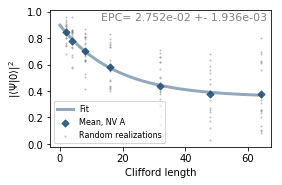

In [95]:
fname = r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_1q_oc=20230926_1_1" + "\\" \
        + "20230926-1054-10_rand_benchmark_pulsed_measurement.dat"
fname = r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_1q_bare_2" + "\\" \
        + "20230926-1232-33_rand_benchmark_pulsed_measurement.dat"
        #+ "20220510-1721-54_ramsey_crosstalk_ampl2=150.0mV_pulsed_measurement.dat" 
gpc = 1.97 # rb_1q_20230213
        
split_before = False
fit_on = 'delta'
perform_fit = True
calc_mean_datapoint = True
mask_last_n = 20

"""       
p_data, split_before=split_before, split_idx_start=1, lineplot=False,
                                     n_qubits=2, perform_fit=perform_fit, 
                                     idx_zref=0, mask_ref=True,
                                     idx_datas=idx_f, n_datas=2,
                                     labels=labels[idx_f],
                                     annotate_vals=['EPC', 'Lifetime', 'Offset']        
"""        
     
try:
    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
    
    y_baseline = mean_over_idxs(p_data, list(range(-mask_last_n,0)))
    p_data = plot_bench_data(p_data, #annotate_vals=['Offset', 'EPC'], 
                             annotate_vals=['EPC'], 
                    idx_zref=0, mask_idxs=[0] + list(range(-mask_last_n,0)),
                    labels = ['Mean, NV A', 'Random realizations'],
                    perform_fit=perform_fit, split_before=split_before)
    
    print(f"baseline= {y_baseline:.4f}. Offset fixed to this?")
    epc = p_data['fit_res']['EPC']['value']
    print(f"EPC= {epc:.4f}, EPG= {epc/gpc:.4f}")
    #plt.axhline(y_baseline, label=f"baseline= {y_baseline:.4f}", alpha=0.3)
    #plt.legend()
except:
    logger.exception("")

plt.tight_layout()
plt.savefig(plt_settings.get_savepath('rb_1q_A.png'), dpi=300)
plt.show()

baseline= 0.0951. Offset fixed to this?
EPC= 0.0136, EPG= 0.0069


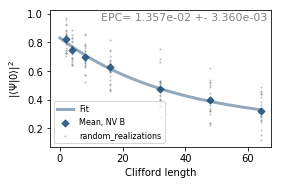

In [107]:
fname = r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_1q_oc=20230926_1_1" + "\\" \
        + "20230926-1109-13_rand_benchmark_pulsed_measurement.dat"
fname = r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_1q_bare_2" + "\\" \
        + "20230926-1221-25_rand_benchmark_pulsed_measurement.dat"
gpc = 1.97     

try:
    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
except:
    logger.exception("")

split_before = False
fit_on = 'delta'
perform_fit = True
calc_mean_datapoint = True
mask_last_n = 20

y_baseline = mean_over_idxs(p_data, list(range(-mask_last_n,0)))
p_data = plot_bench_data(p_data,# annotate_vals=['Offset', 'EPC'], 
                         annotate_vals=['EPC'], 
                idx_zref=0, mask_idxs=[0] + list(range(-mask_last_n,0)),
                labels = ['Mean, NV B', 'random_realizations'],
                perform_fit=perform_fit, split_before=split_before)

print(f"baseline= {y_baseline:.4f}. Offset fixed to this?")
epc = p_data['fit_res']['EPC']['value']
print(f"EPC= {epc:.4f}, EPG= {epc/gpc:.4f}")

plt.tight_layout()
plt.savefig(plt_settings.get_savepath('rb_1q_B.png'), dpi=300)
plt.show()

For EPC-> EPG: Native gates per clifford length 11.51.

0.08107682600985933

baseline= -0.0097. Offset fixed to this?
EPC= 0.1206, EPG= 0.0105


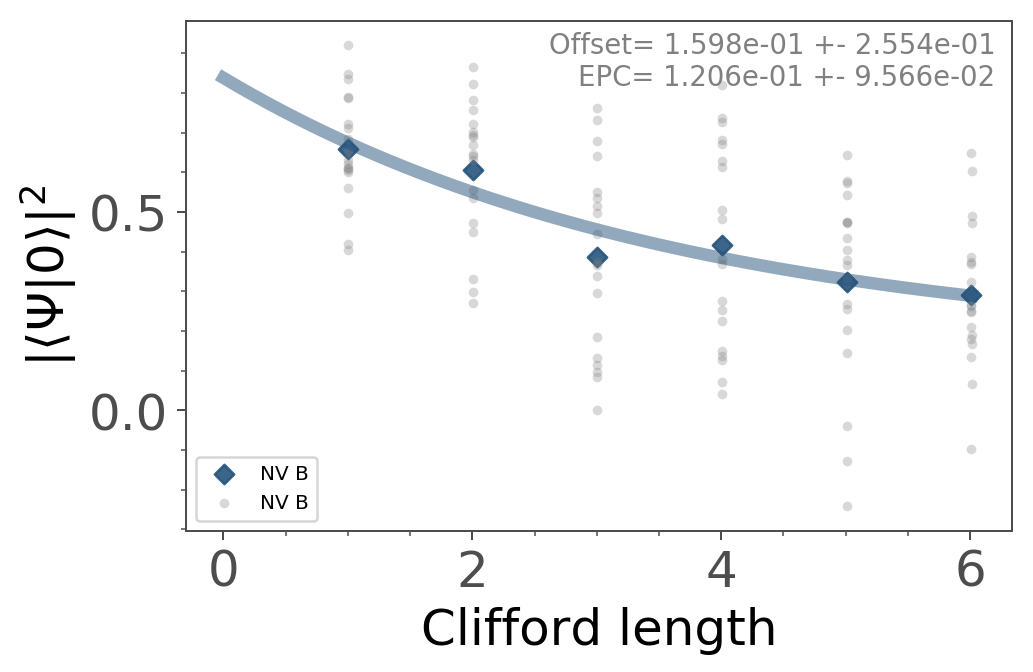

In [426]:
fname = r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_1q_oc=20230926_1_1" + "\\" \
        + "20230926-1130-44_rand_benchmark_2Q_noCNOT_pulsed_measurement.dat"
fname = r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_1q_bare_2" + "\\" \
        + "20230926-1243-27_rand_benchmark_1q_pulsed_measurement.dat"
gpc = 11.51      

try:
    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
except:
    logger.exception("")

split_before = False
fit_on = 'delta'
perform_fit = True
calc_mean_datapoint = True
mask_last_n = 20

y_baseline = mean_over_idxs(p_data, list(range(-mask_last_n,0)))
p_data = plot_bench_data(p_data, annotate_vals=['Offset', 'EPC'], 
                idx_zref=0, mask_idxs=[0] + list(range(-mask_last_n,0)),
                labels = ['NV B'],
                perform_fit=perform_fit, split_before=split_before)

print(f"baseline= {y_baseline:.4f}. Offset fixed to this?")
epc = p_data['fit_res']['EPC']['value']
print(f"EPC= {epc:.4f}, EPG= {epc/gpc:.4f}")

plt.tight_layout()
plt.savefig(savepath + 'rb_1q_B.png', dpi=300)
plt.show()

## 2Q Repetitive benchmarking

Need to manually fix:
- the fit offset= 0 in pgui. Note that the resulting EPC is only slighlty different!
- Lifetime sometimtes to ensure convergence in last plot. 

In [421]:
logger.info("test")

(541, 541)

In [555]:
idxs_plot

[slice(0, 20, 7), slice(0, 32, 4), slice(0, 32, 4)]

In [711]:
fname = os.path.normpath(fname)
p_data = Tk_file.load_pulsed_result(fname)



array([3.5       , 2.33333333])

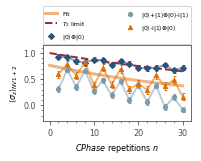

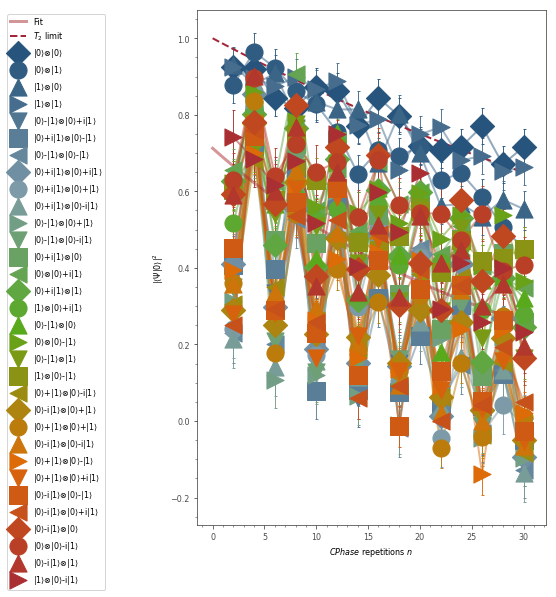

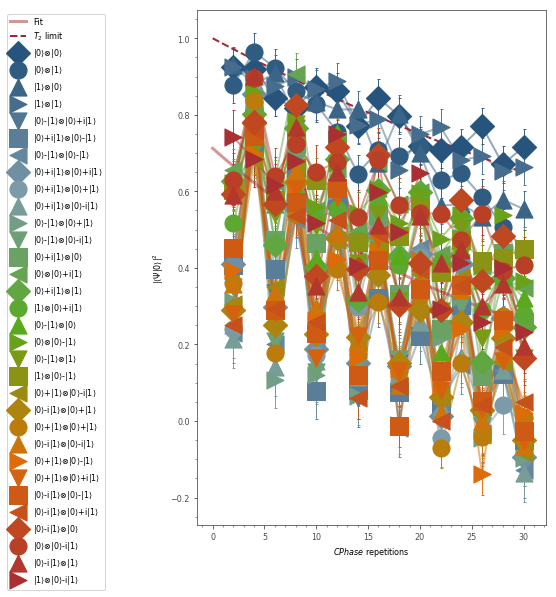

In [74]:
#plt.rcParams.update(params)

#fname = r"E:\Data\2023\06\20230602\PulsedMeasurement\nrep_cphase_3" + "\\" \
#        + "20230603-1141-07_rand_benchmark_pulsed_measurement.dat"
    
#fname = r"E:\Data\2023\10\20231009\PulsedMeasurement\nrep_cphase_1"  + "\\" \
#        + "20231009-1045-08_rand_benchmark_pulsed_measurement.dat"

fname = r"E:\Data\2023\10\20231009\PulsedMeasurement\nrep_cphase_1"  + "\\" \
        + "20231009-1030-46_rand_benchmark_pulsed_measurement.dat"

#fname = r"E:\Data\2023\10\20231011\PulsedMeasurement\nrep_cphase_2"  + "\\" \
#        + "20231011-2221-42_rand_benchmark_pulsed_measurement.dat"
        #+ "20231011-1348-40_rand_benchmark_pulsed_measurement.dat" 
        #+ "20231011-1511-41_rand_benchmark_pulsed_measurement.dat"
       
fname = r"E:\Data\2023\10\20231016\PulsedMeasurement\nrep_cphase_tau_cnot=-267ns_2" + "\\" \
    + "20231016-2051-31_rand_benchmark_pulsed_measurement.dat"
    
folder = r"E:\Data\2023\10\20231017\PulsedMeasurement\nrep_cphase_tau_cnot=-280ns_2" 

fnames = Tk_file.list_mult_pulsed_mes(folder, filter_strs=['measurement.dat'], incl_subdir=False)
fnames = fnames[::-1]

    
       

split_before = TomoRotations.c2phase1_dd
fit_on = 'delta'
calc_mean_datapoint = False
plot_errbar = True
z_ref = 0.278
idx_zref = 0
t2_limit = None 
t2_limit = np.mean([430e-6, 460e-6])

n_mod_filter = None #0 #2
n_per_group = [(4,4),(9,1),(4,1)]
n_per_group = [(8,8),(8,8),(4,4)]
n_per_group = [(8,1),(8,1),(4,1)]
#n_per_group = [(16,1),(4,1),(4,1)]   # (n_total), (n_to_show)
n_per_group = [(20,20),(4,4),(4,4)]   # (n_total), (n_to_show)
idxs_plot = [slice(0,n_per_group[0][1]),
            slice(n_per_group[0][0],n_per_group[0][0]+n_per_group[1][1]),
            slice(n_per_group[0][0]+n_per_group[1][0],n_per_group[0][0]+n_per_group[1][0]+n_per_group[2][1])]
idxs_plot = [slice(0,8,1),
            slice(0,32,1),
            slice(0,32,1)]
idxs_plot = [[0, 20, 28],
            slice(0,32,1),
            slice(0,32,1)]

if idx_zref != None:
    z_ref = None
    
try:
    p_datas = []
    for fname in fnames:
        fname = os.path.normpath(fname)
        p_data = Tk_file.load_pulsed_result(fname)
        if p_data['exp_params'] is None:
            continue
        p_datas.append(p_data)
    
    p_data = combine_mes(p_datas, join_rots=True, drop_added_idxs=[idx_zref])
    
    if n_mod_filter is not None:
        p_data['data'] = p_data['data'].where(((n_mod_filter + np.round(p_data['data']['tau']))%4==0) | (np.round(p_data['data']['tau'])==0))
        p_data['data'] = p_data['data'].dropna()
except:
    logger.exception("")




try:
    plt.figure(figsize=(3,3.5*3/5))
    plot_bench_data(p_data,  split_before=split_before, 
                    split_idx_start=0, mask_idxs=[0],
                    #annotate_vals=['EPC', 'Lifetime','Offset'],
                    annotate_vals=[],
                    idx_plot=idxs_plot[0],
                    lineplot=True, plot_err=plot_errbar,
                    z_ref=z_ref, idx_zref=idx_zref)
    
    if t2_limit is not None:
        ampl_exp =  1 #1.04 #p_data['fit_res']['Amplitude']['value']
        #plot_rb_t2_limit(epc_t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
        #                 y0=y_baseline, ampl=ampl_exp)
        plot_nrep_t2_limit(t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
                         y0=0, ampl=ampl_exp)
        
    #plt.legend(prop={'size': 12}, bbox_to_anchor=(-0.25,1.0))
    plt.legend(ncol=2, loc='lower left',
               bbox_to_anchor=(0., 1.02, 1., .102),
               mode="expand", borderaxespad=0.,
              )
    
    plt.xlabel(r"$CPhase$ repetitions $n$")
    plt.ylabel(r'$\langle \sigma_z \rangle_{NV1+2}$')
    plt.ylim([-0.3, 1.15])

    plt_settings.savefig('nrep_cphase_1', frame_top_inch=0.5)
    plt.show()

 
    plt.figure(figsize=(8,8))
    plot_bench_data(p_data,  split_before=split_before, 
                    split_idx_start=0, mask_idxs=[0],
                    #annotate_vals=['EPC', 'Lifetime','Offset'],
                    annotate_vals=[],
                    lineplot=True, plot_err=plot_errbar,
                    idx_plot=idxs_plot[1], z_ref=z_ref, idx_zref=idx_zref)
                   # idx_plot=[4,20], z_ref=z_ref, idx_zref=idx_zref)
    if t2_limit is not None:
        ampl_exp =  1.0 #p_data['fit_res']['Amplitude']['value']
        #plot_rb_t2_limit(epc_t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
        #                 y0=y_baseline, ampl=ampl_exp)
        plot_nrep_t2_limit(t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
                         y0=0, ampl=ampl_exp)    
    
    #plt.legend(prop={'size': 12}, bbox_to_anchor=(-0.25,1.0))
    plt.legend(bbox_to_anchor=(-0.25,1.0), prop={'size': 8})
    #plt.xlabel(r"$CRZ^{\pi/2}$ repetitions")
    plt.xlabel(r"$CPhase$ repetitions $n$")
    
    plt.tight_layout(pad=0.55)
    plt.savefig(plt_settings.get_savepath('nrep_cphase_2'), dpi=300)
    plt.show()
    
    plt.figure(figsize=(8,8))
    plot_bench_data(p_data, split_before=split_before, 
                    split_idx_start=0, mask_idxs=[0],
                    #annotate_vals=['EPC', 'Lifetime','Offset'],
                    annotate_vals=[],
                    idx_plot=idxs_plot[2],
                    lineplot=True, plot_err=plot_errbar,
                    z_ref=z_ref, idx_zref=idx_zref)
                    #idx_plot=[20,36], z_ref=z_ref, idx_zref=idx_zref)
    if t2_limit is not None:
        ampl_exp =  1.0 #p_data['fit_res']['Amplitude']['value']
        #plot_rb_t2_limit(epc_t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
        #                 y0=y_baseline, ampl=ampl_exp)
        plot_nrep_t2_limit(t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
                         y0=0, ampl=ampl_exp) 
    #plt.legend(prop={'size': 12}, bbox_to_anchor=(-0.25,1.0))
    
    
    plt.legend(bbox_to_anchor=(-0.25,1.0), prop={'size': 8})
    plt.xlabel(r"$CPhase$ repetitions")
    #plt.xlabel(r"$CRZ^{\pi/2}$ repetitions")

    
    plt.tight_layout(pad=0.55)
    plt.savefig(plt_settings.get_savepath('nrep_cphase_3'), dpi=300)
    plt.show()
    
    plt.rcParams.update(default_params)
    
except:
    logger.exception("")

In [1537]:
idxs_plot[2]

slice(0, 32, 1)

### pEPG for all inits

ATTENTION: Need to manually fix exp_decay=0!

In [2600]:
raise NormallyNoNeeded

# filter out a single n_mod
p_data = Tk_file.load_pulsed_result(fname)
p_data

n_mod = 2
if n_mod is not None:
    p_data['data'] = p_data['data'].where(((n_mod + np.round(p_data['data']['tau']))%4==0) | (np.round(p_data['data']['tau'])==0))
    p_data['data'] = p_data['data'].dropna()
    
p_i = plot_bench_data(p_data,  split_before=split_before, split_idx_start=1, annotate_vals=['EPC', 'Offset'],
                            lineplot=True, idx_plot=[5,5+1],  z_ref=z_ref, idx_zref=idx_zref)
#p_i['exp_params']['rotations']

In [90]:
fnames

['E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\nrep_cphase_tau_cnot=-280ns_2/20231017-1733-29_rand_benchmark_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\nrep_cphase_tau_cnot=-280ns_2/20231017-1733-26_nrep_cphase_AllCliff_group=1_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\nrep_cphase_tau_cnot=-280ns_2/20231017-1635-30_nrep_cphase_AllCliff_group=-3_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\nrep_cphase_tau_cnot=-280ns_2/20231017-1635-24_rand_benchmark_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\nrep_cphase_tau_cnot=-280ns_2/20231017-1543-38_rand_benchmark_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\nrep_cphase_tau_cnot=-280ns_2/20231017-1543-36_nrep_cphase_AllCliff_group=-2_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\nrep_cphase_tau_cnot=-280ns_2/20231017-1327-34_nrep_cphase_AllCliff_group=+3_pulsed

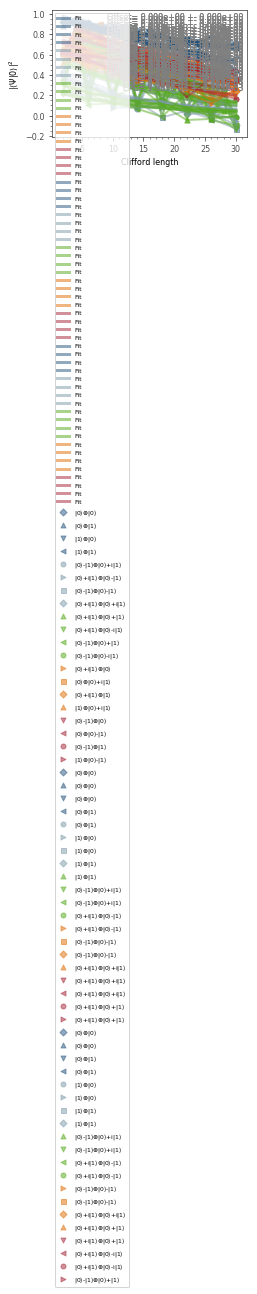

In [35]:
n_inits = 4+16#+16  #17
fit_val = 'Lifetime'  # 'EPC'
fit_val = 'EPC'

folder = r"E:\Data\2023\10\20231017\PulsedMeasurement\nrep_cphase_tau_cnot=-280ns_2" 

fnames = Tk_file.list_mult_pulsed_mes(folder, filter_strs=['measurement.dat'], incl_subdir=False)
fnames = fnames[::-1]

res = {'epc': [], 'depc': [], 'n_mod':[], 'x': [], 'x_npi90': [],
       'init_state':[], 'init_state_str': []}
try:
    p_datas = []
    for fname in fnames:
        fname = os.path.normpath(fname)
        p_data = Tk_file.load_pulsed_result(fname)
        if p_data['exp_params'] is None:
            continue
        p_datas.append(p_data)
    
    for n_mod in [None, 0, 2]:#[None, 0, 2]:
        for i in range(n_inits):
            # filter
            #if i not in range(4+8,4+8+8):
            #    continue
            logger.debug(f"[{i}] n_mod= {n_mod}")
            
            p_data = combine_mes(cp.deepcopy(p_datas), join_rots=True, drop_added_idxs=[idx_zref])
    
            if n_mod is not None:
                p_data['data'] = p_data['data'].where(((n_mod + np.round(p_data['data']['tau']))%4==0) | (np.round(p_data['data']['tau'])==0))
                p_data['data'] = p_data['data'].dropna()
            
            p_i = plot_bench_data(p_data,  split_before=split_before, split_idx_start=1, annotate_vals=['EPC', 'Offset'],
                            idx_plot=slice(i,i+1),  z_ref=z_ref, idx_zref=idx_zref,
                            lineplot=True, idx_datas=i, n_datas=n_inits)
                            # todo: better: # split_idx_start=0, mask_idxs=[0]?
                
            res['epc'].append(p_i['fit_res'][fit_val]['value'])
            res['depc'].append(p_i['fit_res'][fit_val]['error'])
       
            # TODO: for n_mod!=None, extract_init will fail!
            # count n(pi90) pulses
            init = [i for i in extract_init_from_rots(p_i['exp_params']['rotations'][0], split_before=split_before)]
            pi90_inits = [TomoRotations.ux90_on_1, TomoRotations.uy90_on_1, TomoRotations.ux90_on_2, TomoRotations.uy90_on_2]
            x = np.sum([init.count(i) for i in pi90_inits])
            res['x_npi90'].append(x)
            
            # init_state label
            vec0, vec1, idx = init_2_state(init)
            state_str = qubits_2_str(vec0, vec1)
            
            res['n_mod'].append(n_mod)
            res['x'].append(i)
            res['init_state_str'].append(state_str)
            res['init_state'].append(init)

except:
    logger.exception("")
    
plt.legend()
plt.show()

res = pd.DataFrame(res)

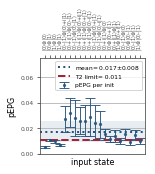

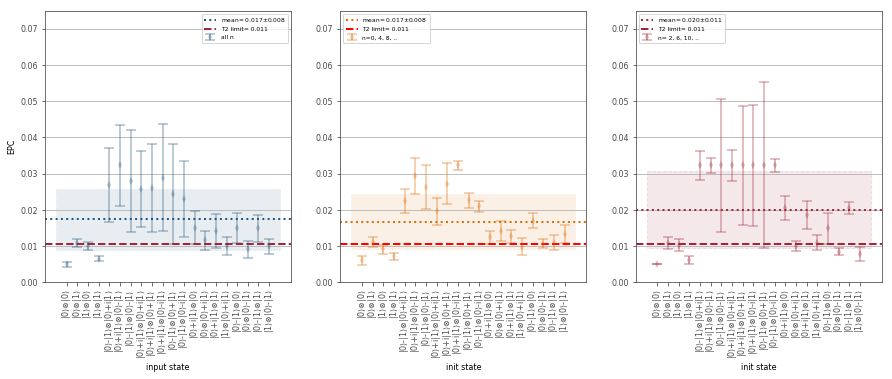

In [68]:
# todo: check wheter can use x axis from res_0 for all plots
# all n


#ylim = [0,125]
ylim = [0,0.075]
#ylim = None
xlim =  range(0,n_inits)
xlim =  [0-1, n_inits-1+1]

#xlim = range(0,n_inits)
#xlim = range(12,20)
t2_limit = None
t2_limit = np.mean([430e-6, 460e-6])


# Todo: might break due to grid for lifetime (not EPC)


try:
    
    
    res_0 = res[res['n_mod'].isna()]
    res_1 = res.where(res['n_mod'] == 0.)
    res_1 = res_1.dropna()
    res_2 = res.where(res['n_mod'] == 2.)
    res_2 = res_2.dropna()
    
    plt.figure(figsize=(2.25,3.5*2/3))
    plt.errorbar(res_0['x'], res_0['epc'], yerr=res_0['depc'],
                 capthick=1, linewidth=1,
                 linestyle="", color=plt_settings.color('blue'), label="pEPG per init",
                 markersize=plt_settings.get_markersize('medium'),
                 marker="o", #marker="D",
                 alpha=0.9)
    mean_epg = np.mean(res_0['epc'])
    std_epg = np.std(res_0['epc'])

    plt.axhline(mean_epg, color=plt_settings.color('blue'), linestyle=":", label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color=plt_settings.color('red'), linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")
    plt.fill_between(xlim, np.mean(res_0['epc'])-np.std(res_0['epc']), np.mean(res_0['epc'])+np.std(res_0['epc']),
                     color=plt_settings.color('blue'), alpha=0.1, linewidth=0) # linestyle=":"

    plt.xlabel("input state")
    plt.ylabel("pEPG")
    plt.yticks(fontsize=6)
    #plt.ylabel(f"{fit_val}")
    
    if xlim is not None:
        plt.xlim(xlim)
    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc="upper right")
    plt.xticks(res_0['x'], res_0['init_state_str'], fontsize=5, rotation='vertical')
    ax = plt.gca()
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')
    
    plt.tight_layout()
    plt_settings.savefig('nrep_epg_vs_init', frame_left_inch=0.6, frame_bottom_inch=0.3,
                         frame_top_inch=0.7, frame_right_inch=0.2)
    
    
    
    # Supplement: mod(4) with subplots
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.errorbar(res_0['x'], res_0['epc'], yerr=res_0['depc'], 
                 capthick=2, linewidth=2,
                 linestyle="", color=plt_settings.color('blue'), label="all n", marker="d", alpha=0.3)
    mean_epg = np.mean(res_0['epc'])
    std_epg = np.std(res_0['epc'])

    plt.axhline(mean_epg, color=plt_settings.color('blue'), linestyle=":", label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color=plt_settings.color('red'), linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")
    plt.fill_between(xlim, np.mean(res_0['epc'])-np.std(res_0['epc']), np.mean(res_0['epc'])+np.std(res_0['epc']),
                     color=plt_settings.color('blue'), linestyle=":", alpha=0.1)

    plt.xlabel("input state")
    plt.ylabel("pEPG")
    plt.ylabel(f"{fit_val}")

    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc="upper right")
    plt.xticks(res_0['x'], res_0['init_state_str'], fontsize=8, rotation='vertical')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')



    plt.subplot(132)
    plt.errorbar(res_1['x'], res_1['epc'], yerr=res_1['depc'], linestyle="", capthick=2,
                 color=plt_settings.color('orange'), label="n=0, 4, 8, ..", marker="d",  alpha=0.3)
    mean_epg = np.mean(res_1['epc'])
    std_epg = np.std(res_1['epc'])
    plt.axhline(mean_epg, color=plt_settings.color('orange'), linestyle=":", label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color='red', linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")

    plt.fill_between(xlim, np.mean(res_1['epc'])-np.std(res_1['epc']), np.mean(res_1['epc'])+np.std(res_1['epc']),
                     color=plt_settings.color('orange'), linestyle=":", alpha=0.1)

    plt.xlabel("init state")
    plt.xticks(res_2['x'], res_0['init_state_str'], fontsize=8, rotation='vertical')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')

    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc="upper left")



    plt.subplot(133)
    plt.errorbar(res_2['x'], res_2['epc'], yerr=res_2['depc'], linestyle="", capthick=2,
                 color=plt_settings.color('red'), label="n= 2, 6, 10, ..",  marker="d",  alpha=0.3)
    mean_epg = np.mean(res_2['epc'])
    std_epg = np.std(res_2['epc'])
    plt.axhline(mean_epg, color=plt_settings.color('red'), linestyle=":", label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color=plt_settings.color('red'), linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")
    plt.fill_between(xlim, np.mean(res_2['epc'])-np.std(res_2['epc']), np.mean(res_2['epc'])+np.std(res_2['epc']),
                     color=plt_settings.color('red'), linestyle="dashed", alpha=0.1)

    plt.xticks(res_2['x'], res_0['init_state_str'], fontsize=8, rotation='vertical')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')

    plt.xlabel("init state")

    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc="upper left")

except:
    logger.exception("")
    
#plt.tight_layout()
plt.show()

In [348]:
std_epg

49229.45795208508

In [163]:
# histogram
plt.figure()
N, bins, patches = plt.hist(res['epc'], bins=15)

for i in range(0,3):
    patches[i].set_facecolor('b')
for i in range(3,8):    
    patches[i].set_facecolor('r')
for i in range(8, len(patches)):
    patches[i].set_facecolor('black')
    
plt.show()

In [141]:
res['epc']

[]


quick n dirty injection of Charge-init data for Fedor. Get data from other PostProcess.ipynb, n_phots=9

In [449]:
p_inject = p_mess[9]
p_inject['data'] = pd.DataFrame(p_inject['data'])

rotations = '<TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90min_on_1: 7>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>'

p_inject['exp_params'] = {'rotations':None}
p_inject['exp_params']['rotations'] = rotations

#p_inject['exp_params']['rotations']

'<TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90min_on_1: 7>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>'

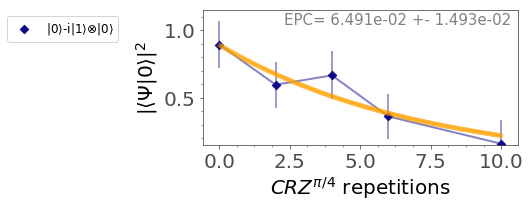

In [158]:
plt.rcParams.update(params)

fname = r"E:\Data\2023\06\20230602\PulsedMeasurement\nrep_cphase_3" + "\\" \
        + "20230603-1141-07_rand_benchmark_pulsed_measurement.dat"
try:
    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
except:
    logger.exception("")

p_data['data'] = p_inject['data']
p_data['exp_params']['rotations'] = p_inject['exp_params']['rotations']
    
split_before = TomoRotations.c2phase1_dd
fit_on = 'delta'
perform_fit = True
calc_mean_datapoint = False
z_ref = 0.372302

plot_bench_data(p_data, annotate_vals=['EPC'], split_before=split_before, split_idx_start=0, lineplot=True,
        idx_plot=[0,1], plot_err=True)
plt.legend(prop={'size': 12}, bbox_to_anchor=(-0.25,1.0))
plt.xlabel(r"$CRZ^{\pi/4}$ repetitions")
plt.ylim([0.15, 1.15])

plt.tight_layout()
plt.savefig(savepath + r'\\20230622_nrep_cphase_5_pcs_1.png', dpi=300)
plt.show()


plt.rcParams.update(default_params)



In [383]:
savepath + '\20230622_nrep_cphase_5_pcs_1.png'

'C:\\Users\\Setup3-PC\\Desktop\\_poster_figs\x8230622_nrep_cphase_5_pcs_1.png'

## 2Q RB(n_thresh=1) vs Rabi

In [570]:
def _load_2q_vs_rabi(folder):

    p_raw, x, y, fnames = [], [], [], []
    z1s, z2s = None, None

    filter_strs = ['pulsed_measurement', '.dat']

    fnames = Tk_file.list_mult_pulsed_mes(folder, filter_strs=filter_strs, incl_subdir=False)

    for f in fnames:
        p_i = Tk_file.load_pulsed_result(f)
        p_raw.append(p_i)
    
    logger.info(f"{fnames[0]}")
    idx_var = -2  # None # for time ordered
    #Put onto 2d grid: Every row a single pulsed result
    x, y, z1s, z2s = pulsed_series_2_array(p_raw, idx_var_y=idx_var, ordered_y=False)
    refs = None

    omega_rabi = 1/np.asarray([p['exp_params']['rabi_period'] for p in p_raw])
    y = omega_rabi
    
    return x, y, z1s, z2s, p_raw

def plot_2d_series_cut(x, y, z1s, z2s,
                       plot_mode='delta_norm', cut_mod='delta_norm', idx_cut_x=0, idx_cut_y=0,
                       lineplot=False, label='experiment', 
                       idx_datas=0):


    z1_norm = (z1s)/np.average(z1s, axis=1)[:,None]
    refs = None
    
    if not np.any(np.isnan(z2s[0])):
        if plot_mode == 'delta_norm':
            #delta_norm = (z1s-z2s)/np.average(z1s, axis=1)[:,None]
            delta_norm = norm_func(z1s, z2s, refs)
            #z2_norm = (z2s)/np.average(z2s, axis=1)[:,None]
            #plot_mode = "z2"
        elif plot_mode =='delta':
            delta_norm = z1s-z2s
        elif plot_mode == 'z2':
            delta_norm = z2s
        elif plot_mode == 'z1':
            delta_norm = z1s
    else:
        if plot_mode == 'z1_norm':
            z1_norm = (z1s)/np.average(z1s, axis=1)[:,None]
            delta_norm = z1_norm

    """
    #plt.figure(figsize=(5,3.5))
    
    if plot_mode == 'delta_norm' or plot_mode == 'delta':
        plt.figure(figsize=(9,4))
        plt.subplot(121)
        plt.title(f"{plot_mode}")
        plt.imshow(delta_norm, 
                   extent=extent, aspect='auto', origin='lower', cmap="plasma"
                  #,vmin=0.1
                  #,vmax=0.26
                  )

        if cut_mode == "delta_norm" or cut_mode == 'delta':
            plt.axvline(x[idx_cut_x]*scale_fac[0])
            plt.axhline(y[idx_cut_y]*scale_fac[1], color='red')

        plt.xlabel(plot_labels[0])
        plt.ylabel(plot_labels[1])
        plt.colorbar()

    #plt.ylim(6.6,10)

    plt.subplot(122)
    """
    """
    plt.title("z1")
    plt.imshow(z1s, 
               extent=extent, aspect='auto', origin='lower', cmap="plasma"
              #,vmin=0.85, vmax=1,
               #,vmax=1.02,
              )
    plt.xlabel(plot_labels[0])
    plt.ylabel(plot_labels[1])
    plt.xlim([extent[0],extent[1]])
    plt.ylim([extent[2],extent[3]])
    plt.colorbar()


    plt.tight_layout()
    plt.show()
    """

    for idx, line_slice in enumerate([(idx_cut_y, slice(None)),
                                      (slice(None), idx_cut_x)]):
        color = plt.cm.plasma((1-idx+idx_datas)/2)
        color = plt_settings.get_cmap(False)((1-idx+idx_datas)/(2))
        
        if idx is 0:
            x_axis = x
        elif idx is 1:
            x_axis = y
        else:
            raise ValueError

        # plot cuts
        if cut_mode == "delta_norm" or cut_mode == 'delta':
            zcut = delta_norm
        else:
            zcut = z1s
        #return zcut
        
        marker_style = plt_settings.marker_style(color, is_scatter=False)

        if idx == 1:
            #plt.figure(figsize=(5,3))

            #plt.subplot(111)
            x = x_axis*scale_fac[0+idx]
            y = zcut[line_slice[0], line_slice[1]]
            plt.plot(x, y,
                 label=label,
                 alpha=0.8, **marker_style, zorder=9)
            if lineplot:
                plt.plot(x_axis*scale_fac[0+idx], zcut[line_slice[0], line_slice[1]],
                        label='_no_legend',
                         color=color, alpha=0.8, marker='', zorder=9)

            plt.xlabel(plot_labels[0 + idx])
            plt.ylabel(plot_labels[2])
            plt.legend(loc='lower right')

            #plt.tight_layout()
            #plt.show() 
        
    return x, y
            
z1s, z2s= None, None
folder = r"E:\Data\2023\09\20230914\PulsedMeasurement\rb_2q_vs_rabi_3"
folder = r"E:\Data\2023\10\20231012\PulsedMeasurement\rb_2q_vs_rabi_1"



In [472]:

z1s.shape

In [1159]:
x, y = data_sim['Rabi_freq'], data_sim['meas_old']
y2 = data_sim['meas_new']

y-y2

array([-0.00244936,  0.00421068,  0.0137507 ,  0.00754974,  0.00490682,
        0.00491439,  0.0078175 ,  0.01647308,  0.03883763,  0.06591212,
        0.12319057,  0.20150786,  0.29657128,  0.38003926,  0.43746545,
        0.48848979,  0.58992016,  0.66495974,  0.71013473,  0.7178208 ])

In [584]:
import scipy.interpolate

scale_fac = [1, 1e-6]

plot_labels = ["tau2 (ns)", "tau1 "]
plot_labels = ["n_rand", "p_scale", "|00> pop. RB"]
plot_labels = ["n_rand", "Rabi frequency (MHz)", r"$|\langle \Psi |0 \rangle |^2$"]
plot_labels = ["n_rand", "Rabi frequency (MHz)", r"Survival probability"]


def norm_on_2dref(z1s, z2s, refs=None):
    return (z1s-z2s)/refs
def norm_on_1st_col(z1s, z2s, refs=None):
    return (z1s-z2s)/(z1s-z2s)[:,[0]]

def norm_on_1st_col_avg_row(z1s, z2s, refs=None):
    means = np.tile(np.mean((z1s-z2s)[:,0:], axis=1), (len(x)-1,1)).T

    return np.hstack(((z1s-z2s)[:,[0]], means))/(z1s-z2s)[:,[0]]


idx_cut_y = 1
idx_cut_x = -1
plot_mode = "delta_norm"  # 'delta_norm'
#plot_mode = "delta"  # 'delta_norm'
#plot_mode = "z1"
norm_func = norm_on_2dref
norm_func = norm_on_1st_col
norm_func = norm_on_1st_col_avg_row

cut_mode = "delta"
cut_mode = "delta_norm"

try:
    #plt.figure(figsize=(6,4))
    folder = r"E:\Data\2023\09\20230914\PulsedMeasurement\rb_2q_vs_rabi_3"
    # todo, no idea why loading 2x necesary
    x, y, z1s, z2s, p_raw = _load_2q_vs_rabi(folder)  
    
    #x, y, z1s, z2s, p_raw = _load_2q_vs_rabi(folder) 
    
    plt.figure(figsize=(3.5,2.5)) # paper
    #plt.figure(figsize=(4,3)) # debug
    
    extent = [x[0]*scale_fac[0], x[-1]*scale_fac[0], y[0]*scale_fac[1], y[-1]*scale_fac[1]]
    x_plot_1, y_plot_1 = plot_2d_series_cut(x, y, z1s, z2s, 
                       idx_cut_x=1, label=r"experiment, 60 G, $n_{cliff}=1$")
    y_min_60g, y_max_60g = np.min(y_plot_1), np.max(y_plot_1)
    
    folder = r"E:\Data\2023\10\20231017\PulsedMeasurement\rb_2q_vs_rabi_calib_deer_dd=0.5,0.5_3"
    x, y, z1s, z2s, p_raw = _load_2q_vs_rabi(folder)     
    #x, y, z1s, z2s, p_raw = _load_2q_vs_rabi(folder)     
    x_plot, y_plot = plot_2d_series_cut(x, y, z1s, z2s,
                       plot_mode=plot_mode, cut_mod=cut_mode, 
                       lineplot=False, idx_datas=2,
                       idx_cut_x=1, label=r"experiment, 100 G, $n_{cliff}=1$")
    y_min_100g, y_max_100g = np.min(y_plot), np.max(y_plot)
    
    
    # Simulation data
    fname = r"E:\Data\2023\10\20231030\simulation_julich" + "\\" \
            + r"rand_bench_ncliff=1.npz"
        # + r"20231030_simFerlemann_cphase_vs_rabi.csv"
    do_strech = False
    
    if '.csv' in fname:
        data_sim = pd.read_csv(fname, header=1, usecols=[0,1,4,5])
        data_sim = data_sim.dropna(how='all')
        x, y = data_sim['Rabi (MHz)'], data_sim['Fidelity (avg)']
    if '.npz' in fname:
        data_sim = np.load(fname)
        x, y = data_sim['Rabi_freq'], -data_sim['meas_old'] +0.1
        #['', 'meas_old', 'meas_new']
    
    y = y/np.max(y) # norm to 1
    y = y*y_max_60g # align with max of exp data
    
    plt.plot(x,y, marker="", color=plt_settings.color('bluelight'), label="Sim, 60 G")
    
    if do_strech:
        new_range = [y_min_60g, y_max_60g]
        original_range = [np.min(y), np.max(y)]
        interp_func = scipy.interpolate.interp1d(original_range, new_range, kind='linear', fill_value='extrapolate')
        
        plt.plot(x,interp_func(y),color=plt_settings.color('blue'),   label="Sim, 60 G, linear streched",
                marker="",)
    plt.legend(loc='lower right')
    
    # Simulation data, 100 G
    if '.csv' in fname:
        x, y = data_sim['Rabi (MHz).1'], data_sim['Fidelity (avg).1']
    if '.npz' in fname:
        x, y = data_sim['Rabi_freq'], -data_sim['meas_new'] + 0.1
    
    y = y/np.max(y) # norm to 1
    y = y*y_max_100g # align with max of exp data
    
    plt.plot(x,y, marker="", color=plt_settings.color('orange'), label="Sim, 100 G", zorder=2)
    
    
    if do_strech:
        new_range = [y_min_100g, y_max_100g]
        original_range = [np.min(y), np.max(y)]

        interp_func = scipy.interpolate.interp1d(original_range, new_range, kind='linear', fill_value='extrapolate')

        plt.plot(x,interp_func(y),color=plt_settings.color('red'),   label="Sim, 100 G, linear streched",
                marker="",)
    
    
    # EPC Simulation data
    fname = r"E:\Data\2023\10\20231030\simulation_julich\20231113_rb_vs_rabi" + "\\" \
            + r"rand_bench_rabi_vs_epc.npz"

    data_sim = np.load(fname)
    x, y_60g = data_sim['rabi_freq'], 1-data_sim['epc_old']
    y_100g = 1-data_sim['epc_new']
    
    #y_60g = y_60g/np.max(y_100g) # norm to 1
    #y_60g = y_60g*y_max_100g#y_max_60g # align with max of exp data
    
    #y_100g = y_100g/np.max(y_100g) # norm to 1
    #y_100g = y_100g*y_max_100g # align with max of exp data
    
    plt.legend(loc='lower right')
    
    #ax = plt.gca()
    #ax2 = ax.twinx()
    #plt.ylabel("Simulated 1-EPC")
    #plt.plot(x,y_100g, linestyle=":", marker="", color=plt_settings.color('red'), label='sim EPC, 100 G')
    #plt.plot(x,y_60g, linestyle=":", marker="", color=plt_settings.color('blue'), label='sim EPC, 60 G')
    
    plt.ylim([0.05,1.05])
    plt.yscale("log")   
    
    
    plt.legend(loc='lower right')

    plt_settings.savefig('rb_2q_vs_rabi.png')
    plt.show()
except:
    logger.exception("")
    
0

0

In [1985]:
x_plot, y_plot, x_plot_1, y_plot_1

(array([22.62512508, 22.13889875, 21.70084218, 21.04588197, 20.68919613,
       20.20641058, 19.57136967, 19.04684976, 18.48425318, 17.91665582,
       17.31258384, 16.63462983, 15.97655861, 15.3606203 , 14.66375691,
       14.01988543, 13.24623241, 12.45646494, 11.71629493, 10.90543644]), array([0.36952835, 0.38682754, 0.36664775, 0.39462709, 0.37835436,
       0.39319317, 0.36877077, 0.35769407, 0.35238162, 0.35958102,
       0.3476543 , 0.3392072 , 0.33798546, 0.32281806, 0.31011984,
       0.30255101, 0.28273991, 0.27381124, 0.25391802, 0.23890322]), array([18.50939578, 17.5590782 , 16.64023867, 15.73599762, 14.81194404,
       13.83101997, 12.82943089, 11.83666869, 10.84958369,  9.80117209,
        8.75105762,  7.7012352 ,  6.65113545]), array([0.22119468, 0.25505533, 0.27773781, 0.30487572, 0.31453632,
       0.31315899, 0.2932103 , 0.27762372, 0.24829061, 0.21742758,
       0.20123907, 0.16117696, 0.14565816]))

In [2295]:
data_sim.__dict__
len(x)

10

0

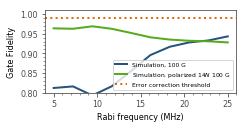

In [257]:
fname = r"E:\Data\2023\10\20231030\simulation_julich\20231113_rb_vs_rabi" + "\\" \
            + r"rand_bench_rabi_vs_epc.npz"

data_sim = np.load(fname)

#data_sim = data_sim.dropna(how='all')
x, y_60g = data_sim['rabi_freq'], 1-data_sim['epc_old']
y_100g = 1.1*(1-data_sim['epc_new'])
y_perfect = 0.3*(1.95+1+data_sim['epc_new'])


plt.figure(figsize=(3.5,1.8))

plt.plot(x,y_100g, marker="", label='Simulation, 100 G', color=plt_settings.color('blue'))
plt.plot(x,y_perfect, marker="", label=r'Simulation, polarized $14N$ 100 G', color=plt_settings.color('green'))
#plt.plot(x,y_60g, marker="", label='sim EPC, 60 G')
plt.axhline(0.99, linestyle=":", color=plt_settings.color('orange'), 
            label="Error correction threshold")
#plt.axhline(0.995, linestyle=":", color=plt_settings.color('red'), 
#            label="T2 limit")


plt.ylim([0.8, 1.01])
#plt.yscale("log")   

plt.xlabel('Rabi frequency (MHz)')
plt.ylabel('Gate Fidelity')

plt.legend(loc='lower right')


plt_settings.savefig('F_sim_vs_rabi.png', frame_top_inch=0.1)
plt.show()

0

In [116]:
1.1*y_100g

array([0.81221862, 0.81618804, 0.79333999, 0.81639967, 0.85504996,
       0.8956574 , 0.91677651, 0.92769885, 0.93279926, 0.94310968])

## 2Q Randomized benchmarking

Need to manuall fix decay_exp fit:
    - Lifetime, vary between 0-2.
    - Fix Offset= 0.

For EPC-> EPG, use qiskit::calculate_2q_epg function in generate_rb.ipynb. Lifetime (x-axis cliffords): 2.3
Note: 

In [1951]:
0

0

In [2191]:
fname = r"E:\Data\2023\09\20230918\PulsedMeasurement\rb_2q_oc=20230916_2" + "\\" \
        + "20230918-1343-46_rand_benchmark_pulsed_measurement.dat"
#fname = r"E:\Data\2023\09\20230919\PulsedMeasurement\rb_2q_interleaved_1"  + "\\" \
#        + "20230919-1344-36_rand_benchmark_pulsed_measurement.dat"
    
#fname = r"E:\Data\2023\09\20230919\PulsedMeasurement\rb_2q_interleaved_1"  + "\\" \
#        + "20230919-1417-01_rand_benchmark_pulsed_measurement.dat"
    
fname = r"E:\Data\2023\09\20230921\PulsedMeasurement\rb_2q_interleaved_1"  + "\\" \
        + "20230921-1125-24_rand_benchmark_pulsed_measurement.dat"
    
fname = r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_bare_gateset_5" + "\\" \
        + "20230922-1542-12_rand_benchmark_1q_pulsed_measurement.dat"

fname =  r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_2q_bare_3" + "\\" \
        + "20230926-1412-35_rand_benchmark_1q_pulsed_measurement.dat"
#fname =  r"E:\Data\2023\10\20231004\PulsedMeasurement\rb_2q_2" + "\\" \
#        + "20231004-1226-19_rand_benchmark_1q_pulsed_measurement.dat"
#fname = r"E:\Data\2023\10\20231004\PulsedMeasurement\rb_2q_interleaved_3" + "\\" \
#        + "20231004-1239-47_rand_benchmark_1q_pulsed_measurement.dat"



#folder = r"E:\Data\2023\10\20231006\PulsedMeasurement\rb_2q_oc_1"
#folder = r"E:\Data\2023\09\20230925\PulsedMeasurement\rb_2q_interleaved_gateset_oc_2"
folder = r"E:\Data\2023\10\20231017\PulsedMeasurement\rb_2q_vs_rabi_calib_deer_dd=0.5,0.5_3\calib_y_axis"
folder = r"E:\Data\2023\10\20231017\PulsedMeasurement\rb_2q_tau_cnot=-280ns_1"
folder = r"E:\Data\2023\10\20231017\PulsedMeasurement\rb_2q_vs_rabi_fullDecays_4"

fnames = Tk_file.list_mult_pulsed_mes(folder, filter_strs=['measurement.dat'], incl_subdir=False)

fname = fnames[0]
    
epc = 1
gpc = 1
    
    
try:
    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
    
    #p_data['fit_settings'] = {'fit_func_nonqudi': _rb_fit_func_2}

    split_before = False
    fit_on = 'delta'
    perform_fit = True
    calc_mean_datapoint = True
    mask_last_n = 20
    epc_t2_limit = 0.023   # 20231023 from generate_rb.ipnybv


    y_baseline = mean_over_idxs(p_data, list(range(-mask_last_n,0)))
    #y_baseline = 0 if y_baseline == np.nan else y_baseline
    
    #plt.figure(figsize=(3.5,2.2))
    p_data = plot_bench_data(p_data, split_before=split_before, lineplot=False,
                    n_qubits=2, idx_zref=0, mask_idxs=[0] + list(range(-mask_last_n,0)),
                    perform_fit=perform_fit,
                    annotate_vals=['EPC'],
                    #annotate_vals=[],
                    labels = [r'Exp, Mean, $\Omega_{1/2}=$(21.2, 22.4 MHz)', 'Exp RB realizations'],
                    calc_mean_datapoint=calc_mean_datapoint)

    print(f"baseline= {y_baseline:.4f}. Offset fixed to this?")
    epc = p_data['fit_res']['EPC']['value']
    ampl_exp =  p_data['fit_res']['Amplitude']['value']
    
    print(f"EPC= {epc:.4f}, EPG= {epc/gpc:.4f}")    
    
    if epc_t2_limit is not None:
        plot_rb_t2_limit(epc_t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
                         y0=y_baseline, ampl=ampl_exp)


    plt.xlabel("Clifford length")
    plt.ylabel("Survival probability")
    
    
    # Simulation data
    fname = r"E:\Data\2023\10\20231030\simulation_julich" + "\\" \
        + r"20231113_rand_bench_decay_20MHz.npz"

    if '.npz' in fname:
        data_sim = np.load(fname)
        x, y = data_sim['n_cliff'], -data_sim['meas_mean'] 
        scale_y = 0.499/0.7965  # from decay fits: ampl_exp / ampl_sim
        p_sim = {'file': '/na_0', 'data':  pd.DataFrame({'tau': x, 'z1': scale_y*y, 'z2': np.zeros(len(y))})}
        p_sim['fit_settings'] = {'fit_range': np.linspace(0, np.max(p_sim['data']['tau']), 1000)}
        
        #['', 'meas_old', 'meas_new']
    #plt.plot(x,y, label="Sim")
    p_sim = plot_bench_data(p_sim, split_before=False, lineplot=False,
                    n_qubits=2, perform_fit=perform_fit, calc_mean_datapoint=False,
                    idx_datas=1, n_datas=2, 
                    annotate_vals=['EPC'],
                    labels = [f'Sim, scale={scale_y:.2f}, ' +  r'$\Omega_{1/2}=$ 20 MHz'])
    
    # plt.legend(prop={'size': 6}, loc='lower left')
    #plt.legend(loc='upper right')
    plt.legend(loc='lower left')
    #plt.legend(prop={'size': 8}, bbox_to_anchor=(-0.3,1.0))
    plt.ylim([-0.6,0.8])
    
except:
    logger.exception("")


print(f"{fname}")
    
plt.tight_layout(pad=0.55)
plt.savefig(plt_settings.get_savepath('rb_2q.png'), dpi=300)
plt.show()



#plot_bench_data(p_data, split_before=split_before, split_idx_start=1, lineplot=False,
#               idx_zref=0, n_qubits=2, mask_ref=True)

#plt.show()

In [2127]:
p_data['fit_res']['amplitude'], p_sim['fit_res']['amplitude']

(<Parameter 'amplitude', value=0.4985220656861986 +/- 0.0542, bounds=[0.0:inf]>, <Parameter 'amplitude', value=0.7965270224376746 +/- 0.0405, bounds=[0.0:inf]>)

In [71]:
def _rb_fit_func_1(m, p, a, b):
    # 1st order, see Mageson paper
    return a * p**m + b

0

0

In [101]:
qiskit.ignis.verification.randomized_benchmarking.rb_utils.calculate_2q_epc

Traceback (most recent call last):
  File "C:\Users\Setup3-PC\Desktop\qudi\logic\jupyterkernel\qzmqkernel.py", line 679, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-101-3e9b8bf06f94>", line 1, in <module>
    qiskit.ignis.verification.randomized_benchmarking.rb_utils.calculate_2q_epc
NameError: name 'qiskit' is not defined


In [173]:
#epg_t2_limit = 0.018
#gpc = 1.8
#p_t2_limit = 1-(gpc*epg_t2_limit)

epc_t2_limit = 0.005#29  # estimated from qiskit t2 limit in generate_rb.ipynbb

x = np.linspace(0,6,100)
y = _rb_fit_func_1(x, p_t2_limit, 1, 0) - 0.5

plt.plot(x, y, marker='', linestyle=':', color='red')
plt.show()

## 2Q RB interleaved

In [65]:


f_i0

In [1177]:
folder = r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_bare_gateset_5"
folder = r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_wq_interleaved_gateset_oc_6"
folder = r"E:\Data\2023\09\20230925\PulsedMeasurement\rb_2q_interleaved_gateset_bare_1"
folder = r"E:\Data\2023\09\20230926\PulsedMeasurement\rb_2q_bare_3"
folder = r"E:\Data\2023\10\20231012\PulsedMeasurement\rb_2q_interleaved_3"
folder = r"E:\Data\2023\10\20231017\PulsedMeasurement\rb_2q_vs_rabi_fullDecays_4"
#folder = r"E:\Data\2023\09\20230927\PulsedMeasurement\rb_2Q_interleave_gateset_oc=20230926_1"
#folder = r"E:\Data\2023\10\20231004\PulsedMeasurement\rb_2q_interleaved_3"
#folder = r"E:\Data\2023\09\20230925\PulsedMeasurement\rb_2q_interleaved_gateset_oc_2"
fnames = Tk_file.list_mult_pulsed_mes(folder, filter_strs=['measurement.dat'], incl_subdir=False)
fnames

['E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\rb_2q_vs_rabi_fullDecays_4/20231018-2150-18_rand_benchmark_pscale=0.91_idx=0_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\rb_2q_vs_rabi_fullDecays_4/20231018-2300-59_rand_benchmark_pscale=0.78_idx=1_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\rb_2q_vs_rabi_fullDecays_4/20231019-0011-41_rand_benchmark_pscale=0.65_idx=2_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\rb_2q_vs_rabi_fullDecays_4/20231019-0122-22_rand_benchmark_pscale=0.53_idx=3_pulsed_measurement.dat', 'E:\\Data\\2023\\10\\20231017\\PulsedMeasurement\\rb_2q_vs_rabi_fullDecays_4/20231019-0233-08_rand_benchmark_pscale=0.40_idx=4_pulsed_measurement.dat']

In [114]:
fname_normal = r"E:\Data\2023\09\20230920\PulsedMeasurement\rb_2q_interleaved_2"  + "\\" \
              + "20230920-0952-57_rand_benchmark_pulsed_measurement.dat"  # bare
fname_i = r"E:\Data\2023\09\20230920\PulsedMeasurement\rb_2q_interleaved_2"  + "\\" \
        + "20230920-0946-17_rand_benchmark_pulsed_measurement.dat"  # bare
  
fname_normal =  r"E:\Data\2023\09\20230920\PulsedMeasurement\rb_2q_interleaved_2"  + "\\" \
        +  "20230920-1557-21_rand_benchmark_pulsed_measurement.dat"  # oc
fname_i =  r"E:\Data\2023\09\20230920\PulsedMeasurement\rb_2q_interleaved_2"  + "\\" \
        +  "20230920-1656-35_rand_benchmark_pulsed_measurement.dat"  # oc
    
fname_normal =  r"E:\Data\2023\09\20230921\PulsedMeasurement\rb_2q_interleaved_1" + "\\" \
          + "20230921-0922-24_rand_benchmark_pulsed_measurement.dat"
fname_i =  r"E:\Data\2023\09\20230921\PulsedMeasurement\rb_2q_interleaved_1" + "\\" \
        + "20230921-0941-18_rand_benchmark_pulsed_measurement.dat"
    
fname_normal =  r"E:\Data\2023\09\20230921\PulsedMeasurement\rb_2q_interleaved_1" + "\\" \
          + "20230921-1027-17_rand_benchmark_pulsed_measurement.dat"
fname_i =  r"E:\Data\2023\09\20230921\PulsedMeasurement\rb_2q_interleaved_1" + "\\" \
        + "20230921-1125-24_rand_benchmark_pulsed_measurement.dat"
    
fname_normal =  r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_oc_1" + "\\" \
          + "20230922-0841-32_rand_benchmark_pulsed_measurement.dat"
fname_i =  r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_oc_1" + "\\" \
        + "20230922-0932-30_rand_benchmark_pulsed_measurement.dat"

fname_normal =  r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_oc_scaleRabi=1.0_2" + "\\" \
          + "20230922-1001-34_rand_benchmark_pulsed_measurement.dat"
fname_i =  r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_oc_scaleRabi=1.0_2" + "\\" \
        + "20230922-0951-28_rand_benchmark_pulsed_measurement.dat"
    
fname_normal = r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_bare_gateset_5" + "\\" \
        + "20230922-1542-12_rand_benchmark_1q_pulsed_measurement.dat"
fname_i =  r"E:\Data\2023\09\20230922\PulsedMeasurement\rb_2q_interleaved_bare_gateset_5" + "\\" \
        + "20230922-1554-21_rand_benchmark_1q_interleave=rx180_on1_pulsed_measurement.dat"
    
Tk_string.params_from_str(fname_i, keys=['interleave'], extractor=lambda x: x.split("pulsed")[0])

{'interleave': 'rx180_on1_'}

In [1179]:

fname_normal = fnames[0]

#for fname_i in fnames[1:3]:
for fname_i in fnames[1:2]:
    alphas = []
    gate_str = Tk_string.params_from_str(fname_i, keys=['interleave'], 
                                         extractor=lambda x: x.split("_pulsed")[0])['interleave']
    labels = [['RB 2Q'], [f'i= {gate_str}']]
    
    for idx_f, fname in enumerate([fname_normal, fname_i]):
        try:
            fname = os.path.normpath(fname)
            p_data = Tk_file.load_pulsed_result(fname)

            split_before = False
            fit_on = 'delta'
            perform_fit = True
            calc_mean_datapoint = True
            mask_last_n = 20

            #p_data['fit_settings'] = {'fit_func_nonqudi': _rb_fit_func_2}
            y_baseline = mean_over_idxs(p_data, list(range(-mask_last_n,0)))
            print(f"baseline= {y_baseline:.4f}. Offset fixed to this?")
            
            p_data = plot_bench_data(p_data, split_before=split_before, lineplot=False,
                                     n_qubits=2, perform_fit=perform_fit, 
                                     idx_zref=0, mask_idxs=[0] + list(range(-mask_last_n,0)),
                                     idx_datas=idx_f, n_datas=2,
                                     labels=labels[idx_f],
                                    #)
                                     annotate_vals=['EPC', 'Lifetime', 'Offset'])

            if 'fit_res' in p_data.keys():
                alphas.append(p_data['fit_res']['EPC_alpha']['value'])
            else:
                print("Fit failed")
            
        except:
            logger.exception("")
        plt.show()
       
    #print(f"Debug: {alphas}")  
    f_i = calc_fidelity_interleaved(alphas[0], alphas[1], n_qubits=2)                  
    
    print(f"[{gate_str}]: epc= {f_i['epc']:.3f} (e={f_i['e']:.3f})") # from a= {alphas}") 
    #plt.title(os.path.basename(fname)[17:], fontsize=10)
    #plt.title(os.path.basename(fname)[35:], fontsize=15)
    plt.title(f"{gate_str}: epc= {f_i['epc']:.3f} (e={f_i['e']:.3f})", fontsize=15)
    
    plt.show()
    
    

Traceback (most recent call last):
  File "C:\Users\Setup3-PC\Desktop\qudi\logic\jupyterkernel\qzmqkernel.py", line 679, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1179-1dc815169e93>", line 7, in <module>
    gate_str = Tk_string.params_from_str(fname_i, keys=['interleave'], extractor=lambda x: x.split("_pulsed")[0])['interleave']
KeyError: 'interleave'


In [363]:
alphas

[0.7751472834685706, 0.6078814248256446]

In [119]:
fnames

['E:\\Data\\2023\\09\\20230926\\PulsedMeasurement\\rb_2q_bare_3/20230926-1412-35_rand_benchmark_1q_pulsed_measurement.dat', 'E:\\Data\\2023\\09\\20230926\\PulsedMeasurement\\rb_2q_bare_3/20230926-1506-54_rand_benchmark_1q_interleave=cphase_pulsed_measurement.dat']

# DEER plots

In [50]:

0

0

## Normalize to Rabi contrast

Attention: need to fix lifetime= 1 manually in pgui.

Data is taken without reference data point. Instead, we're comparing with a seperatly taken Rabi measurement. Both measurements must have the same readout power, laser power and laser polarization.
Then the normalization is done automatically:
1. Load Rabi and Deer measurement (z1). Find the ratio between z1 contrasts.
2. Load Deer measurement (delta). Norm to an oscillation from sigma= -0.5 to 0.5, then multiply with the contrast ration in (1).

OLD:
    - with readout window of 400 ns
    - data 20230609 deer_dd: Contrast on z1 of 7.2+- 1.2 % => ampl on delta=  67m => 0.1075 % per ampl
    - data 20230609 rabi_A: Contrast of z1 of 15.7 +- 0.4 %, rabi_B: z1 of 13.6 +- 0.6 %.
    
    - ampl_delta of 71m = 7.62 % contrast. => For y_scale we first norm the maximum datapoint to sigma=0.5 Then we apply the normalization onto y_scale= 7.62/15.7  (reading only NV A)
    

In [423]:
inpath_refrabi = r"E:\Data\2023\10\20231018\PulsedMeasurement\deer_dd_tau_tau1=3000ns_1\rabi_contr\20231018-1335-46_rabi_shaped_A_pulsed_measurement.dat"
inpath_deer = r"E:\Data\2023\10\20231018\PulsedMeasurement\deer_dd_tau_tau1=3000ns_1\read_phi=0\20231018-1259-20_deer_dd_XY8-1_init=0.5_0.0_read=0.5,0.0_readph=0_pulsed_measurement.dat"


p_raw = []

try:
    fnames = [inpath_refrabi, inpath_deer]

    for f in fnames:
        p_i = Tk_file.load_pulsed_result(f)
        p_raw.append(p_i)
except:
    logger.exception()
        
# Perform sine fit, ATTENTION: atm no fit_edit_params -> need to manually fix Sine Lifetime = 1
y_val_idx = 1
x_val = "Time"
x_unit = "s"
scale_fac_x = [1]
scale_fac_y = [1e9, 1e-6, 1e-6]
fit_on = 'z1'
fit_meth = 'sine'
fit_vals = ['Period', 'Position 1', 'None']
fit_units = ['ns','MHz', 'MHz']
fit_settings = None
calc_dxdy_fromto = [False, False, False]
#"""

f_expect = [20e6, 0.95e6]

#"""
for idx, mes in enumerate(p_raw):
    mes['fit_settings'] = fit_settings
    mes['fit_edit_params'] = [lmfit.Parameter('offset', value=1, vary=True),
            lmfit.Parameter('amplitude', value=40e-3, min=10e-3, max=2, vary=True),
            lmfit.Parameter('frequency', value=f_expect[idx], min=0, max=2*f_expect[idx], vary=True),
            lmfit.Parameter('beta', value=1, vary=False),
            lmfit.Parameter('lifetime', value=np.inf, vary=False),
            lmfit.Parameter('phase', value=4.7, vary=True)]
#"""


try:
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_raw, 
                                            fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                            idx_var_x=y_val_idx, ordered_x=True)
except:
    logger.exception("")

contr_z1_rabi = p_raw[0]['fit_res']['Contrast']['value']
contr_z1_deer = p_raw[1]['fit_res']['Contrast']['value']

plt.figure(figsize=(8,3))
plt.subplot(121)
x, y = p_raw[0]['data']['tau'], p_raw[0]['data']['z1']
x_fit, y_fit = p_raw[0]['fit_values']['x'], p_raw[0]['fit_values']['y']
plt.plot(x_fit, y_fit)
plt.scatter(x, y)

plt.subplot(122)
x, y = p_raw[1]['data']['tau'], p_raw[1]['data']['z1']
x_fit, y_fit = p_raw[1]['fit_values']['x'], p_raw[1]['fit_values']['y']
plt.plot(x_fit, y_fit)
plt.scatter(x, y)

plt.tight_layout()
plt.show()


contr_z1_rabi, contr_z1_deer, contr_z1_deer/contr_z1_rabi

(16.90238425019043, 10.4866278123891, 0.6204229922338296)

## Read_phase=0, sig_y

In [725]:
int(1/(2))

0

In [663]:
plt_settings.color('red')

(0.6392156862745098, 0.14901960784313725, 0.2196078431372549, 1.0)

In [659]:
plt_settings.get_cmap(False)(1/0.2)

(0.6392156862745098, 0.14901960784313725, 0.2196078431372549, 1.0)

In [430]:
# Load deer data

p_raw, x, y, fnames = [], [], [], []
#inpath = r"E:\Data\2023\06\20230609\PulsedMeasurement\deer_dd_tau_inits_1\read_ph=0"
inpath = r"E:\Data\2023\10\20231018\PulsedMeasurement\deer_dd_tau_tau1=3000ns_1\read_phi=0"

filter_strs = ['pulsed_measurement', '.dat']

try:
    fnames = Tk_file.list_mult_pulsed_mes(inpath, filter_strs=filter_strs, incl_subdir=False)

    for f in fnames:
        p_i = Tk_file.load_pulsed_result(f)
        p_raw.append(p_i)
except:
    logger.exception()
        
data = Tk_file.load_pulsed_result(p_raw[0]['file'])
control_qubit_state = [int("init=0.5_1.0" in f) for f in fnames]


# Perform sine fit, ATTENTION: atm no fit_edit_params -> need to manually fix Sine Lifetime = 1
y_val_idx = 1
x_val = "Time"
x_unit = "s"
scale_fac_x = [1]
scale_fac_y = [1e9, 1e-6, 1e-6]
fit_on = 'delta'
fit_meth = 'sine'
fit_vals = ['Period', 'Position 1', 'None']
fit_units = ['ns','MHz', 'MHz']
fit_settings = {'fit_range': np.linspace(-3e-6, 0e-6, 1000)}
calc_dxdy_fromto = [False, False, False]
#"""


f_expect = [0.95e6, 0.95e6]

#"""
for idx, mes in enumerate(p_raw):
    mes['fit_settings'] = fit_settings
    mes['fit_edit_params'] = [lmfit.Parameter('offset', value=1, vary=True),
            lmfit.Parameter('amplitude', value=40e-3, min=10e-3, max=2, vary=True),
            lmfit.Parameter('frequency', value=f_expect[idx], min=0, max=2*f_expect[idx], vary=True),
            lmfit.Parameter('beta', value=1, vary=False),
            lmfit.Parameter('lifetime', value=np.inf, vary=False),
            lmfit.Parameter('phase', value=4.7, vary=True)]
#"""


if fit_settings:
    for mes in p_raw:
        mes['fit_settings'] = fit_settings

try:
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_raw, 
                                            fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                            idx_var_x=y_val_idx, ordered_x=True)
except:
    logger.exception("")
    
ampl_delta_deer = p_raw[0]['fit_res']['Amplitude']['value']
f_deer = mes['fit_res']['Frequency']['value']/(2*8*mes['exp_params']['dd_order'])
f"DEER frequency: {1e-3*f_deer} kHz, ampl: {ampl_delta_deer}"

'DEER frequency: 59.87788235160179 kHz, ampl: 0.10080389483963205'

In [320]:
mes['fit_values']['x'][0]

-3e-06

In [437]:
try:
    plot_mode = "delta"
    offset = 0.
    smooth_data = False

    x_unit = r"$\mu$s"
    #scale_fac_x = -2*16*1e6
    #scale_fac_y = 0.5*1/0.08*7.62/15.7

    scale_fac_x = -2*8*1e6
    #scale_fac_y = 0.5*0.5*1/0.1008 #0.5*1/0.08*7.62/15.7
    scale_fac_y = 1/ampl_delta_deer * contr_z1_deer/contr_z1_rabi 




    labels = [r'control qubit= $|$' + f'{control_qubit_state[0]}' + r'$\rangle$', 
              r'control qubit= $|$' + f'{control_qubit_state[1]}' + r'$\rangle$']

    for idx, mes in enumerate(p_raw):
        mes['plot_options'] = {'label': labels[idx]}


    plt.figure(figsize=(0.9*3, 0.9*2/3*3.5))       
    plot_multiple_1d(p_raw, n_datas=0.1, 
                     scale_fac_x=scale_fac_x, scale_fac_y=scale_fac_y)   # use n_datas to manipulse color cycle

    tau_cnot = 2*scale_fac_x*-272e-9
    tau_cnot = -1/f_deer/(2*8)/4
    tau_cnot = -272e-9

    plt.axvline(2*scale_fac_x*tau_cnot, label=r'2 $t_{CPhase}$ ' + f'= {2*scale_fac_x*tau_cnot:.2f} {x_unit}',
                color=plt_settings.color('red'), linestyle=":")
    plt.axhline(0, color='grey', alpha=0.5)
    
    plt.ylabel(r'$\langle \sigma_y \rangle_{NV1}$')
    
    plt.legend(loc='upper right', prop={'size': 5}, ncol=1)
    #plt.legend(prop={'size': 11})
    plt.ylim([-1.25, 1.25])
    plt.xlim([0, 25])

    plt_settings.savefig('deer_sig_y.png')
    plt.show()

except:
    logger.exception("")
0

0

## Read_phase=90, sig_x

In [444]:
p_raw, x, y, fnames = [], [], [], []
inpath = r"E:\Data\2023\06\20230609\PulsedMeasurement\deer_dd_tau_inits_1\read_ph=90"
inpath = r"E:\Data\2023\10\20231018\PulsedMeasurement\deer_dd_tau_tau1=3000ns_1\read_phi=90"

filter_strs = ['pulsed_measurement', '.dat']

try:
    fnames = Tk_file.list_mult_pulsed_mes(inpath, filter_strs=filter_strs, incl_subdir=False)
    fnames = fnames[::-1]
    
    for f in fnames:
        p_i = Tk_file.load_pulsed_result(f)
        p_raw.append(p_i)
except:
    logger.exception()

f_expect = [0.95e6, 0.95e6]

#"""
for idx, mes in enumerate(p_raw):
    mes['fit_settings'] = fit_settings
    mes['fit_edit_params'] = [lmfit.Parameter('offset', value=1, vary=True),
            lmfit.Parameter('amplitude', value=40e-3, min=10e-3, max=2, vary=True),
            lmfit.Parameter('frequency', value=f_expect[idx], min=0, max=2*f_expect[idx], vary=True),
            lmfit.Parameter('beta', value=1, vary=False),
            lmfit.Parameter('lifetime', value=np.inf, vary=False),
            lmfit.Parameter('phase', value=4.7, vary=True)]
#"""

    
control_qubit_state = [int("init=0.5_1.0" in f) for f in fnames]


# Perform sine fit, ATTENTION: atm no fit_edit_params -> need to manually fix Sine Lifetime = 1
y_val_idx = 1
x_val = "Time"
x_unit = "s"
scale_fac_x = [1]
scale_fac_y = [1e9, 1e-6, 1e-6]
fit_on = 'delta'
fit_meth = 'sine'
fit_vals = ['Period', 'Position 1', 'None']
fit_units = ['ns','MHz', 'MHz']
fit_settings = {'fit_range': np.linspace(-1500e-9,500e-9,1000)}
calc_dxdy_fromto = [False, False, False]
#"""

if fit_settings:
    for mes in p_raw:
        mes['fit_settings'] = fit_settings

        
x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_raw, 
                                        fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                        idx_var_x=y_val_idx, ordered_x=True)

ampl_delta_deer = p_raw[0]['fit_res']['Amplitude']['value']
f_deer = mes['fit_res']['Frequency']['value']/(2*8*mes['exp_params']['dd_order'])
f"DEER frequency: {1e-3*f_deer} kHz", control_qubit_state


('DEER frequency: 57.87212000158238 kHz', [1, 0])

In [451]:
try:
    plot_mode = "delta"
    offset = 0.
    smooth_data = False

    x_unit = r"$\mu$s"
    scale_fac_x = -2*8*1e6
    #scale_fac_y = 0.5*1/0.08*7.62/15.7
    scale_fac_y = 1/ampl_delta_deer * contr_z1_deer/contr_z1_rabi 


    labels = [r'control qubit= $|$' + f'{control_qubit_state[0]}' + r'$\rangle$', 
              r'control qubit= $|$' + f'{control_qubit_state[1]}' + r'$\rangle$']
    #labels = ["",""]
    for idx, mes in enumerate(p_raw):
        mes['plot_options'] = {'label': labels[idx]}

    
    plt.figure(figsize=(0.9*3, 0.9*2/3*3.5))   
    plot_multiple_1d(p_raw[::-1], n_datas=0.1, 
                     scale_fac_x=scale_fac_x, scale_fac_y=scale_fac_y)

    #"""
    fig = plt.gcf()
    tau_cnot = -212e-9
    tau_cnot = -1/f_deer/(2*8)/4
    tau_cnot = -272e-9
    #tau_cnot = scale_fac_x*0.5*-212e-9

    plt.axvline(scale_fac_x*tau_cnot, label=r'$t_{CPhase}$ ' + f'= {scale_fac_x*tau_cnot:.2f} {x_unit}',
                color=plt_settings.color('red'), linestyle=":")
    plt.axhline(0, color='grey', alpha=0.5)


    plt.ylabel(r'$\langle \sigma_x \rangle_{NV1}$')
    plt.legend(loc='upper right', prop={'size': 5}, ncol=1).set_zorder(99)
    #plt.legend(prop={'size': 11})

    plt.ylim([-1.25,1.25])
    plt.xlim([0,25])

    plt_settings.savefig('deer_sig_x.png')
    plt.show()

except:
    logger.exception("")
0

0

In [811]:
plt_settings.get_savepath('deer_sig_x.png')

'C:\\Users\\Setup3-PC\\Desktop\\_poster_figs\\\\deer_sig_x.png'

## Calib tau_cnot

Above, we worked in t_evol space and with long tau1/n_rep=1. For calibrating the gate, taking shorter tau1= 800 ns with n_rep=4 > 1 is better.

In [1113]:
fnames

['E:\\Data\\2023\\10\\20231018\\PulsedMeasurement\\deer_dd_tau1=800ns_2/20231018-1348-42_deer_dd_XY8-4_init=0.5_0.5_read=0.5_0.5_readph=0_pscale=0.91_pulsed_measurement.dat']

In [1099]:
p_raw, x, y, fnames = [], [], [], []
inpath = r"E:\Data\2023\06\20230609\PulsedMeasurement\deer_dd_tau_inits_1\read_ph=90"
inpath = r"E:\Data\2023\10\20231018\PulsedMeasurement\deer_dd_tau1=800ns_2"

filter_strs = ['pulsed_measurement', '.dat']

try:
    fnames = Tk_file.list_mult_pulsed_mes(inpath, filter_strs=filter_strs, incl_subdir=False)
    #fnames = fnames[::-1]
    
    for f in fnames:
        p_i = Tk_file.load_pulsed_result(f)
        p_raw.append(p_i)
except:
    logger.exception()

control_qubit_state = [int("init=0.5_1.0" in f) for f in fnames]

# Perform sine fit, ATTENTION: atm no fit_edit_params -> need to manually fix Sine Lifetime = 1
y_val_idx = 1
x_val = "Time"
x_unit = "s"
scale_fac_x = [1]
scale_fac_y = [1e9, 1e-6, 1e-6]
fit_on = 'z1'
fit_meth = 'sine'
fit_vals = ['Period', 'Position 1', 'None']
fit_units = ['ns','MHz', 'MHz']
fit_settings = {'fit_range': np.linspace(-500e-9,500e-9,1000)}
calc_dxdy_fromto = [False, False, False]
#"""

if fit_settings:
    for mes in p_raw:
        mes['fit_settings'] = fit_settings
        
x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_raw, 
                                        fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                        idx_var_x=y_val_idx, ordered_x=True)

ampl_delta_deer = p_raw[0]['fit_res']['Amplitude']['value']
f_deer = mes['fit_res']['Frequency']['value']/(2*8*mes['exp_params']['dd_order'])
f"DEER frequency: {1e-3*f_deer} kHz", control_qubit_state


('DEER frequency: 58.360146243816196 kHz', [0])

In [1103]:
fnames

['E:\\Data\\2023\\10\\20231018\\PulsedMeasurement\\deer_dd_tau1=800ns_2/20231018-1348-42_deer_dd_XY8-4_init=0.5_0.5_read=0.5_0.5_readph=0_pscale=0.91_pulsed_measurement.dat']

0

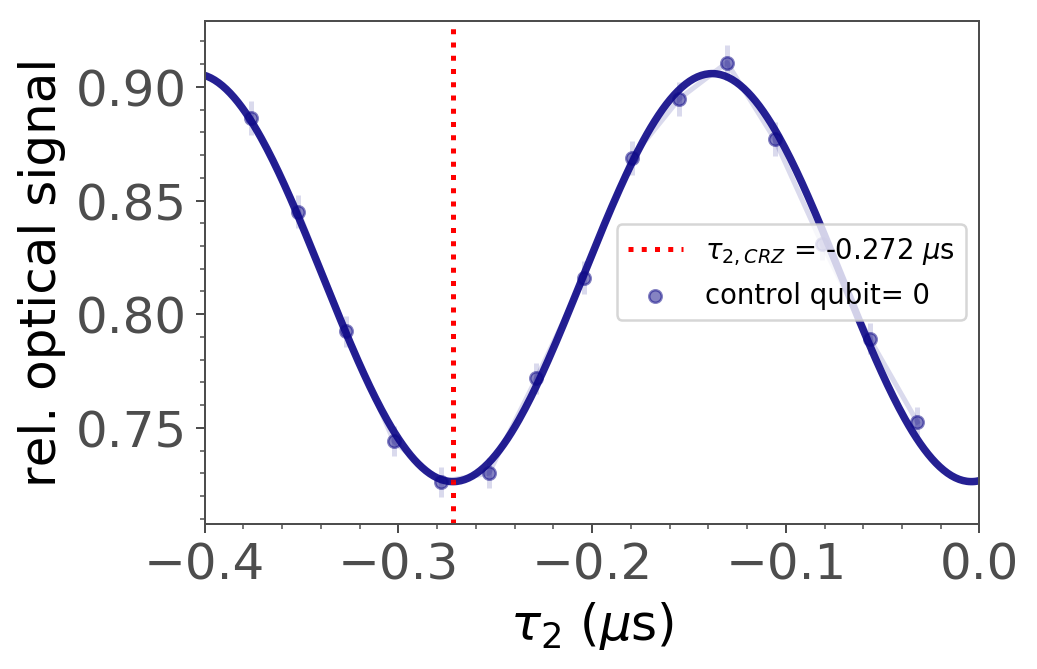

In [1175]:

plot_mode = "z1"
offset = 0.
smooth_data = False

x_unit = r"$\mu$s"
scale_fac_x = 1e6
scale_fac_y = 1 #0.5*1/ampl_delta_deer * contr_z1_deer/contr_z1_rabi 


labels = [f"control qubit= {control_qubit_state[0]}"]
for idx, mes in enumerate(p_raw):
    mes['plot_options'] = {'label': labels[idx]}

    
plot_multiple_1d(p_raw)

#"""
fig = plt.gcf()
tau_cnot = -212e-9
tau_cnot = -1/f_deer/(2*8)/4
tau_cnot = -272e-9
#tau_cnot = scale_fac_x*0.5*-212e-9

plt.axvline(scale_fac_x*tau_cnot, label=r'$\tau_{2,CRZ}$ ' + f'= {scale_fac_x*tau_cnot:.3f} {x_unit}',
            color='red', linestyle=":")
#plt.axhline(0, color='grey', alpha=0.5)

plt.xlabel(r'$\tau_2$' + f" ({x_unit})")
plt.ylabel(r'$\sigma_x$')
plt.ylabel(r'rel. optical signal')
plt.legend(loc='top right', prop={'size': 5}, ncol=1)

#plt.ylim([-0.5,0.5])
plt.xlim([-0.4,0])

plt.tight_layout()
plt.savefig(savepath + '/deer_sig_x.png', dpi=300)
plt.show()

0

# Post selected mes

Load multiple listfiles

In [10]:

def load_listfile_data(inpath, slice_files=None, incl_subdir=False):
    
    if slice_files == None:
        slice_files = slice(0,None,1)
    
    filter_strs = ['.lst']
    #filter_strs += ['rabi']

    n_data_bits = 28
    header_length = 74

    fnames = []
    try:
        fnames = Tk_file.list_mult_pulsed_mes(inpath, filter_strs=filter_strs, incl_subdir=incl_subdir)
        fnames = sorted(fnames, key=os.path.getctime) # todo: remove, oved to TK
    except:
        logger.exception("")
        
    logger.debug(f"Files to load: {[os.path.basename(f) for f in fnames]}")
    data_raw = []

    for idx_f, fname in enumerate(fnames[slice_files]):
        try:
            fname = os.path.abspath(fname)
            logger.debug(f"[{idx_f}] Loading list file: {fname}")
            res = qdyne_conventional_extraction(fname, all_counts=True, lines_to_read=None, # lines_to_read=int(40e6), # 5e5 
                                               headerlength=header_length, n_mask_bits=n_data_bits)


            res = set_hist_pdata(res)
            data_raw.append(res)
        except:
            logger.exception("")
            raise
        
    return data_raw


def extract_pmes_pcs(data_raw, n_threshs, t_orange=None, t_read=None, t_norm=None, idx_reference=None, taus=None):
    # extract a pulsed measurement of form PL vs tau from listfile(s)
    t_bin = 400e-12
    
    try:
        p_mess = []
        for n in n_threshs:
            # all arrival times per laser
            t_arrive = post_select(data_raw, t_red=t_orange, t_read=[t_read[0], None],
                            t_bin=t_bin, 
                            n_thresh=n)
            t_arrive_orange = post_select(data_raw, t_read=t_orange, n_thresh=0, t_bin=t_bin)
            t_arrive_orange = [item for sublist in t_arrive_orange for item in sublist] # flatten
            
            # arrival times per tau
            t_arrive_per_tau = collapse_single_lasers(t_arrive, n_taus=len(taus), alternating=True)

            # debug, from a single file
            #t_arrive_per_tau = collapse_single_lasers([t_arrive[1]], n_taus=n_taus, alternating=True)
            phots_sum = np.sum([len(tau) for tau in t_arrive_per_tau])
            phots_orange = np.sum([arr.size for arr in t_arrive_orange])

            # PL signal per tau
            pl = [t_arrive_2_spin_state(t_arr, 
                                          t_analyse=t_read,
                                          t_norm=t_norm,
                                          t_bin=t_bin) for t_arr in t_arrive_per_tau]
            #phots_orange = np.sum([t_arrive_2_phots(t_arr, 
            #                              t_window=t_orange,
            #                              t_bin=t_bin) for t_arr in t_arrive_per_tau])
            
            y_pl = [el[0] for el in pl]
            dy_pl = [el[1] for el in pl]
            infos = [el[2] for idx, el in enumerate(pl)]

            phot_info_dict = {'n_thresh':n, 'n_photons': phots_sum, 'photons_per_tau': infos,
                             'n_photons_orange': phots_orange}

            z1, z2 = np.asarray(y_pl[::2]), np.asarray(y_pl[1::2])
            dz1, dz2 = np.asarray(dy_pl[::2]), np.asarray(dy_pl[1::2])
            
            # todo: still need idx_reference here? Can also use during plotting
            if idx_reference == 0:
                ref = z1[0]-z2[0]
                z1,z2,dz1,dz2 = z1[1:]/ref, z2[1:]/ref, dz1[1:]/ref, dz2[1:]/ref # todo: check
                taus_i = taus[1:]
            else:
                taus_i = taus

            p_mes = {'data': {'z1': z1, 'z2': z2, 'tau': taus_i, 'dz1': dz1,  'dz2': dz2},
                     'infos': phot_info_dict}  # todo: proper tau


            p_mess.append(p_mes)
    except:
        logger.exception("")
    return p_mess


def extract_pmes_chunked(data_raw, n_threshs, taus, t_cinit_red, t_analyse, t_norm):

    # analyse every listfile in data_raw on it's own and append, if condition met
    func_accept_chunk = {'n_thresh': 9, '_func': lambda idx, z1, z2, infos: True}

    p_mess_chunks = []  # all chunks
    for idx, data in enumerate(data_raw):
        p_mess_i = extract_pmes_pcs(data, n_threshs,  taus=taus,
                     t_orange=t_cinit_red, t_read=t_analyse, t_norm=t_norm)

        use_chunk = False
        if func_accept_chunk != None:
            n_target = func_accept_chunk['n_thresh']
            for p_mes in p_mess_i:
                n_mes = p_mes['infos']['n_thresh']
                if n_target == n_mes:
                    z1, z2 = p_mes['data']['z1'], p_mes['data']['z2']
                    infos = p_mes['infos']
                    use_chunk = func_accept_chunk['_func'](idx, z1, z2, infos)

        [p_mes['infos'].update({'idx_chunk':  idx}) for p_mes in p_mess_i]
        [p_mes['infos'].update({'n_chunks' :len(data_raw)}) for p_mes in p_mess_i]
        [p_mes['infos'].update({'use_chunk' :use_chunk}) for p_mes in p_mess_i]

        p_mess_chunks.append(p_mess_i)
        
    return p_mess_chunks
0

0

In [32]:
0

0

## Post selected DEER

In [91]:
0

0

### Read_phase=0, sig_y (assymetric)

In [325]:
path = r"E:\Data\2023\05\20230517\deer_dd_psc_1"
path = r"E:\Data\2023\10\20231027\deer_dd_psc_1"
path = r"E:\Data\2023\11\20231107\deer_dd_0.5,0_phase=0_pcs_1"
#path = r"E:\Data\2023\11\20231110\deer_dd_pcs_phi=90_2"

# can get the extraction params from _pulsed_measurement.dat
t_analyze_green = 280e-9

t_cinit_red = [0.21e-3, 18.9e-3]
#t_analyse = [18.9758e-3, 18.9758e-3+t_analyze_green] # deer_dd
#t_norm = [t_analyse[0]+2e-6, t_analyse[1]+2.5e-6]
t_analyse = [0.0189473, 0.0189473 + t_analyze_green]
t_norm = [t_analyse[0]+2e-6, t_analyse[1]+2.5e-6]

n_threshs= list(range(0,12))


#taus = np.asarray([-4e-07, -3.7066666666666665e-07, -3.413333333333333e-07, -3.12e-07, -2.8266666666666666e-07, -2.5333333333333327e-07, -2.2399999999999997e-07, -1.9466666666666664e-07, -1.653333333333333e-07, -1.3599999999999995e-07, -1.0666666666666662e-07, -7.733333333333328e-08, -4.7999999999999953e-08, -1.8666666666666622e-08, 1.066666666666671e-08])
taus = np.asarray([-1.479e-06, -1.381e-06, -1.284e-06, -1.186e-06, -1.088e-06, -9.908e-07, -8.932e-07, -7.956e-07, -6.980e-07, -6.004e-07, -5.028e-07, -4.052e-07, -3.076e-07, -2.100e-07, -1.124e-07])
# with ref
taus = np.asarray([-4.21131624e-06, -1.47869250e-06, -1.38109879e-06, -1.28350509e-06, -1.18591139e-06, -1.08831768e-06, -9.90723975e-07, -8.93130270e-07, -7.95536565e-07, -6.97942860e-07, -6.00349155e-07, -5.02755450e-07, -4.05161745e-07, -3.07568040e-07, -2.09974335e-07, -1.12380630e-07])

try:
    data_raw_ps = load_listfile_data(inpath=path, incl_subdir=True) #, slice_files=slice(0,2,1))
except:
    logger.exception("")
    
len(data_raw_ps)

72

In [1907]:
[data_raw_ps[0]['debug_raw_data'][0:10]], [data_raw[0]['debug_raw_data'][0:10]]

([array([       0,    96166,  3898278, 19393456, 19682016, 47365538,
              0,    96117,   107540,  8437119])], [array([       0,    96166,  3898278, 19393456, 19682016, 47365538,
              0,    96117,   107540,  8437119])])

In [83]:
#n_threshs= [0,8,9]+
#n_threshs= list(range(0,12))
n_threshs= list(range(0,12))
taus = np.asarray([-4.21131624e-06, -1.47869250e-06, -1.38109879e-06, -1.28350509e-06, -1.18591139e-06, -1.08831768e-06, -9.90723975e-07, -8.93130270e-07, -7.95536565e-07, -6.97942860e-07, -6.00349155e-07, -5.02755450e-07, -4.05161745e-07, -3.07568040e-07, -2.09974335e-07, -1.12380630e-07])


idx_zref = 0 # None
taus, n_threshs




(array([-4.21131624e-06, -1.47869250e-06, -1.38109879e-06, -1.28350509e-06,
       -1.18591139e-06, -1.08831768e-06, -9.90723975e-07, -8.93130270e-07,
       -7.95536565e-07, -6.97942860e-07, -6.00349155e-07, -5.02755450e-07,
       -4.05161745e-07, -3.07568040e-07, -2.09974335e-07, -1.12380630e-07]), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [855]:
data_raw_ps = data_raw
# data_raw as loaded from other nv. Does it now yield the same better symetric results?
len(data_raw)

72

#### chunked analysis

Shouldn't be needed. Can be run in PostProcess_qudiplotter.ipynb. Then continue with a chunk index filter here.

In [332]:
len(data_raw_ps)

72

In [339]:
p_mess_chunks = extract_pmes_chunked(data_raw_ps, n_threshs, taus, t_cinit_red, t_analyse, t_norm) 


In [346]:
filter_chunks = True
p_mess_chunked = p_mess_chunks

if filter_chunks:
    idx_accept = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71]
    
    p_mess_chunked = [p for idx, p in enumerate(p_mess_chunks) if idx in idx_accept]
    
len(p_mess_chunked), len(p_mess_chunks)

(61, 72)

In [353]:
p_mess = []
try:
    for n_th in n_threshs:

        p_avg, p_all = avg_chunked_pmes(p_mess_chunked, n_thresh_idx=n_th)
        #p_avg = fit_avg_pmes(p_avg)
        p_mess.append(p_avg)
except:
    logger.exception("")
        
p_mess_per_folder = [{'file': data_raw_ps[0]['file'], 'p_mess': p_mess}]
len(p_mess)

12

#### normal anaylsis

In [1911]:
len(data_raw_ps)

72

In [1915]:
# Sum all photons first

p_mess = [] 
filter_chunks = True

if filter_chunks:
    chunks_accept_filter = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 17, 18, 19, 20, 21, 22, 23, 25, 26, 28, 29, 30, 31, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71]
    data_raw_ps_filtered = [d for idx,d in enumerate(data_raw_ps) if idx in chunks_accept_filter]
else:
    data_raw_ps_filtered = [d for idx,d in enumerate(data_raw_ps) if True]


try:
    p_mess = extract_pmes_pcs(data_raw_ps_filtered, n_threshs,  taus=taus,
                     t_orange=t_cinit_red, t_read=t_analyse, t_norm=t_norm)
except:
    logger.exception("")
    

p_mess_per_folder = [{'file': data_raw_ps[0]['file'], 'p_mess': p_mess}]

len(data_raw_ps_filtered), len(p_mess)

(61, 12)

In [1851]:
len(data_raw_ps_filtered), len(p_mess)

(60, 12)

In [1747]:
# SLICE only every dataset
raise # do you really want to do this?
mask_idxs = [0]

try:
    for p_idx in p_mess_per_folder:
        for p in p_idx['p_mess']:
            p_new = pd.DataFrame(p['data'])
            p['data'] = p_new.drop(mask_idxs)
except:
    logger.exception("")
    
0

0

#### norm + plot

In [360]:
# NORM every post selected pulsed result (in all folders)

idx_zref = 0
mask_idxs = [0]

try:
    for p_idx in p_mess_per_folder:
        for p in p_idx['p_mess']:
            p_norm = norm_on_delta(p['data'], idx_zref=0, mask_idxs=[0])
            p['data'] = p_norm
except:
    logger.exception("")
    
0

0

In [367]:
# load pulsed result files that correspond to the listfiles laded above

fname_p = r"E:\Data\2023\10\20231027\deer_dd_psc_1"  + "\\" \
            + r"20231027-0840-41_deer_dd_XY8-1_init=0.5_0.0_read=0.5,0.0_readph=0_fci_pulsed_measurement.dat"

    
paths_pulsed = [fname_p]

p_datas = []
for fname in paths_pulsed:

    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
    
    p_datas.append(cp.deepcopy(p_data))
    
len(p_datas)

1

In [381]:
# take meta data from 'normal' pulsed result
# get data from post selected list files

idx_nthresh = 9

try:
    for idx, p in enumerate(p_mess_per_folder):
        p_mess_i = p['p_mess']
        
        
        p_inject = cp.deepcopy(p_mess_i[idx_nthresh])

        #p_inject['data'].pop('delta_norm', None)  # todo: probably only needed, if no z_ref
        p_inject['data']['std1'] = p_inject['data']['dz1']
        p_inject['data']['std2'] = p_inject['data']['dz2']

        p_inject['data'] = pd.DataFrame(p_inject['data'])
        
        p.update({'data_pcs_inject': p_inject})
        # make p_mess fitable
        for jdx, n in enumerate(n_threshs):
            p_mess_i[jdx].update({'file': p_datas[idx]['file']})
            p_mess_i[jdx].update({'date': p_datas[idx]['date']})
        
    # inject into every p_data
    for idx, p in enumerate(p_datas):
        p_inject = p_mess_per_folder[idx]['data_pcs_inject']
        p_datas[idx]['data'] = p_inject['data']
        #p['exp_params']['rotations'] = p_inject['exp_params']['rotations']

except:
    logger.exception("")

f"{len(p_datas)}, n_thresh= {n_threshs[idx_nthresh]}"

'1, n_thresh= 9'

In [388]:
# Perform fit
# ATTENTION: Fix lifetime=1 and frequency = 960 kHz (from non-pcs DEER)

y_val_idx = 1
x_val = "Time"
x_unit = "s"
scale_fac_x = [1]
scale_fac_y = [1e9, 1e-6, 1e-6]
fit_on = 'delta'
fit_meth = 'sine'
fit_vals = ['Period', 'Position 1', 'None']
fit_units = ['ns','MHz', 'MHz']
fit_settings = {'fit_range': np.linspace(-2e-6, 1e-6, 1000)}
#fit_settings = {}
calc_dxdy_fromto = [False, False, False]
#"""



f_deer_expect = 0.958e6  # from non-pcs deer_y
#f_deer_expect = 0.910e6  
phi_deer_expect = 4.834
phi_deer_expect = 5.14418
f_deer_fix = False
phi_deer_fix = False


if fit_settings:
    for mes in p_datas:
        mes['fit_settings'] = fit_settings

        mes['fit_edit_params'] = [lmfit.Parameter('offset', value=0, vary=True),
                lmfit.Parameter('amplitude', value=0.7, min=10e-3, max=2, vary=True),
                lmfit.Parameter('frequency', value=f_deer_expect, min=0, max=2*f_deer_expect, vary=not f_deer_fix),
                lmfit.Parameter('beta', value=1, vary=False),
                lmfit.Parameter('lifetime', value=np.inf, vary=False),
                lmfit.Parameter('phase', value=phi_deer_expect, vary=not phi_deer_fix)]



try:
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_datas, 
                                            fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                            idx_var_x=y_val_idx, ordered_x=True)
    
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_mess_per_folder[0]['p_mess'], 
                                        fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                        idx_var_x=None, ordered_x=False)
except:
    logger.exception("")

0

0

In [1939]:
ampl_i = p_datas[0]['fit_res']['amplitude'].value
off_i = p_datas[0]['fit_res']['offset'].value

off_i/ampl_i

-0.13053021010623553

In [409]:

plot_mode = "delta"
offset = 0.
smooth_data = False

x_unit = r"$\mu$s"
#scale_fac_x = -2*16*1e6
#scale_fac_y = 0.5*1/0.08*7.62/15.7

scale_fac_x = -2*8*1e6
#scale_fac_x = 1
# if normed on first datapoint, make sure that full contrast axis= [-0.5, 0.5] 
scale_fac_y = 1   #1 #0.5*1/ampl_delta_deer * contr_z1_deer/contr_z1_rabi 

try:

    labels = [r'control qubit= $| 0 \rangle$, $n_{thresh}=$'+f"{n_threshs[idx_nthresh]}",
              r'control qubit= $|1 \rangle$']
    for idx, mes in enumerate(p_datas):
        mes['plot_options'] = {'label': labels[idx]}

    plt.figure(figsize=(0.9*3, 0.9*2/3*3.5))   
    plot_multiple_1d(p_datas, n_datas=0.1, plot_err=True,  # use n_datas to manipulse color cycle
                     scale_fac_x=scale_fac_x, scale_fac_y=scale_fac_y,
                     color=plt_settings.color('blue'))   

    #tau_cnot = 2*scale_fac_x*-272e-9
    #tau_cnot = -1/f_deer/(2*8)/4
    #tau_cnot = -272e-9

    #plt.axvline(2*scale_fac_x*tau_cnot, label=r'2 $t_{CPhase}$ ' + f'= {2*scale_fac_x*tau_cnot:.2f} {x_unit}',
    #            color=plt_settings.color('red'), linestyle=":")
    plt.axhline(0, color='grey', alpha=0.5)

    plt.legend(loc='upper right', prop={'size': 5}, ncol=1)
    #plt.legend(prop={'size': 11})
    plt.ylim([-1.25, 1.25])
    plt.xlim([-2e-6,0])
    plt.xlim([0,25])
    
    #plt.grid()
    plt.ylabel(r'$\langle \sigma_y \rangle_{NV1}$')

    plt_settings.savefig('deer_sig_y_pcs.png')
    #plt.savefig(plt_settings.get_savepath('deer_sig_x_pcs.png'), dpi=300)
    plt.show()

except:
    logger.exception("")
0

0

In [431]:
plt_settings.color('red')

(0.6392156862745098, 0.14901960784313725, 0.2196078431372549, 1.0)

In [1091]:
ampl_i = p_datas[0]['fit_res']['amplitude'].value
off_i = p_datas[0]['fit_res']['offset'].value

off_i/ampl_i

-0.22089743512517832

In [1772]:
plt.figure()
plt.savefig(plt_settings.get_savepath('deer_sig_y_pcs.png'), dpi=300)

#### Assymetry vs n_thresh

In [1947]:

fit_on = 'delta'

p_mess = p_mess_per_folder[0]['p_mess']

try:

    ns = len(n_threshs)
    
    y0, y1 = [],[]
    dy0, dy1 = [],[]
    
    for idx, n in enumerate(n_threshs):
        p_mes = p_mess[idx]
        
        # Calculate metric
        if fit_on is not None:
            off_i, doff_i = p_mes['fit_res']['Offset']['value'], p_mes['fit_res']['Offset']['error']
            ampl_i, dampl_i = p_mes['fit_res']['Amplitude']['value'], p_mes['fit_res']['Amplitude']['error']
            doffampl_i = abs(off_i/ampl_i*np.sqrt((doff_i/off_i)**2 + (dampl_i/ampl_i)**2))
            #doffampl_i = 0
            #lifetime_i, dlifetime_i = p_mes['fit_res']['Lifetime']['value'], p_mes['fit_res']['Lifetime']['error']
        
            y0.append(abs(off_i/ampl_i))
            #y0.append(off_i)
            dy0.append(doffampl_i)
            y1.append(ampl_i)
            dy1.append(dampl_i)
        
        else:
            #y0.append(0)
            #dy0.append(0)
            y1.append(0)
            dy1.append(0)
            
            y0.append(delta[1])
            dy0.append(ddelta[1])

     # assymetry
    plt.figure(figsize=(1.7, 2.7/3*2/3*3.5)) 
   
    
    color = plt_settings.color('blue')
    marker_style = plt_settings.marker_style(color, is_scatter=True)
    marker_err_style = plt_settings.marker_style(color, is_scatter=False, is_err=True)

    plt.errorbar(n_threshs, y0, dy0, alpha=0.5,
                **marker_err_style)
    plt.scatter(n_threshs, y0, alpha=1, **marker_style)
    
    plt.axhline(0, color='grey', alpha=0.5)
    #plt.ylim([-0.2, 0.75 ])
    #plt.grid()
    
    plt.xlabel(r"Post selection $n_{thresh}$")
    plt.ylabel("Sine fit assymetry")

    plt_settings.savefig('deer_pcs_fits_vs_nthresh.png')

    # Amplitude
    plt.figure(figsize=(1.7, 2.7/3*2/3*3.5))     
    
    plt.errorbar(n_threshs, y1, dy1, alpha=0.5,
                **marker_err_style)
    plt.scatter(n_threshs, y1, alpha=1, **marker_style)
    
    plt.axhline(0, color='grey', alpha=0.5)
    #plt.ylim([-0.2, 0.75 ])
    #plt.grid()
    
    plt.xlabel(r"Post selection $n_{thresh}$")
    plt.ylabel("Sine fit amplitude")

    plt_settings.savefig('deer_pcs_ampls_vs_nthresh.png')
except:
    logger.exception("")
        

0

0

In [2042]:
y0

[0.6995752982248792, 0.6804536339802393, 0.6491308479552745, 0.5979121437514082, 0.5006718990102915, 0.339378881731727, 0.25657039669223225, 0.19679959026560562, 0.27090574876634044, 0.2157745918224242, 0.14320320193611355, 0.006595404512507199]

OLD
About scale_y:
    - with readout window of 400 ns
    - data 20230609 deer_dd: Contrast on z1 of 7.2+- 1.2 % => ampl on delta=  67m 
    - data 20230609 rabi_A: Contrast of z1 of 15.7 +- 0.4 %, rabi_B: z1 of 13.6 +- 0.6 %.
    - data psc_1: amplitude for n_thresh=12: 0.134
    - we have to assume (never measured) the Rabi contrast of a charge init Rabi.
    For a charge init F= 100% and a singleNV norml F= 70%, the contrast increase would be 1.43x.
    So we take as a reference Rabi contrast the measured joint contrast of 1.43x(15.7+13.6)= 41.9 %. With the above (linear) relation between ampl_delta and contrast on z1:
    - ampl_delta of 133.8m = 14.38 % contrast. => For y_scale we first norm the maximum datapoint to sigma=0.5 Then we apply the normalization onto y_scale= 14.38/41.9
    
About scale_tau:
    - In experiment: we vary tau2 from center auf pi pulses on tau1.
    - For the reader, it's simpler to do effective evolution time. For the most negative tau in a deer_dd experiment, this corresponds to maximum effective evolution over 2x abs(tau), since our tau=0 is the center.
    - Thus for deer_dd_tau measurements with only negative tau axis, we can just multiply -2 to the axis. Then, the decoupling order is added.
    - ATTENTION: The rabi frequencies changed compared to the (green only) DEER measurements 20230609. Also dd_order is 2 vs 4. I thus rescaled here the tau axis by an additional emperical factor 0.7x
    
About deer_f:
    - In pcs_1 data, frequency is : 3.33 MHz. x(-2)*32= 53.5 kHz. Mind the rescaling.

In [887]:
# OLD, manual plotting for different n_thresh
#raise OLD
p_mess = p_mess_per_folder[0]['p_mess']

idx_reference = None
fit_again_meth = 'sine'#'decay_exp'
fit_on = None #'delta'

f_deer_expect = 1e6

try:
    scale_tau = -0.7*  2*32*1e6
    scale_y = 1/0.2*0.5*14.38/41.9
    
    #taus = abs(taus[::-1])
    ns = len(n_threshs)
    plt.figure(figsize=(12,4*ns))
    
    color = plt.cm.plasma(0)
    
    y0, dy0 = [],[]
    y1, dy1 = [], []
    n_plot_cols = 2 if idx_reference==None else 3
    n_plot_cols = 1
    
    for idx, n in enumerate(n_threshs):
        p_mes = p_mess[idx]
        
        z1, z2 = scale_y*p_mess[idx]['data']['z1'], scale_y*p_mess[idx]['data']['z2']
        delta = z1 - z2
        dz1, dz2 = scale_y*p_mess[idx]['data']['dz1'], scale_y*p_mess[idx]['data']['dz2']
        ddelta = np.sqrt(dz1**2+dz2**2)
        z_normed = (z1-z2)/(z1-z2)[idx_reference]
        p_mess[idx]['data']['delta_norm'] = z_normed 
        
        # another fit here (faster than above)
        if fit_again_meth == 'decay_exp':
            p_mes['fit_edit_params'] = [lmfit.Parameter('offset', value=0, vary=False),
                        lmfit.Parameter('amplitude', value=0.1, min=0, max=1, vary=True),
                        lmfit.Parameter('lifetime', value=1, min=0.2, max=10, vary=True)]
            #p_mes['fit_edit_params'] = None
            fit_settings = {}
            if idx_reference==0:
                fit_settings = {'slice_data': slice(1,None)}
        elif fit_again_meth == 'sine':
            fit_settings = {}
            p_mes['fit_edit_params'] = [lmfit.Parameter('offset', value=0, vary=True),
                            lmfit.Parameter('amplitude', value=0.1, min=10e-3, max=1, vary=True),
                            lmfit.Parameter('frequency', value=f_deer_expect, min=0, max=2*f_deer_expect, vary=False),
                            lmfit.Parameter('beta', value=1, vary=False),
                            lmfit.Parameter('lifetime', value=np.inf, vary=False)]
 
        
        if fit_again_meth != None:
            fit_on = 'delta_norm' if idx_reference==0 else 'delta' 
            do_fit(p_mes, fit_y=fit_on, fit_method=fit_again_meth,
                   edit_params=p_mes['fit_edit_params'], settings=fit_settings)
        
        
        # plot data

        
        # Calculate metric
        x_fit, y_fit = None, None
        if fit_on is not None:
            x_fit, y_fit = p_mes['fit_values']['x'], scale_y*p_mes['fit_values']['y']
        
        
            off_i, doff_i = p_mes['fit_res']['Offset']['value'], p_mes['fit_res']['Offset']['error']
            ampl_i, dampl_i = p_mes['fit_res']['Amplitude']['value'], p_mes['fit_res']['Amplitude']['error']
            doffampl_i = abs(off_i/ampl_i*np.sqrt((doff_i/off_i)**2 + (dampl_i/ampl_i)**2))
            #doffampl_i = 0
            #lifetime_i, dlifetime_i = p_mes['fit_res']['Lifetime']['value'], p_mes['fit_res']['Lifetime']['error']
        
            y0.append(off_i/ampl_i)
            dy0.append(doffampl_i)
            y1.append(ampl_i)
            dy1.append(dampl_i)
        
            #y0.append(ampl_i)
            #dy0.append(dampl_i)
            #y1.append(lifetime_i)
            #dy1.append(dlifetime_i)

            #y0.append(np.sum(z_normed[1::2])-np.sum(z_normed[2::2]))
            #y0.append((z1-z2)[0])
            #dy0.append(0)
            #dy0.append(np.sqrt(2)*ddelta[0])
            #y0.append(np.sum(z_normed[2::2]))
        else:
            #y0.append(0)
            #dy0.append(0)
            y1.append(0)
            dy1.append(0)
            
            y0.append(delta[1])
            dy0.append(ddelta[1])

        n_phots = p_mes['infos']['n_photons']
        n_phots_ref = p_mess[0]['infos']['n_photons']
        
        if n_plot_cols > 1:
            plt.subplot(ns,n_plot_cols,(n_plot_cols*idx)+1)

            plt.gca().set_title(f"n_thresh= {n}, phots= {100*n_phots/n_phots_ref:.1f}%")
            plt.plot(scale_tau*taus, z1, marker='o', linestyle=':', color=color, alpha=0.35)
            plt.plot(scale_tau*taus, z2, marker='o', linestyle=':', color='green', alpha=0.35)
            plt.scatter(scale_tau*taus, z1, marker='o', s=15, color=color, alpha=0.9) #line
            plt.scatter(scale_tau*taus, z2, marker='o', s=15, color='green', alpha=0.9) #line
            plt.errorbar(scale_tau*taus, z1, yerr=dz1, linestyle='', color=color, alpha=0.4)
            plt.errorbar(scale_tau*taus, z2, yerr=dz2, linestyle='', color='green', alpha=0.4)
            plt.grid()
            #plt.xlabel(r"$t$ (ns)")
            #plt.xlabel("reps ()")
            plt.xlabel(r"$t_{evol}$ ($\mu$s)")
            #plt.xlabel(r"$\tau$ (ns)")
        
        plt.subplot(ns,n_plot_cols,(n_plot_cols*idx+1)+1)
        if fit_on == 'delta':
            if x_fit is not None:
                plt.plot(scale_tau*x_fit, y_fit,  color='orange', linewidth=3, alpha=0.9)#, label=f'off/ampl= {off_i/ampl_i:.2f} +- {doffampl_i:.2f}')

        
        plt.plot(scale_tau*taus, delta, marker='', linestyle=':', color=color, alpha=0.35) #linestyle=':',
        plt.scatter(scale_tau*taus, delta, marker='o', s=15, color=color, alpha=0.9) #linestyle=':',
        plt.errorbar(scale_tau*taus, delta, yerr=ddelta, marker='', linestyle='', color=color, alpha=0.4)
        
        
        plt.legend()
        plt.grid()
        plt.xlabel(r"$t_{evol}$ ($\mu$s)")
        #plt.xlabel(r"$\tau$ (ns)")
        #plt.xlabel("reps ()")
        #plt.ylabel("z1-z2")
        plt.ylabel(r"$\sigma_y$")
        
        if idx_reference != None:
            plt.subplot(ns,n_plot_cols,(n_plot_cols*idx+1)+2)
            
            #plt.plot(scale_tau*x_fit, y_fit,  color='orange')#, label=f'off/ampl= {off_i/ampl_i:.2f} +- {doffampl_i:.2f}')
            plt.plot(scale_tau*taus, z_normed, marker='o', linestyle=':', color=color, alpha=0.35)
            plt.scatter(scale_tau*taus, z_normed,  marker='o', s=15, color=color, alpha=0.9)
            plt.errorbar(scale_tau*taus, z_normed, yerr=ddelta/(z1-z2)*z_normed, linestyle='', color=color, alpha=0.4)
            if fit_on == 'delta_norm':
                if x_fit is not None:
                    plt.plot(scale_tau*x_fit, y_fit,  color='orange', linewidth=3, alpha=0.9)#, label=f'off/ampl= {off_i/ampl_i:.2f} +- {doffampl_i:.2f}')

            plt.legend()
            plt.grid()
            plt.xlabel("tau (us)")
            plt.xlabel("reps ()")
            plt.ylabel("delta_norm")

    plt.tight_layout()
    plt.savefig(plt_settings.get_savepath('deer_pcs.png'), dpi=300)
    plt.show()

    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.grid()
    plt.errorbar(n_threshs, y0, dy0, color=color, alpha=0.15)
    plt.scatter(n_threshs, y0, color=color, alpha=1)
    #plt.ylim([-4,1])
    #plt.ylim([-0.1,0.25])
    #plt.ylim([-0.2, 0.4])
    plt.xlabel(r"$n_{thresh}$")
    plt.ylabel("offset/amplitude")
    #plt.ylabel("z1-z2")
    #plt.ylabel("z[0]-z[1]")
    #plt.ylabel("delta[1]")
    #plt.ylabel("amplitude")
    #plt.title("Dip depth (sum z[0::2]-z[1::2])")
    #plt.title("Contrast (sum z[0::2])")


    plt.subplot(122)
    plt.errorbar(n_threshs, y1, dy1, color=color, alpha=0.15)
    plt.scatter(n_threshs, y1, color=color, alpha=1)
    plt.xlabel(r"$n_{thresh}$")
    plt.ylabel("amplitude")
    #plt.ylabel("Lifetime")
    #plt.ylim([0,20])

except:
    logger.exception("")
        


plt.figure(figsize=(4,5))
plt.subplot(211)
plt.errorbar(n_threshs, y0, dy0, color=color, alpha=0.15)
plt.scatter(n_threshs, y0, color=color, alpha=1)
plt.ylim([-1,0.5])
plt.xlabel(r"$n_{thresh}$")
plt.ylabel("offset/amplitude")
#plt.title("Dip depth (sum z[0::2]-z[1::2])")
#plt.title("Contrast (sum z[0::2])")


plt.subplot(212)
plt.errorbar(n_threshs, y1, dy1, color=color, alpha=0.15)
plt.scatter(n_threshs, y1, color=color, alpha=1)
plt.xlabel(r"$n_{thresh}$")
plt.ylabel("amplitude")
#plt.ylim([0,0.2])

plt.tight_layout()
plt.savefig(plt_settings.get_savepath('deer_pcs_ampl_vs_nthresh.png'), dpi=300)
plt.show()

0

### Read_phase=90, sig_x (symmetric)

In [17]:
path = r"E:\Data\2023\11\20231110\deer_dd_pcs_phi=90_2"

# can get the extraction params from _pulsed_measurement.dat
t_analyze_green = 300e-9

t_cinit_red = [0.21e-3, 18.9e-3]
#t_analyse = [18.9758e-3, 18.9758e-3+t_analyze_green] # deer_dd
#t_norm = [t_analyse[0]+2e-6, t_analyse[1]+2.5e-6]
t_analyse = [0.0189473, 0.0189473 + t_analyze_green]
t_norm = [t_analyse[0]+2e-6, t_analyse[1]+2.5e-6]

n_threshs= list(range(0,12))


#taus = np.asarray([-4e-07, -3.7066666666666665e-07, -3.413333333333333e-07, -3.12e-07, -2.8266666666666666e-07, -2.5333333333333327e-07, -2.2399999999999997e-07, -1.9466666666666664e-07, -1.653333333333333e-07, -1.3599999999999995e-07, -1.0666666666666662e-07, -7.733333333333328e-08, -4.7999999999999953e-08, -1.8666666666666622e-08, 1.066666666666671e-08])
taus = np.asarray([-1.479e-06, -1.381e-06, -1.284e-06, -1.186e-06, -1.088e-06, -9.908e-07, -8.932e-07, -7.956e-07, -6.980e-07, -6.004e-07, -5.028e-07, -4.052e-07, -3.076e-07, -2.100e-07, -1.124e-07])
# with ref
taus = np.asarray([-4.21131624e-06, -1.47869250e-06, -1.38109879e-06, -1.28350509e-06, -1.18591139e-06, -1.08831768e-06, -9.90723975e-07, -8.93130270e-07, -7.95536565e-07, -6.97942860e-07, -6.00349155e-07, -5.02755450e-07, -4.05161745e-07, -3.07568040e-07, -2.09974335e-07, -1.12380630e-07])

try:
    data_raw_ps = load_listfile_data(inpath=path, incl_subdir=True) #, slice_files=slice(0,2,1))
except:
    logger.exception("")
    
len(data_raw_ps)

72

In [199]:
len(data_raw_ps)

72

In [206]:
p_mess_chunks = extract_pmes_chunked(data_raw_ps, n_threshs, taus, t_cinit_red, t_analyse, t_norm) 


In [213]:
filter_chunks = True
p_mess_chunked = p_mess_chunks

if filter_chunks:
    chunks_accept_filter = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
  
    p_mess_chunked = [p for idx, p in enumerate(p_mess_chunks) if idx in chunks_accept_filter]
    
len(p_mess_chunked), len(p_mess_chunks)

(69, 72)

In [220]:
p_mess = []

try:
    for n_th in n_threshs:

        p_avg, p_all = avg_chunked_pmes(p_mess_chunked, n_thresh_idx=n_th)
        #p_avg = fit_avg_pmes(p_avg)
        p_mess.append(p_avg)
except:
    logger.exception("")
        
p_mess_per_folder = [{'file': data_raw_ps[0]['file'], 'p_mess': p_mess}]
len(p_mess)

12

In [24]:
# Normal analysis: Sum all photons first, exclude bad chunks

raise # Use chunked analysis

p_mess = [] 
filter_chunks = True

if filter_chunks:
    chunks_accept_filter = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]
    data_raw_ps_filtered = [d for idx,d in enumerate(data_raw_ps) if idx in chunks_accept_filter]
else:
    data_raw_ps_filtered = [d for idx,d in enumerate(data_raw_ps) if True]


try:
    p_mess = extract_pmes_pcs(data_raw_ps_filtered, n_threshs,  taus=taus,
                     t_orange=t_cinit_red, t_read=t_analyse, t_norm=t_norm)
except:
    logger.exception("")
    

p_mess_per_folder = [{'file': data_raw_ps[0]['file'], 'p_mess': p_mess}]

len(data_raw_ps_filtered), len(p_mess)

In [185]:
len(p_mess_per_folder)

1

In [227]:
# NORM every post selected pulsed result (in all folders)

idx_zref = 0
mask_idxs = [0]

try:
    for p_idx in p_mess_per_folder:
        for p in p_idx['p_mess']:
            p_norm = norm_on_delta(p['data'], idx_zref=0, mask_idxs=[0])
            p['data'] = p_norm
except:
    logger.exception("")
    
0

0

In [234]:
# load pulsed result files that correspond to the listfiles laded above

fname_p = r"E:\Data\2023\10\20231027\deer_dd_psc_1"  + "\\" \
            + r"20231027-0840-41_deer_dd_XY8-1_init=0.5_0.0_read=0.5,0.0_readph=0_fci_pulsed_measurement.dat"

    
paths_pulsed = [fname_p]

p_datas = []
for fname in paths_pulsed:

    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
    
    p_datas.append(cp.deepcopy(p_data))
    
len(p_datas)

1

In [304]:
# take meta data from 'normal' pulsed result
# get data from post selected list files

idx_nthresh = 8

try:
    for idx, p in enumerate(p_mess_per_folder):
        p_mess_i = p['p_mess']
        
        
        p_inject = cp.deepcopy(p_mess_i[idx_nthresh])

        #p_inject['data'].pop('delta_norm', None)  # todo: probably only needed, if no z_ref
        p_inject['data']['std1'] = p_inject['data']['dz1']
        p_inject['data']['std2'] = p_inject['data']['dz2']

        p_inject['data'] = pd.DataFrame(p_inject['data'])
        
        p.update({'data_pcs_inject': p_inject})
        # make p_mess fitable
        for jdx, n in enumerate(n_threshs):
            p_mess_i[jdx].update({'file': p_datas[idx]['file']})
            p_mess_i[jdx].update({'date': p_datas[idx]['date']})
        
    # inject into every p_data
    for idx, p in enumerate(p_datas):
        p_inject = p_mess_per_folder[idx]['data_pcs_inject']
        p_datas[idx]['data'] = p_inject['data']
        #p['exp_params']['rotations'] = p_inject['exp_params']['rotations']

except:
    logger.exception("")

f"{len(p_datas)}, n_thresh= {n_threshs[idx_nthresh]}"

'1, n_thresh= 8'

In [311]:
# Perform fit
# ATTENTION: Fix lifetime=1 and frequency = 960 kHz (from non-pcs DEER)

y_val_idx = 1
x_val = "Time"
x_unit = "s"
scale_fac_x = [1]
scale_fac_y = [1e9, 1e-6, 1e-6]
fit_on = 'delta'
fit_meth = 'sine'
fit_vals = ['Period', 'Position 1', 'None']
fit_units = ['ns','MHz', 'MHz']
fit_settings = {'fit_range': np.linspace(-2e-6, 1e-6, 1000)}
#fit_settings = {}
calc_dxdy_fromto = [False, False, False]
#"""



f_deer_expect = 0.958e6  # from non-pcs deer_y
#f_deer_expect = 0.910e6  
phi_deer_expect = 4.834
phi_deer_expect = 5.14418
f_deer_fix = False
phi_deer_fix = False


if fit_settings:
    for mes in p_datas:
        mes['fit_settings'] = fit_settings

        mes['fit_edit_params'] = [lmfit.Parameter('offset', value=0, vary=True),
                lmfit.Parameter('amplitude', value=0.7, min=10e-3, max=2, vary=True),
                lmfit.Parameter('frequency', value=f_deer_expect, min=0, max=2*f_deer_expect, vary=not f_deer_fix),
                lmfit.Parameter('beta', value=1, vary=False),
                lmfit.Parameter('lifetime', value=np.inf, vary=False),
                lmfit.Parameter('phase', value=phi_deer_expect, vary=not phi_deer_fix)]



try:
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_datas, 
                                            fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                            idx_var_x=y_val_idx, ordered_x=True)
    
    x, y, y2, y3, dy = pulsed_series_2_1d_fit_array(p_mess_per_folder[0]['p_mess'], 
                                        fit_meth=fit_meth, fit_on=fit_on, fit_vals=fit_vals,
                                        idx_var_x=None, ordered_x=False)
except:
    logger.exception("")

0

0

In [318]:

plot_mode = "delta"
offset = 0.
smooth_data = False

x_unit = r"$\mu$s"
#scale_fac_x = -2*16*1e6
#scale_fac_y = 0.5*1/0.08*7.62/15.7

scale_fac_x = -2*8*1e6
#scale_fac_x = 1
# if normed on first datapoint, make sure that full contrast axis= [-0.5, 0.5] 
scale_fac_y = 1   #1 #0.5*1/ampl_delta_deer * contr_z1_deer/contr_z1_rabi 

try:

    labels = [r'control qubit= $| 0 \rangle$, $n_{thresh}=$'+f"{n_threshs[idx_nthresh]}",
              r'control qubit= $|1 \rangle$']
    for idx, mes in enumerate(p_datas):
        mes['plot_options'] = {'label': labels[idx]}

    plt.figure(figsize=(0.9*3, 0.9*2/3*3.5))   
    plot_multiple_1d(p_datas, n_datas=0.1, plot_err=True,  # use n_datas to manipulse color cycle
                     scale_fac_x=scale_fac_x, scale_fac_y=scale_fac_y,
                     color=plt_settings.color('blue'))   

    #tau_cnot = 2*scale_fac_x*-272e-9
    #tau_cnot = -1/f_deer/(2*8)/4
    #tau_cnot = -272e-9

    #plt.axvline(2*scale_fac_x*tau_cnot, label=r'2 $t_{CPhase}$ ' + f'= {2*scale_fac_x*tau_cnot:.2f} {x_unit}',
    #            color=plt_settings.color('red'), linestyle=":")
    plt.axhline(0, color='grey', alpha=0.5)

    plt.legend(loc='upper right', prop={'size': 5}, ncol=1)
    #plt.legend(prop={'size': 11})
    plt.ylim([-1.25, 1.25])
    plt.xlim([-2e-6,0])
    plt.xlim([0,25])
    
    #plt.grid()
    plt.ylabel(r'$\langle \sigma_x \rangle_{NV1}$')

    plt_settings.savefig('deer_sig_x_pcs.png')
    plt.show()

except:
    logger.exception("")
0

0

## Post selected nrep cphase

In [260]:
# load listfiles (mind same order as pulsed results below!)
paths = [r"E:\Data\2023\10\20231028\nrep_cphase_group=2_3",
         r"E:\Data\2023\10\20231027\nrep_cphase_group=3_2",
         r"E:\Data\2023\11\20231113\nrep_cphase_group=1_4"]

n_threshs= list(range(0,12))

# can get the extraction params from _pulsed_measurement.dat
t_analyze_green = 280e-9

#t_cinit_red = [0.14e-3, 18.9e-3]
#t_analyse = [19.02435e-3, 19.02435e-3 + t_analyze_green] # nrep 
#t_norm = [t_analyse[0]+1.5e-6, t_analyse[1]+2.5e-6]

t_cinit_red = [0.21e-3, 18.9e-3]
#t_analyse = [18.9758e-3, 18.9758e-3+t_analyze_green] # deer_dd
t_analyse = [19.10133e-3, 19.10133e-3+t_analyze_green] # nrep_cphase
t_norm = [t_analyse[0]+2e-6, t_analyse[1]+2.5e-6]


#taus = np.asarray([0, 2, 4, 6, 10])
taus = np.arange(0,32,2)


datas_raw = []

for path in paths:
    data_raw = load_listfile_data(inpath=path, incl_subdir=True) #, slice_files=slice(0,50,1))   # slice for faster, fewer data
    datas_raw.append(cp.deepcopy(data_raw))
    
[len(d) for d in datas_raw], taus, f"n_tresh= {n_threshs}"

In [263]:
[len(d) for d in datas_raw], taus, f"n_tresh= {n_threshs}"

([99, 58, 46], array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'n_tresh= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]')

In [266]:
#n_threshs = [0,9,10,11]
n_threshs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [269]:
# perform post selection (slow!)
p_mess_per_folder = []

chunk_acc_filters = [None, 
                    [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 26, 27, 28, 29, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 49, 50, 51, 52, 53, 54, 57],
                    None]

try:
    for idx, data in enumerate(datas_raw):
        p_mess = [] 
        file = data[0]['file']
        
        data_filtered = [d for idx,d in enumerate(data) if True]
        if chunk_acc_filters[idx] is not None:
            data_filtered = [d for jdx,d in enumerate(data) if jdx in chunk_acc_filters[idx]]
               
        p_mess = extract_pmes_pcs(data_filtered, n_threshs, 
                         t_orange=t_cinit_red, t_read=t_analyse, t_norm=t_norm, taus=taus)

        p_mess_per_folder.append({'file': file, 'p_mess': p_mess})

except:
    logger.exception("")
len(p_mess)

12

In [272]:
len(datas_raw)

3

In [455]:
# load pulsed result files that correspond to the listfiles laded above

fname_group_2 = r"E:\Data\2023\10\20231028\nrep_cphase_group=2_3\nrep_cphase_group=2_continued_4"  + "\\" \
            + r"20231103-1409-02_rand_benchmark_pulsed_measurement.dat"
fname_group_3 = r"E:\Data\2023\10\20231027\nrep_cphase_group=3_2" + "\\" \
            + r"20231028-1925-27_rand_benchmark_pulsed_measurement.dat"
fname_group_1 = r"E:\Data\2023\11\20231113\nrep_cphase_group=1_4" + "\\" \
            + r"20231115-1427-02_rand_benchmark_pulsed_measurement.dat"
    
    

    
paths_pulsed = [fname_group_2, fname_group_3, fname_group_1]
#paths_pulsed = [fname_group_3]


p_datas = []
for fname in paths_pulsed:

    fname = os.path.normpath(fname)
    p_data = Tk_file.load_pulsed_result(fname)
    
    p_datas.append(cp.deepcopy(p_data))
    
len(p_datas)

3

In [458]:
# take meta data from 'normal' pulsed result
# get data from post selected list files

idx_nthresh = [9,8,5]

try:
    for idx, p in enumerate(p_mess_per_folder):
        p_mess_i = p['p_mess']

        p_inject = cp.deepcopy(p_mess_i[idx_nthresh[idx]])
        
        try:
            p_inject['data'].pop('delta_norm', None)
        except:
            pass
        p_inject['data']['std1'] = p_inject['data']['dz1']
        p_inject['data']['std2'] = p_inject['data']['dz2']

        p_inject['data'] = pd.DataFrame(p_inject['data'])
        
        rotations = p_datas[idx]['exp_params']['rotations']
        #rotations = '<TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90min_on_1: 7>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>; <TomoRotations.ux90_on_1: 1>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.c2phase1_dd: 23>, <TomoRotations.ux90_on_1: 1>'
        #rotations = [[TomoRotations.none],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90min_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90min_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90min_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90min_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90min_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90min_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90min_on_1],[ TomoRotations.ux90_on_1, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.c2phase1_dd, TomoRotations.ux90_on_1]]

        p_inject['exp_params'] = {'rotations': rotations}


        p.update({'data_pcs_inject': p_inject})
        
    # inject into every p_data
    for idx, p in enumerate(p_datas):
        p_inject = p_mess_per_folder[idx]['data_pcs_inject']
        p_datas[idx]['data'] = p_inject['data']
        p_datas[idx]['exp_params']['rotations'] = p_inject['exp_params']['rotations']

except:
    logger.exception("")

f"n_thresh= {[n_threshs[idx] for idx in idx_nthresh]}"

'n_thresh= [9, 8, 5]'

In [461]:
p_mess_per_folder[0]['data_pcs_inject']['data']

          z1        z2  tau       dz1       dz2      std1      std2
0   1.078361  0.771067    0  0.033792  0.027809  0.033792  0.027809
1   1.054108  0.769282    2  0.033263  0.027327  0.033263  0.027327
2   0.984857  0.747040    4  0.031599  0.027193  0.031599  0.027193
3   1.002553  0.805462    6  0.032088  0.028148  0.032088  0.028148
4   0.971764  0.763645    8  0.031006  0.026817  0.031006  0.026817
5   1.027618  0.795104   10  0.032917  0.027745  0.032917  0.027745
6   0.960269  0.824964   12  0.031337  0.028268  0.031337  0.028268
7   0.897638  0.811326   14  0.029649  0.027948  0.029649  0.027948
8   0.914973  0.782742   16  0.030002  0.027407  0.030002  0.027407
9   0.880358  0.832822   18  0.029593  0.029219  0.029593  0.029219
10  0.921563  0.769657   20  0.030604  0.026847  0.030604  0.026847
11  0.826352  0.862345   22  0.028208  0.029522  0.028208  0.029522
12  0.910123  0.796538   24  0.030657  0.027455  0.030657  0.027455
13  0.886314  0.813915   26  0.029856  0.028163 

In [464]:
p_datas[0]['data']

          z1        z2  tau       dz1       dz2      std1      std2
0   1.078361  0.771067    0  0.033792  0.027809  0.033792  0.027809
1   1.054108  0.769282    2  0.033263  0.027327  0.033263  0.027327
2   0.984857  0.747040    4  0.031599  0.027193  0.031599  0.027193
3   1.002553  0.805462    6  0.032088  0.028148  0.032088  0.028148
4   0.971764  0.763645    8  0.031006  0.026817  0.031006  0.026817
5   1.027618  0.795104   10  0.032917  0.027745  0.032917  0.027745
6   0.960269  0.824964   12  0.031337  0.028268  0.031337  0.028268
7   0.897638  0.811326   14  0.029649  0.027948  0.029649  0.027948
8   0.914973  0.782742   16  0.030002  0.027407  0.030002  0.027407
9   0.880358  0.832822   18  0.029593  0.029219  0.029593  0.029219
10  0.921563  0.769657   20  0.030604  0.026847  0.030604  0.026847
11  0.826352  0.862345   22  0.028208  0.029522  0.028208  0.029522
12  0.910123  0.796538   24  0.030657  0.027455  0.030657  0.027455
13  0.886314  0.813915   26  0.029856  0.028163 

In [395]:
try:
    p_data = combine_mes(p_datas[::-1], join_rots=True, drop_added_idxs=[idx_zref])
    """
    p_data = plot_bench_data(p_data,  split_before=split_before, split_idx_start=0,
                    #annotate_vals=['EPC', 'Lifetime','Offset'],
                    annotate_vals=[''],
                    mask_idxs=[0],
                    idx_plot=[0,1,2],
                    lineplot=True, plot_err=plot_errbar,
                    z_ref=z_ref, idx_zref=idx_zref)
    """
    if idx_zref != None:
        z_ref = 1
        y_scale = 1/z_ref
        if len(mask_idxs) != 0:
            mask_idxs = [i if i>=0 else len(p_data['data'])+i for i in mask_idxs]  # handle negative idx
            p_data['data'] = p_data['data'].drop(mask_idxs)
                        
    p_datas = split_pdata_into_inits(p_data, split_before=split_before,
                                 idx_start=0)
except:
    logger.exception("")

In [473]:
try:
    p_data = None
    p_data = combine_mes(p_datas[::-1], join_rots=True, drop_added_idxs=[idx_zref])
   
    
    # OLD, load and inject before this code
    #fname = os.path.normpath(fname)
    #p_data = Tk_file.load_pulsed_result(fname)
    
    # inject pcs data into pulsed result
    #p_data['data'] = p_inject['data']
    #p_data['exp_params']['rotations'] = p_inject['exp_params']['rotations']
    
    plt.figure(figsize=(3,3.5*2/3))

    split_before = TomoRotations.c2phase1_dd
    fit_on = 'delta'
    calc_mean_datapoint = False
    plot_errbar = True
    z_ref = None
    idx_zref = 0
    t2_limit = None 
    t2_limit = np.mean([430e-6, 460e-6])

    #plot_bench_data(p_data, annotate_vals=['EPC'], split_before=split_before, split_idx_start=0, lineplot=True,
    #        idx_plot=[0,1], plot_err=True)

    p_data = plot_bench_data(p_data,  split_before=split_before, split_idx_start=0,
                #annotate_vals=['EPC', 'Lifetime','Offset'],
                annotate_vals=[''],
                mask_idxs=[0],
                idx_plot=[0,1,2],
                lineplot=True, plot_err=plot_errbar,
                z_ref=z_ref, idx_zref=idx_zref)

    if t2_limit is not None:
        ampl_exp =  1 #1.04 #p_data['fit_res']['Amplitude']['value']
        #plot_rb_t2_limit(epc_t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
        #                 y0=y_baseline, ampl=ampl_exp)
        plot_nrep_t2_limit(t2_limit, x=p_data['data']['tau'].append(pd.Series([0])),
                         y0=0, ampl=ampl_exp)

    #plt.legend(prop={'size': 12}, bbox_to_anchor=(-0.25,1.0))
    plt.legend(ncol=2, loc='lower left',
               bbox_to_anchor=(0., 1.02, 1., .102),
               mode="expand", borderaxespad=0.,
              )
    plt.xlabel(r"$CPhase$ repetitions $n$")
    plt.ylabel(r'$\langle \sigma_z \rangle_{NV1+2}$')
    plt.ylim([-0.3, 1.15])

    plt_settings.savefig('20231117_prelim_nrep_cphase_pcs_2.png', frame_top_inch=0.5)
    plt.show()

except:
    logger.exception("")

"""
plt.rcParams.update(default_params)
"""
p_data.keys()

dict_keys(['data', 'file', 'date', 'poi', 'file_params', 'exp_params', 'fit_settings', 'fit_res', 'fit_values'])

### pEPG per init

ATTENTION: Need to manually fix exp_decay=0!

In [1648]:
p_datas[1]['data']

          z1        z2  tau       dz1       dz2      std1      std2
0   0.975910  0.680599    0  0.031351  0.025303  0.031351  0.025303
1   0.952177  0.805362    2  0.030969  0.028363  0.030969  0.028363
2   0.984059  0.714584    4  0.031941  0.026164  0.031941  0.026164
3   0.903561  0.743004    6  0.029584  0.026791  0.029584  0.026791
4   0.960845  0.744173    8  0.031613  0.026769  0.031613  0.026769
5   0.916507  0.851108   10  0.030381  0.029437  0.030381  0.029437
6   0.949668  0.775912   12  0.031517  0.027795  0.031517  0.027795
7   0.893269  0.806184   14  0.030425  0.028113  0.030425  0.028113
8   0.921290  0.791453   16  0.030972  0.027954  0.030972  0.027954
9   0.893904  0.798602   18  0.029752  0.028167  0.029752  0.028167
10  0.854302  0.844862   20  0.029240  0.029440  0.029240  0.029440
11  0.849472  0.881722   22  0.029134  0.029789  0.029134  0.029789
12  0.935899  0.827055   24  0.031274  0.028510  0.031274  0.028510
13  0.847775  0.919924   26  0.029083  0.031040 

In [2467]:

n_inits = 3
fit_val = 'Lifetime'  # 'EPC'
fit_val = 'EPC'
fit_on = 'delta'

idx_zref = 0

res = {'epc': [], 'depc': [], 'n_mod':[], 'x': [], 'x_npi90': [],
       'init_state':[], 'init_state_str': []}
try:
    for n_mod in [None]:  #[None, 0, 2]:
        for i in range(n_inits):
            
            p_data = combine_mes(p_datas, join_rots=True, drop_added_idxs=[idx_zref])
            
            if n_mod is not None:
                p_data['data'] = p_data['data'].where(((n_mod + np.round(p_data['data']['tau']))%4==0) | (np.round(p_data['data']['tau'])==0))
                p_data['data'] = p_data['data'].dropna()
            
            p_i = plot_bench_data(p_data,  split_before=split_before, 
                                  #split_idx_start=0, mask_idxs=[0],
                                  split_idx_start=1, 
                                  annotate_vals=['EPC', 'Offset'],
                                  idx_plot=slice(i,i+1),  z_ref=z_ref, idx_zref=idx_zref,
                                  lineplot=True, idx_datas=i, n_datas=n_inits)

            res['epc'].append(p_i['fit_res'][fit_val]['value'])
            res['depc'].append(p_i['fit_res'][fit_val]['error'])
       
            # TODO: for n_mod!=None, extract_init will fail!
            # count n(pi90) pulses
            init = [i for i in extract_init_from_rots(p_i['exp_params']['rotations'][0], split_before=split_before)]
            pi90_inits = [TomoRotations.ux90_on_1, TomoRotations.uy90_on_1, TomoRotations.ux90_on_2, TomoRotations.uy90_on_2]
            x = np.sum([init.count(i) for i in pi90_inits])
            res['x_npi90'].append(x)
            
            # init_state label
            vec0, vec1, idx = init_2_state(init)
            state_str = qubits_2_str(vec0, vec1)
            
            res['n_mod'].append(n_mod)
            res['x'].append(i)
            res['init_state_str'].append(state_str)
            res['init_state'].append(init)

    res = pd.DataFrame(res)

except:
    logger.exception("")

res = res[::-1]
res['x'] = res['x'].values[::-1]  # control order of plotted input states


0

0

In [2516]:
plt.figure(figsize=(2.25,3.5*2/3))
plt_settings.get_markersize('big')

5.7857142857142865

In [2551]:
# todo: check wheter can use x axis from res_0 for all plots
# all n


#ylim = [0,125]
ylim = [0,0.075]
#ylim = None
xlim =  [0-0.1, n_inits-1+0.1]

#xlim = range(0,n_inits)
#xlim = range(12,20)
t2_limit = None
t2_limit = np.mean([430e-6, 460e-6])


# Todo: might break due to grid for lifetime (not EPC)


try:

    res_0 = res[res['n_mod'].isna()]
    res_1 = res.where(res['n_mod'] == 0.)
    res_1 = res_1.dropna()
    res_2 = res.where(res['n_mod'] == 2.)
    res_2 = res_2.dropna()
    
    plt.figure(figsize=(2.25,3.5*2/3))
    
    
    plt.errorbar(res_0['x'], res_0['epc'], yerr=res_0['depc'],
                 capthick=1, linewidth=1,
                 linestyle="", color=plt_settings.color('blue'), label="pEPG per init",
                 markersize=plt_settings.get_markersize('big'),
                 marker="o", #marker="D",
                 alpha=0.9)
    mean_epg = np.mean(res_0['epc'])
    std_epg = None #np.std(res_0['epc'])

    plt.axhline(mean_epg, color=plt_settings.color('blue'), linestyle=":",
                #label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
                label=f'mean= {mean_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color=plt_settings.color('red'), linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")
    if std_epg != None:
        plt.fill_between(xlim, np.mean(res_0['epc'])-np.std(res_0['epc']), np.mean(res_0['epc'])+np.std(res_0['epc']),
                         color=plt_settings.color('blue'),  alpha=0.1) #linestyle=":"

    plt.xlabel("input state")
    plt.ylabel("pEPG")
    plt.yticks(fontsize=6)
    #plt.ylabel(f"{fit_val}")

    if ylim is not None:
        plt.ylim(ylim)
    if xlim is not None:
        plt.xlim(xlim)
        
    plt.legend(loc="upper right")
    plt.xticks(res_0['x'], res_0['init_state_str'], fontsize=5, rotation='vertical')
    ax = plt.gca()
    ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')
    
    plt_settings.savefig('nrep_epg_vs_init_pcs', frame_left_inch=0.6, frame_bottom_inch=0.3,
                         frame_top_inch=0.7, frame_right_inch=0.2)
    
    
    
    # Supplement: mod(4) with subplots
    plt.figure(figsize=(15,5))
    plt.subplot(131)
    plt.errorbar(res_0['x'], res_0['epc'], yerr=res_0['depc'], 
                 capthick=2, linewidth=2,
                 linestyle="", color=plt_settings.color('blue'), label="all n", marker="d", alpha=0.3)
    mean_epg = np.mean(res_0['epc'])
    std_epg = np.std(res_0['epc'])

    plt.axhline(mean_epg, color=plt_settings.color('blue'), linestyle=":", label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color=plt_settings.color('red'), linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")
    plt.fill_between(xlim, np.mean(res_0['epc'])-np.std(res_0['epc']), np.mean(res_0['epc'])+np.std(res_0['epc']),
                     color=plt_settings.color('blue'), linestyle=":", alpha=0.1)

    plt.xlabel("input state")
    plt.ylabel("pEPG")
    plt.ylabel(f"{fit_val}")

    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc="upper right")
    plt.xticks(res_0['x'], res_0['init_state_str'], fontsize=8, rotation='vertical')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')



    plt.subplot(132)
    plt.errorbar(res_1['x'], res_1['epc'], yerr=res_1['depc'], linestyle="", capthick=2,
                 color=plt_settings.color('orange'), label="n=0, 4, 8, ..", marker="d",  alpha=0.3)
    mean_epg = np.mean(res_1['epc'])
    std_epg = np.std(res_1['epc'])
    plt.axhline(mean_epg, color=plt_settings.color('orange'), linestyle=":", label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color='red', linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")

    plt.fill_between(xlim, np.mean(res_1['epc'])-np.std(res_1['epc']), np.mean(res_1['epc'])+np.std(res_1['epc']),
                     color=plt_settings.color('orange'), linestyle=":", alpha=0.1)

    plt.xlabel("init state")
    plt.xticks(res_2['x'], res_0['init_state_str'], fontsize=8, rotation='vertical')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')

    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc="upper left")



    plt.subplot(133)
    plt.errorbar(res_2['x'], res_2['epc'], yerr=res_2['depc'], linestyle="", capthick=2,
                 color=plt_settings.color('red'), label="n= 2, 6, 10, ..",  marker="d",  alpha=0.3)
    mean_epg = np.mean(res_2['epc'])
    std_epg = np.std(res_2['epc'])
    plt.axhline(mean_epg, color=plt_settings.color('red'), linestyle=":", label=f'mean= {mean_epg:.3f}'+r'$\pm$'+f'{std_epg:.3f}')
    if t2_limit is not None:
        epg_limit = calc_t2_to_epg(t2_limit, n_qubits=2)[0]
        plt.axhline(epg_limit,
                    color=plt_settings.color('red'), linestyle="dashed", label=f"T2 limit= {epg_limit:.3f}")
    plt.fill_between(xlim, np.mean(res_2['epc'])-np.std(res_2['epc']), np.mean(res_2['epc'])+np.std(res_2['epc']),
                     color=plt_settings.color('red'), linestyle="dashed", alpha=0.1)

    plt.xticks(res_2['x'], res_0['init_state_str'], fontsize=8, rotation='vertical')
    ax = plt.gca()
    ax.xaxis.set_minor_locator(plt.NullLocator())
    ax.yaxis.set_minor_locator(plt.MultipleLocator(base=25))
    plt.grid(which='both', axis='y')

    plt.xlabel("init state")

    if ylim is not None:
        plt.ylim(ylim)
    plt.legend(loc="upper left")

except:
    logger.exception("")
    
#plt.tight_layout()
plt.show()

In [1725]:
# OLD manual plotting for different n_thresh
raise OLD

p_mess = p_mess_per_folder[1]['p_mess']

idx_reference = None
fit_again_meth = None#'decay_exp'
fit_on = None #'delta'

f_deer_expect = 1e6

try:
    scale_tau = 1#-0.7*  2*32*1e6
    scale_y = 1#1/0.2*0.5*14.38/41.9
    
    #taus = abs(taus[::-1])
    ns = len(n_threshs)
    plt.figure(figsize=(12,4*ns))
    
    color = plt.cm.plasma(0)
    
    y0, dy0 = [],[]
    y1, dy1 = [], []
    n_plot_cols = 2 if idx_reference==None else 3
    for idx, n in enumerate(n_threshs):
        p_mes = p_mess[idx]
        
        z1, z2 = scale_y*p_mess[idx]['data']['z1'], scale_y*p_mess[idx]['data']['z2']
        delta = z1 - z2
        dz1, dz2 = scale_y*p_mess[idx]['data']['dz1'], scale_y*p_mess[idx]['data']['dz2']
        ddelta = np.sqrt(dz1**2+dz2**2)
        if idx_reference != None:
            z_normed = (z1-z2)/(z1-z2)[idx_reference]
            p_mess[idx]['data']['delta_norm'] = z_normed 
        
        # another fit here (faster than above)
        if fit_again_meth == 'decay_exp':
            p_mes['fit_edit_params'] = [lmfit.Parameter('offset', value=0, vary=False),
                        lmfit.Parameter('amplitude', value=0.1, min=0, max=1, vary=True),
                        lmfit.Parameter('lifetime', value=1, min=0.2, max=10, vary=True)]
            #p_mes['fit_edit_params'] = None
            fit_settings = {}
            if idx_reference==0:
                fit_settings = {'slice_data': slice(1,None)}
        elif fit_again_meth == 'sine':
            fit_settings = {}
            p_mes['fit_edit_params'] = [lmfit.Parameter('offset', value=0, vary=True),
                            lmfit.Parameter('amplitude', value=0.1, min=10e-3, max=1, vary=True),
                            lmfit.Parameter('frequency', value=f_deer_expect, min=0, max=2*f_deer_expect, vary=False),
                            lmfit.Parameter('beta', value=1, vary=False),
                            lmfit.Parameter('lifetime', value=np.inf, vary=False)]
 
        
        if fit_again_meth != None:
            fit_on = 'delta_norm' if idx_reference==0 else 'delta' 
            do_fit(p_mes, fit_y=fit_on, fit_method=fit_again_meth,
                   edit_params=p_mes['fit_edit_params'], settings=fit_settings)
        
        
        # plot data

        
        # Calculate metric
        x_fit, y_fit = None, None
        if fit_on is not None:
            x_fit, y_fit = p_mes['fit_values']['x'], scale_y*p_mes['fit_values']['y']
        
        
            off_i, doff_i = p_mes['fit_res']['Offset']['value'], p_mes['fit_res']['Offset']['error']
            ampl_i, dampl_i = p_mes['fit_res']['Amplitude']['value'], p_mes['fit_res']['Amplitude']['error']
            doffampl_i = abs(off_i/ampl_i*np.sqrt((doff_i/off_i)**2 + (dampl_i/ampl_i)**2))
            #doffampl_i = 0
            #lifetime_i, dlifetime_i = p_mes['fit_res']['Lifetime']['value'], p_mes['fit_res']['Lifetime']['error']
        
            y0.append(off_i/ampl_i)
            dy0.append(doffampl_i)
            y1.append(ampl_i)
            dy1.append(dampl_i)
        
            #y0.append(ampl_i)
            #dy0.append(dampl_i)
            #y1.append(lifetime_i)
            #dy1.append(dlifetime_i)

            #y0.append(np.sum(z_normed[1::2])-np.sum(z_normed[2::2]))
            #y0.append((z1-z2)[0])
            #dy0.append(0)
            #dy0.append(np.sqrt(2)*ddelta[0])
            #y0.append(np.sum(z_normed[2::2]))
        else:
            y0.append(0)
            dy0.append(0)
            y1.append(0)
            dy1.append(0)
            
            #y0.append(delta[1])
            #dy0.append(ddelta[1])

        n_phots = p_mes['infos']['n_photons']
        n_phots_ref = p_mess[0]['infos']['n_photons']
        plt.subplot(ns,n_plot_cols,(n_plot_cols*idx)+1)

        plt.gca().set_title(f"n_thresh= {n}, phots= {100*n_phots/n_phots_ref:.1f}%")
        plt.plot(scale_tau*taus, z1, marker='o', linestyle=':', color=color, alpha=0.35)
        plt.plot(scale_tau*taus, z2, marker='o', linestyle=':', color='green', alpha=0.35)
        plt.scatter(scale_tau*taus, z1, marker='o', s=15, color=color, alpha=0.9) #line
        plt.scatter(scale_tau*taus, z2, marker='o', s=15, color='green', alpha=0.9) #line
        plt.errorbar(scale_tau*taus, z1, yerr=dz1, linestyle='', color=color, alpha=0.4)
        plt.errorbar(scale_tau*taus, z2, yerr=dz2, linestyle='', color='green', alpha=0.4)
        plt.grid()
        #plt.xlabel(r"$t$ (ns)")
        #plt.xlabel("reps ()")
        plt.xlabel(r"$t_{evol}$ ($\mu$s)")
        #plt.xlabel(r"$\tau$ (ns)")
        
        plt.subplot(ns,n_plot_cols,(n_plot_cols*idx+1)+1)
        if fit_on == 'delta':
            if x_fit is not None:
                plt.plot(scale_tau*x_fit, y_fit,  color='orange', linewidth=3, alpha=0.9)#, label=f'off/ampl= {off_i/ampl_i:.2f} +- {doffampl_i:.2f}')

        
        plt.plot(scale_tau*taus, delta, marker='', linestyle=':', color=color, alpha=0.35) #linestyle=':',
        plt.scatter(scale_tau*taus, delta, marker='o', s=15, color=color, alpha=0.9) #linestyle=':',
        plt.errorbar(scale_tau*taus, delta, yerr=ddelta, marker='', linestyle='', color=color, alpha=0.4)
        
        
        plt.legend()
        plt.grid()
        plt.xlabel(r"$t_{evol}$ ($\mu$s)")
        #plt.xlabel(r"$\tau$ (ns)")
        #plt.xlabel("reps ()")
        #plt.ylabel("z1-z2")
        plt.ylabel(r"$\sigma_y$")
        
        if idx_reference != None:
            plt.subplot(ns,n_plot_cols,(n_plot_cols*idx+1)+2)
            
            #plt.plot(scale_tau*x_fit, y_fit,  color='orange')#, label=f'off/ampl= {off_i/ampl_i:.2f} +- {doffampl_i:.2f}')
            plt.plot(scale_tau*taus, z_normed, marker='o', linestyle=':', color=color, alpha=0.35)
            plt.scatter(scale_tau*taus, z_normed,  marker='o', s=15, color=color, alpha=0.9)
            plt.errorbar(scale_tau*taus, z_normed, yerr=ddelta/(z1-z2)*z_normed, linestyle='', color=color, alpha=0.4)
            if fit_on == 'delta_norm':
                if x_fit is not None:
                    plt.plot(scale_tau*x_fit, y_fit,  color='orange', linewidth=3, alpha=0.9)#, label=f'off/ampl= {off_i/ampl_i:.2f} +- {doffampl_i:.2f}')

            plt.legend()
            plt.grid()
            plt.xlabel("tau (us)")
            plt.xlabel("reps ()")
            plt.ylabel("delta_norm")
    
    plt.tight_layout()
    plt.savefig(plt_settings.get_savepath('deer_pcs_n_tresh.png'), dpi=300)
    plt.show()


except:
    logger.exception("")
        


plt.figure(figsize=(4,5))
plt.subplot(211)
plt.errorbar(n_threshs, y0, dy0, color=color, alpha=0.15)
plt.scatter(n_threshs, y0, color=color, alpha=1)
#plt.ylim([-4,1])
plt.xlabel(r"$n_{thresh}$")
plt.ylabel("offset/amplitude")
#plt.title("Dip depth (sum z[0::2]-z[1::2])")
#plt.title("Contrast (sum z[0::2])")


plt.subplot(212)
plt.errorbar(n_threshs, y1, dy1, color=color, alpha=0.15)
plt.scatter(n_threshs, y1, color=color, alpha=1)
plt.xlabel(r"$n_{thresh}$")
plt.ylabel("amplitude")
#plt.ylim([0,0.2])

plt.tight_layout()
plt.savefig(plt_settings.get_savepath('deer_pcs_ampl_vs_nthresh.png'), dpi=300)
plt.show()

0

0

## laser extraction and analysis windows

In [347]:
data_raw[0]['listfile_header']['t_range']

0.012964044800000001

In [245]:
t_analyse = [0.0189473, 0.0189473 + t_analyze_green]
t_norm = [t_analyse[0]+2e-6, t_analyse[1]+2.5e-6]

t_analyse

[0.0189473, 0.018947600000000002]

0

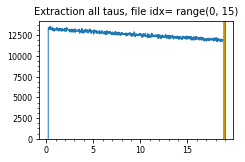

In [971]:
t_bin= 400e-12

def plot_laser_trace(laser_mode='green', t_margin=4e-6):
    # All
    if laser_mode == 'all':
        y, x, _  = plt.hist(1e3*t_arr, bins=1000, log=True, histtype='step', density=False)
    #y, x, _  = plt.hist(1e3*t_arr[(t_arr<20e-3)], bins=1000, log=True, histtype='step', density=False)


    # green readout window
    if laser_mode == 'green':
        y, x, _  = plt.hist(1e3*t_arr[(t_arr>t_analyse[0]-t_margin)*(t_arr<t_analyse[1]+3e-6+t_margin)],
                            bins=1000, log=True, histtype='step', density=False)
    #y, x, _  = plt.hist(1e3*t_arr[(t_arr>t_analyse[0]-1e-3)*(t_arr<25.024e-3)], bins=1000, log=True, histtype='step', density=False)
    #y, x, _  = plt.hist(1e3*t_arr[(t_arr>18.7e-3)*(t_arr<25.367e-3)], bins=1000, log=True, histtype='step', density=False)

    # for checking orange laser windows -> must not overlap with green pulse
    if laser_mode == 'orange_start':
        y, x, _  = plt.hist(1e3*t_arr[(t_arr<2*t_cinit_red[0])],
                            bins=1000, log=True, histtype='step', density=False, color=plt_settings.color('blue'))
    if laser_mode == 'orange_end':
        y, x, _  = plt.hist(1e3*t_arr[(t_arr>t_cinit_red[1]-0.15e-3)*(t_arr<t_cinit_red[1]+0.5e-3)],
                            bins=1000, log=True, histtype='step', density=False)
    # orange laser decay -> ionization
    if laser_mode == 'orange':
        y, x, _  = plt.hist(1e3*t_arr[(t_arr>t_cinit_red[0])*(t_arr<t_cinit_red[1])], bins=1000, log=False, histtype='step', density=False)

    
    #y, x, _  = plt.hist(t_arr[(t_arr<7.3e-3)*(t_arr>0)], bins=1000, log=False, histtype='step', density=False)
    #plt.ylim([1200,1500])
    
    return x, y

def add_extr_windows():
    if np.max(x) > 1e3*t_analyse[0] > np.min(x):
        plt.axvline(1e3*t_analyse[0], color='red')
    if np.min(x) < 1e3*t_analyse[1] < 1.2*np.max(x):
        plt.axvline(1e3*t_analyse[1], color='red')
        
    if np.max(x) > 1e3*t_norm[0] > np.min(x):
        plt.axvline(1e3*t_norm[0], color='green')
    if np.min(x) < 1e3*t_norm[1] < 1.2*np.max(x):
        plt.axvline(1e3*t_norm[1], color='green')
    
    if np.max(x) > 1e3*t_cinit_red[0] > np.min(x):
        plt.axvline(1e3*t_cinit_red[0], color='orange')
    if np.min(x) < 1e3*t_cinit_red[1] < 1.2*np.max(x):
        plt.axvline(1e3*t_cinit_red[1], color='orange')

#t_analyse = [18.9615e-3, 18.9615e-3+300e-9]
#t_analyse = [1.56475e-3, 1.56475e-3+300e-9]
#t_norm = [t_analyse[0]+2e-6, t_analyse[1]+2.5e-6]
#
#t_analyse = [202e-6, 202e-6+750e-9]
#t_norm = [204e-6, 205e-6]

#t_cinit_red = [0.1e-3, 12.9e-3]

idx_tau, n_tresh = 2, 8
idx_file = range(0,len(data_raw))[:15]
show_windows = True

raw_arr = np.zeros(1)
for idx in idx_file:
    raw_arr = np.concatenate([raw_arr, np.asarray(data_raw[idx]['debug_raw_data'], dtype=int)])

# sometimes, artifacts in measurement
#raw_arr = raw_arr[raw_arr!=0]
#raw_arr = raw_arr[raw_arr!=1]
#raw_arr = raw_arr[raw_arr!=256]


"""
t_arrive = post_select(data_raw, t_red=t_cinit_red, t_read=[0, None], # t_read=[t_analyse[0], None],
                t_bin=t_bin, 
                n_thresh=n_tresh)
t_arrive_per_tau = collapse_single_lasers(t_arrive, n_taus=len(taus), alternating=True)
t_arr = np.asarray(t_arrive_per_tau[idx_tau], dtype=float)*t_bin
x, y = plot_laser_trace()
if show_windows:
    add_extr_windows()

plt.title(f"Laser extraction for all files, tau {idx_tau}")
plt.show()
"""

t_arr = np.asarray(raw_arr, dtype=float)*t_bin
x, y = plot_laser_trace('orange', 1e-6)
if show_windows:
    add_extr_windows()

#plt.xlim([0,10])
plt.title(f"Extraction all taus, file idx= {idx_file}", fontsize=10)
#plt.yscale('log')
#plt.xscale('log')

plt.tight_layout()
plt.savefig(plt_settings.get_savepath('debug_laser_extract_pcs'), dpi=300)
plt.show()


#x[-2]= 70e-3
qdplotlogic.set_data(x[:-1], y, plot_index=0)

0
        

In [134]:
t_analyse

[0.0189758, 0.018976100000000003]

# Histogram orange readout

Use same listfile data as above

In [837]:
# use dummy listfile result to plot hisogram
fix_lambdas = False
idx_data = 5

t_arr_red = filter_trace_per_laser(data_raw[idx_data], t_window_1=t_cinit_red[0], t_window_2=t_cinit_red[1],
                                  t_bin=t_bin)

n_phots_per_laser = [len(t[t!=0]) for t in t_arr_red]
l_res = {'data': {'type': 'photon_histogram'}}

y_hist, x_hist = np.histogram(n_phots_per_laser, bins=np.max(n_phots_per_laser), density=True)
x_hist = x_hist[:-1]


l_res['data'].update({'tau': x_hist, 'z1': y_hist})


l_res['fit_edit_params'] = [lmfit.Parameter('p0_mu', value=2, min=0, max=50, vary=not fix_lambdas),
        lmfit.Parameter('p1_mu', value=4, min=0, max=50, vary=not fix_lambdas),
        lmfit.Parameter('p2_mu', value=8, min=0, max=50, vary=not fix_lambdas),
        lmfit.Parameter('p0_amplitude', value=0.3, min=0, max=10, vary=True),
        lmfit.Parameter('p1_amplitude', value=0.3, min=0, max=10, vary=True),
        lmfit.Parameter('p2_amplitude', value=0.3, min=0, max=10, vary=True)]
do_fit(l_res, fit_y='z1', fit_method='poisson_3x', edit_params=l_res['fit_edit_params'])

l_res['fit_res']['nv_min_ratio'], ratio_details = calc_nv_min_ratio(l_res, ratio_at_least_1min=False)
l_res['fit_res']['d_nv_min_ratio'] = ratio_details['d_ratio_nv-']
l_res['fit_res']['contrast_read'] = ratio_details['lambdas'][0]/ratio_details['lambdas'][-1]
l_res['fit_res']['d_contrast_read'] = res['fit_res']['contrast_read']*np.sqrt((ratio_details['d_lambdas'][0]/ratio_details['lambdas'][0])**2 + (ratio_details['d_lambdas'][-1]/ratio_details['lambdas'][-1])**2)


plot_photon_histogram(l_res, ratio_at_least_1min=False, xlim=[0,20], atol_poisson=0.05)


plt.tight_layout()
plt.savefig(savepath + 'orange_histogram.png', dpi=300)
plt.show()

data_raw[idx_data]['file']

'E:\\Data\\2023\\05\\20230517\\deer_dd_psc_1\\deer_dd_XY8-2_init=0.5_0_read=0.5,0.5_readph=90_fci.lst'